In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import panutils
from PIL import Image
import cv2
import pandas as pd
from PIL import Image

In [14]:

# Setup paths
data_path ='/home/antreas/panoptic-toolbox/scripts/'
seq_name = '171026_pose1'

dataset_paths=[]
dataset_ground=[]
dataset_names=[]
c=0

for seq_name in os.listdir(data_path):
    if not seq_name.endswith('sh'):
        hd_skel_json_path = data_path+seq_name+'/hdPose3d_stage1_coco19/'
        hd_hand_json_path = data_path+seq_name+'/hdHand3d/'
        hd_img_path = data_path+seq_name+'/hdImgs/'
        print (seq_name)
        with open(data_path+seq_name+'/calibration_{0}.json'.format(seq_name)) as cfile:
            calib = json.load(cfile)
            cameras = {(cam['panel'],cam['node']):cam for cam in calib['cameras']}
        # Convert data into numpy arrays for convenienceA = np.copy(dataset_ground1[:8586,:,:,:])
        for k,cam in cameras.items():    
            cam['K'] = np.matrix(cam['K'])
            cam['distCoef'] = np.array(cam['distCoef'])
            cam['R'] = np.matrix(cam['R'])
            cam['t'] = np.array(cam['t']).reshape((3,1))
            
        items=[np.arange(0,19)]
        items_hand=[]
        for folder in os.listdir(hd_img_path):
            panel=int(folder[:2])
            node=int(folder[3:])
            cam= cameras[(panel, node)]
            for image in (os.listdir(os.path.join(hd_img_path, folder))):
                joints=[]
                hd_idx = int(image[6:14])
                image_path = hd_img_path+'{0:02d}_{1:02d}/{0:02d}_{1:02d}_{2:08d}.jpg'.format(cam['panel'], cam['node'], hd_idx)
                ###########################
                if os.path.isfile(hd_skel_json_path+'body3DScene_{0:08d}.json'.format(hd_idx)) and os.path.isfile(hd_hand_json_path+'handRecon3D_hd{0:08d}.json'.format(hd_idx)):
                ###########################    
                    skel_json_fname = hd_skel_json_path+'body3DScene_{0:08d}.json'.format(hd_idx)
                    with open(skel_json_fname) as dfile:
                        bframe = json.load(dfile)

                        for body in bframe['bodies']:

                            skel = np.array(body['joints19']).reshape((-1,4)).transpose()
                            #print(np.shape(skel))
                            pt = panutils.projectPoints(skel[0:3,:],
                                          cam['K'], cam['R'], cam['t'], 
                                          cam['distCoef'])
                            joints=[list(pt[0,items]),list(pt[1,items])]

                            ###
                            dataset_ground.append(joints)
                            dataset_paths.append(image_path)
                            name=seq_name+'_{0:02d}'.format(panel)+'_{0:02d}'.format(node)+'_'+str(c)
                            dataset_names.append(name)
                            c+=1
                            print (c, panel, node)

dataset_ground=np.array(dataset_ground)

#dataset_ground= np.delete(dataset_ground, [7,8,28,29], axis=2)
dataset_paths=np.array(dataset_paths)

171026_pose1
1 0 5
2 0 5
3 0 5
4 0 5
5 0 5
6 0 5
7 0 5
8 0 5
9 0 5
10 0 5
11 0 5
12 0 5
13 0 5
14 0 5
15 0 5
16 0 5
17 0 5
18 0 5
19 0 5
20 0 5
21 0 5
22 0 5
23 0 5
24 0 5
25 0 5
26 0 5
27 0 5
28 0 5
29 0 5
30 0 5
31 0 5
32 0 5
33 0 5
34 0 5
35 0 5
36 0 5
37 0 5
38 0 5
39 0 5
40 0 5
41 0 5
42 0 5
43 0 5
44 0 5
45 0 5
46 0 5
47 0 5
48 0 5
49 0 5
50 0 5
51 0 5
52 0 5
53 0 5
54 0 5
55 0 5
56 0 5
57 0 5
58 0 5
59 0 5
60 0 5
61 0 5
62 0 5
63 0 5
64 0 5
65 0 5
66 0 5
67 0 5
68 0 5
69 0 5
70 0 5
71 0 5
72 0 5
73 0 5
74 0 5
75 0 5
76 0 5
77 0 5
78 0 5
79 0 5
80 0 5
81 0 5
82 0 5
83 0 5
84 0 5
85 0 5
86 0 5
87 0 5
88 0 5
89 0 5
90 0 5
91 0 5
92 0 5
93 0 5
94 0 5
95 0 5
96 0 5
97 0 5
98 0 5
99 0 5
100 0 5
101 0 5
102 0 5
103 0 5
104 0 5
105 0 5
106 0 5
107 0 5
108 0 5
109 0 5
110 0 5
111 0 5
112 0 5
113 0 5
114 0 5
115 0 5
116 0 5
117 0 5
118 0 5
119 0 5
120 0 5
121 0 5
122 0 5
123 0 5
124 0 5
125 0 5
126 0 5
127 0 5
128 0 5
129 0 5
130 0 5
131 0 5
132 0 5
133 0 5
134 0 5
135 0 5
136 0 5
137 0 5

1189 0 5
1190 0 5
1191 0 5
1192 0 5
1193 0 5
1194 0 5
1195 0 5
1196 0 5
1197 0 5
1198 0 5
1199 0 5
1200 0 5
1201 0 5
1202 0 5
1203 0 5
1204 0 5
1205 0 5
1206 0 5
1207 0 5
1208 0 5
1209 0 5
1210 0 5
1211 0 5
1212 0 5
1213 0 5
1214 0 5
1215 0 5
1216 0 5
1217 0 5
1218 0 5
1219 0 5
1220 0 5
1221 0 5
1222 0 5
1223 0 5
1224 0 5
1225 0 5
1226 0 5
1227 0 5
1228 0 5
1229 0 5
1230 0 5
1231 0 5
1232 0 5
1233 0 5
1234 0 5
1235 0 5
1236 0 5
1237 0 5
1238 0 5
1239 0 5
1240 0 5
1241 0 5
1242 0 5
1243 0 5
1244 0 5
1245 0 5
1246 0 5
1247 0 5
1248 0 5
1249 0 5
1250 0 5
1251 0 5
1252 0 5
1253 0 5
1254 0 5
1255 0 5
1256 0 5
1257 0 5
1258 0 5
1259 0 5
1260 0 5
1261 0 5
1262 0 5
1263 0 5
1264 0 5
1265 0 5
1266 0 5
1267 0 5
1268 0 5
1269 0 5
1270 0 5
1271 0 5
1272 0 5
1273 0 5
1274 0 5
1275 0 5
1276 0 5
1277 0 5
1278 0 5
1279 0 5
1280 0 5
1281 0 5
1282 0 5
1283 0 5
1284 0 5
1285 0 5
1286 0 5
1287 0 5
1288 0 5
1289 0 5
1290 0 5
1291 0 5
1292 0 5
1293 0 5
1294 0 5
1295 0 5
1296 0 5
1297 0 5
1298 0 5
1299 0 5
1

2150 0 5
2151 0 5
2152 0 5
2153 0 5
2154 0 5
2155 0 5
2156 0 5
2157 0 5
2158 0 5
2159 0 5
2160 0 5
2161 0 5
2162 0 5
2163 0 5
2164 0 5
2165 0 5
2166 0 5
2167 0 5
2168 0 5
2169 0 5
2170 0 5
2171 0 5
2172 0 5
2173 0 5
2174 0 5
2175 0 5
2176 0 5
2177 0 5
2178 0 5
2179 0 5
2180 0 5
2181 0 5
2182 0 5
2183 0 5
2184 0 5
2185 0 5
2186 0 5
2187 0 5
2188 0 5
2189 0 5
2190 0 5
2191 0 5
2192 0 5
2193 0 5
2194 0 5
2195 0 5
2196 0 5
2197 0 5
2198 0 5
2199 0 5
2200 0 5
2201 0 5
2202 0 5
2203 0 5
2204 0 5
2205 0 5
2206 0 5
2207 0 5
2208 0 5
2209 0 5
2210 0 5
2211 0 5
2212 0 5
2213 0 5
2214 0 5
2215 0 5
2216 0 5
2217 0 5
2218 0 5
2219 0 5
2220 0 5
2221 0 5
2222 0 5
2223 0 5
2224 0 5
2225 0 5
2226 0 5
2227 0 5
2228 0 5
2229 0 5
2230 0 5
2231 0 5
2232 0 5
2233 0 5
2234 0 5
2235 0 5
2236 0 5
2237 0 5
2238 0 5
2239 0 5
2240 0 5
2241 0 5
2242 0 5
2243 0 5
2244 0 5
2245 0 5
2246 0 5
2247 0 5
2248 0 5
2249 0 5
2250 0 5
2251 0 5
2252 0 5
2253 0 5
2254 0 5
2255 0 5
2256 0 5
2257 0 5
2258 0 5
2259 0 5
2260 0 5
2

3135 0 5
3136 0 5
3137 0 5
3138 0 5
3139 0 5
3140 0 5
3141 0 5
3142 0 5
3143 0 5
3144 0 5
3145 0 5
3146 0 5
3147 0 5
3148 0 5
3149 0 5
3150 0 5
3151 0 5
3152 0 5
3153 0 5
3154 0 5
3155 0 5
3156 0 5
3157 0 5
3158 0 5
3159 0 5
3160 0 5
3161 0 5
3162 0 5
3163 0 5
3164 0 5
3165 0 5
3166 0 5
3167 0 5
3168 0 5
3169 0 5
3170 0 5
3171 0 5
3172 0 5
3173 0 5
3174 0 5
3175 0 5
3176 0 5
3177 0 5
3178 0 5
3179 0 5
3180 0 5
3181 0 5
3182 0 5
3183 0 5
3184 0 5
3185 0 5
3186 0 5
3187 0 5
3188 0 5
3189 0 5
3190 0 5
3191 0 5
3192 0 5
3193 0 5
3194 0 5
3195 0 5
3196 0 5
3197 0 5
3198 0 5
3199 0 5
3200 0 5
3201 0 5
3202 0 5
3203 0 5
3204 0 5
3205 0 5
3206 0 5
3207 0 5
3208 0 5
3209 0 5
3210 0 5
3211 0 5
3212 0 5
3213 0 5
3214 0 5
3215 0 5
3216 0 5
3217 0 5
3218 0 5
3219 0 5
3220 0 5
3221 0 5
3222 0 5
3223 0 5
3224 0 5
3225 0 5
3226 0 5
3227 0 5
3228 0 5
3229 0 5
3230 0 5
3231 0 5
3232 0 5
3233 0 5
3234 0 5
3235 0 5
3236 0 5
3237 0 5
3238 0 5
3239 0 5
3240 0 5
3241 0 5
3242 0 5
3243 0 5
3244 0 5
3245 0 5
3

4075 0 5
4076 0 5
4077 0 5
4078 0 5
4079 0 5
4080 0 5
4081 0 5
4082 0 5
4083 0 5
4084 0 5
4085 0 5
4086 0 5
4087 0 5
4088 0 5
4089 0 5
4090 0 5
4091 0 5
4092 0 5
4093 0 5
4094 0 5
4095 0 5
4096 0 5
4097 0 5
4098 0 5
4099 0 5
4100 0 5
4101 0 5
4102 0 5
4103 0 5
4104 0 5
4105 0 5
4106 0 5
4107 0 5
4108 0 5
4109 0 5
4110 0 5
4111 0 5
4112 0 5
4113 0 5
4114 0 5
4115 0 5
4116 0 5
4117 0 5
4118 0 5
4119 0 5
4120 0 5
4121 0 5
4122 0 5
4123 0 5
4124 0 5
4125 0 5
4126 0 5
4127 0 5
4128 0 5
4129 0 5
4130 0 5
4131 0 5
4132 0 5
4133 0 5
4134 0 5
4135 0 5
4136 0 5
4137 0 5
4138 0 5
4139 0 5
4140 0 5
4141 0 5
4142 0 5
4143 0 5
4144 0 5
4145 0 5
4146 0 5
4147 0 5
4148 0 5
4149 0 5
4150 0 5
4151 0 5
4152 0 5
4153 0 5
4154 0 5
4155 0 5
4156 0 5
4157 0 5
4158 0 5
4159 0 5
4160 0 5
4161 0 5
4162 0 5
4163 0 5
4164 0 5
4165 0 5
4166 0 5
4167 0 5
4168 0 5
4169 0 5
4170 0 5
4171 0 5
4172 0 5
4173 0 5
4174 0 5
4175 0 5
4176 0 5
4177 0 5
4178 0 5
4179 0 5
4180 0 5
4181 0 5
4182 0 5
4183 0 5
4184 0 5
4185 0 5
4

5056 0 5
5057 0 5
5058 0 5
5059 0 5
5060 0 5
5061 0 5
5062 0 5
5063 0 5
5064 0 5
5065 0 5
5066 0 5
5067 0 5
5068 0 5
5069 0 5
5070 0 5
5071 0 5
5072 0 5
5073 0 5
5074 0 5
5075 0 5
5076 0 5
5077 0 5
5078 0 5
5079 0 5
5080 0 5
5081 0 5
5082 0 5
5083 0 5
5084 0 5
5085 0 5
5086 0 5
5087 0 5
5088 0 5
5089 0 5
5090 0 5
5091 0 5
5092 0 5
5093 0 5
5094 0 5
5095 0 5
5096 0 5
5097 0 5
5098 0 5
5099 0 5
5100 0 5
5101 0 5
5102 0 5
5103 0 5
5104 0 5
5105 0 5
5106 0 5
5107 0 5
5108 0 5
5109 0 5
5110 0 5
5111 0 5
5112 0 5
5113 0 5
5114 0 5
5115 0 5
5116 0 5
5117 0 5
5118 0 5
5119 0 5
5120 0 5
5121 0 5
5122 0 5
5123 0 5
5124 0 5
5125 0 5
5126 0 5
5127 0 5
5128 0 5
5129 0 5
5130 0 5
5131 0 5
5132 0 5
5133 0 5
5134 0 5
5135 0 5
5136 0 5
5137 0 5
5138 0 5
5139 0 5
5140 0 5
5141 0 5
5142 0 5
5143 0 5
5144 0 5
5145 0 5
5146 0 5
5147 0 5
5148 0 5
5149 0 5
5150 0 5
5151 0 5
5152 0 5
5153 0 5
5154 0 5
5155 0 5
5156 0 5
5157 0 5
5158 0 5
5159 0 5
5160 0 5
5161 0 5
5162 0 5
5163 0 5
5164 0 5
5165 0 5
5166 0 5
5

6268 0 5
6269 0 5
6270 0 5
6271 0 5
6272 0 5
6273 0 5
6274 0 5
6275 0 5
6276 0 5
6277 0 5
6278 0 5
6279 0 5
6280 0 5
6281 0 5
6282 0 5
6283 0 5
6284 0 5
6285 0 5
6286 0 5
6287 0 5
6288 0 5
6289 0 5
6290 0 5
6291 0 5
6292 0 5
6293 0 5
6294 0 5
6295 0 5
6296 0 5
6297 0 5
6298 0 5
6299 0 5
6300 0 5
6301 0 5
6302 0 5
6303 0 5
6304 0 5
6305 0 5
6306 0 5
6307 0 5
6308 0 5
6309 0 5
6310 0 5
6311 0 5
6312 0 5
6313 0 5
6314 0 5
6315 0 5
6316 0 5
6317 0 5
6318 0 5
6319 0 5
6320 0 5
6321 0 5
6322 0 5
6323 0 5
6324 0 5
6325 0 5
6326 0 5
6327 0 5
6328 0 5
6329 0 5
6330 0 5
6331 0 5
6332 0 5
6333 0 5
6334 0 5
6335 0 5
6336 0 5
6337 0 5
6338 0 5
6339 0 5
6340 0 5
6341 0 5
6342 0 5
6343 0 5
6344 0 5
6345 0 5
6346 0 5
6347 0 5
6348 0 5
6349 0 5
6350 0 5
6351 0 5
6352 0 5
6353 0 5
6354 0 5
6355 0 5
6356 0 5
6357 0 5
6358 0 5
6359 0 5
6360 0 5
6361 0 5
6362 0 5
6363 0 5
6364 0 5
6365 0 5
6366 0 5
6367 0 5
6368 0 5
6369 0 5
6370 0 5
6371 0 5
6372 0 5
6373 0 5
6374 0 5
6375 0 5
6376 0 5
6377 0 5
6378 0 5
6

7224 0 5
7225 0 5
7226 0 5
7227 0 5
7228 0 5
7229 0 5
7230 0 5
7231 0 5
7232 0 5
7233 0 5
7234 0 5
7235 0 5
7236 0 5
7237 0 5
7238 0 5
7239 0 5
7240 0 5
7241 0 5
7242 0 5
7243 0 5
7244 0 5
7245 0 5
7246 0 5
7247 0 5
7248 0 5
7249 0 5
7250 0 5
7251 0 5
7252 0 5
7253 0 5
7254 0 5
7255 0 5
7256 0 5
7257 0 5
7258 0 5
7259 0 5
7260 0 5
7261 0 5
7262 0 5
7263 0 5
7264 0 5
7265 0 5
7266 0 5
7267 0 5
7268 0 5
7269 0 5
7270 0 5
7271 0 5
7272 0 5
7273 0 5
7274 0 5
7275 0 5
7276 0 5
7277 0 5
7278 0 5
7279 0 5
7280 0 5
7281 0 5
7282 0 5
7283 0 5
7284 0 5
7285 0 5
7286 0 5
7287 0 5
7288 0 5
7289 0 5
7290 0 5
7291 0 5
7292 0 5
7293 0 5
7294 0 5
7295 0 5
7296 0 5
7297 0 5
7298 0 5
7299 0 5
7300 0 5
7301 0 5
7302 0 5
7303 0 5
7304 0 5
7305 0 5
7306 0 5
7307 0 5
7308 0 5
7309 0 5
7310 0 5
7311 0 5
7312 0 5
7313 0 5
7314 0 5
7315 0 5
7316 0 5
7317 0 5
7318 0 5
7319 0 5
7320 0 5
7321 0 5
7322 0 5
7323 0 5
7324 0 5
7325 0 5
7326 0 5
7327 0 5
7328 0 5
7329 0 5
7330 0 5
7331 0 5
7332 0 5
7333 0 5
7334 0 5
7

8154 0 5
8155 0 5
8156 0 5
8157 0 5
8158 0 5
8159 0 5
8160 0 5
8161 0 5
8162 0 5
8163 0 5
8164 0 5
8165 0 5
8166 0 5
8167 0 5
8168 0 5
8169 0 5
8170 0 5
8171 0 5
8172 0 5
8173 0 5
8174 0 5
8175 0 5
8176 0 5
8177 0 5
8178 0 5
8179 0 5
8180 0 5
8181 0 5
8182 0 5
8183 0 5
8184 0 5
8185 0 5
8186 0 5
8187 0 5
8188 0 5
8189 0 5
8190 0 5
8191 0 5
8192 0 5
8193 0 5
8194 0 5
8195 0 5
8196 0 5
8197 0 5
8198 0 5
8199 0 5
8200 0 5
8201 0 5
8202 0 5
8203 0 5
8204 0 5
8205 0 5
8206 0 5
8207 0 5
8208 0 5
8209 0 5
8210 0 5
8211 0 5
8212 0 5
8213 0 5
8214 0 5
8215 0 5
8216 0 5
8217 0 5
8218 0 5
8219 0 5
8220 0 5
8221 0 5
8222 0 5
8223 0 5
8224 0 5
8225 0 5
8226 0 5
8227 0 5
8228 0 5
8229 0 5
8230 0 5
8231 0 5
8232 0 5
8233 0 5
8234 0 5
8235 0 5
8236 0 5
8237 0 5
8238 0 5
8239 0 5
8240 0 5
8241 0 5
8242 0 5
8243 0 5
8244 0 5
8245 0 5
8246 0 5
8247 0 5
8248 0 5
8249 0 5
8250 0 5
8251 0 5
8252 0 5
8253 0 5
8254 0 5
8255 0 5
8256 0 5
8257 0 5
8258 0 5
8259 0 5
8260 0 5
8261 0 5
8262 0 5
8263 0 5
8264 0 5
8

9119 0 5
9120 0 5
9121 0 5
9122 0 5
9123 0 5
9124 0 5
9125 0 5
9126 0 5
9127 0 5
9128 0 5
9129 0 5
9130 0 5
9131 0 5
9132 0 5
9133 0 5
9134 0 5
9135 0 5
9136 0 5
9137 0 5
9138 0 5
9139 0 5
9140 0 5
9141 0 5
9142 0 5
9143 0 5
9144 0 5
9145 0 5
9146 0 5
9147 0 5
9148 0 5
9149 0 5
9150 0 5
9151 0 5
9152 0 5
9153 0 5
9154 0 5
9155 0 5
9156 0 5
9157 0 5
9158 0 5
9159 0 5
9160 0 5
9161 0 5
9162 0 5
9163 0 5
9164 0 5
9165 0 5
9166 0 5
9167 0 5
9168 0 5
9169 0 5
9170 0 5
9171 0 5
9172 0 5
9173 0 5
9174 0 5
9175 0 5
9176 0 5
9177 0 5
9178 0 5
9179 0 5
9180 0 5
9181 0 5
9182 0 5
9183 0 5
9184 0 5
9185 0 5
9186 0 5
9187 0 5
9188 0 5
9189 0 5
9190 0 5
9191 0 5
9192 0 5
9193 0 5
9194 0 5
9195 0 5
9196 0 5
9197 0 5
9198 0 5
9199 0 5
9200 0 5
9201 0 5
9202 0 5
9203 0 5
9204 0 5
9205 0 5
9206 0 5
9207 0 5
9208 0 5
9209 0 5
9210 0 5
9211 0 5
9212 0 5
9213 0 5
9214 0 5
9215 0 5
9216 0 5
9217 0 5
9218 0 5
9219 0 5
9220 0 5
9221 0 5
9222 0 5
9223 0 5
9224 0 5
9225 0 5
9226 0 5
9227 0 5
9228 0 5
9229 0 5
9

10101 0 5
10102 0 5
10103 0 5
10104 0 5
10105 0 5
10106 0 5
10107 0 5
10108 0 5
10109 0 5
10110 0 5
10111 0 5
10112 0 5
10113 0 5
10114 0 5
10115 0 5
10116 0 5
10117 0 5
10118 0 5
10119 0 5
10120 0 5
10121 0 5
10122 0 5
10123 0 5
10124 0 5
10125 0 5
10126 0 5
10127 0 5
10128 0 5
10129 0 5
10130 0 5
10131 0 5
10132 0 5
10133 0 5
10134 0 5
10135 0 5
10136 0 5
10137 0 5
10138 0 5
10139 0 5
10140 0 5
10141 0 5
10142 0 5
10143 0 5
10144 0 5
10145 0 5
10146 0 5
10147 0 5
10148 0 5
10149 0 5
10150 0 5
10151 0 5
10152 0 5
10153 0 5
10154 0 5
10155 0 5
10156 0 5
10157 0 5
10158 0 5
10159 0 5
10160 0 5
10161 0 5
10162 0 5
10163 0 5
10164 0 5
10165 0 5
10166 0 5
10167 0 5
10168 0 5
10169 0 5
10170 0 5
10171 0 5
10172 0 5
10173 0 5
10174 0 5
10175 0 5
10176 0 5
10177 0 5
10178 0 5
10179 0 5
10180 0 5
10181 0 5
10182 0 5
10183 0 5
10184 0 5
10185 0 5
10186 0 5
10187 0 5
10188 0 5
10189 0 5
10190 0 5
10191 0 5
10192 0 5
10193 0 5
10194 0 5
10195 0 5
10196 0 5
10197 0 5
10198 0 5
10199 0 5
10200 0 5


11079 0 5
11080 0 5
11081 0 5
11082 0 5
11083 0 5
11084 0 5
11085 0 5
11086 0 5
11087 0 5
11088 0 5
11089 0 5
11090 0 5
11091 0 5
11092 0 5
11093 0 5
11094 0 5
11095 0 5
11096 0 5
11097 0 5
11098 0 5
11099 0 5
11100 0 5
11101 0 5
11102 0 5
11103 0 5
11104 0 5
11105 0 5
11106 0 5
11107 0 5
11108 0 5
11109 0 5
11110 0 5
11111 0 5
11112 0 5
11113 0 5
11114 0 5
11115 0 5
11116 0 5
11117 0 5
11118 0 5
11119 0 5
11120 0 5
11121 0 5
11122 0 5
11123 0 5
11124 0 5
11125 0 5
11126 0 5
11127 0 5
11128 0 5
11129 0 5
11130 0 5
11131 0 5
11132 0 5
11133 0 5
11134 0 5
11135 0 5
11136 0 5
11137 0 5
11138 0 5
11139 0 5
11140 0 5
11141 0 5
11142 0 5
11143 0 5
11144 0 5
11145 0 5
11146 0 5
11147 0 5
11148 0 5
11149 0 5
11150 0 5
11151 0 5
11152 0 5
11153 0 5
11154 0 5
11155 0 5
11156 0 5
11157 0 5
11158 0 5
11159 0 5
11160 0 5
11161 0 5
11162 0 5
11163 0 5
11164 0 5
11165 0 5
11166 0 5
11167 0 5
11168 0 5
11169 0 5
11170 0 5
11171 0 5
11172 0 5
11173 0 5
11174 0 5
11175 0 5
11176 0 5
11177 0 5
11178 0 5


12072 0 5
12073 0 5
12074 0 5
12075 0 5
12076 0 5
12077 0 5
12078 0 5
12079 0 5
12080 0 5
12081 0 5
12082 0 5
12083 0 5
12084 0 5
12085 0 5
12086 0 5
12087 0 5
12088 0 5
12089 0 5
12090 0 5
12091 0 5
12092 0 5
12093 0 5
12094 0 5
12095 0 5
12096 0 5
12097 0 5
12098 0 5
12099 0 5
12100 0 5
12101 0 5
12102 0 5
12103 0 5
12104 0 5
12105 0 5
12106 0 5
12107 0 5
12108 0 5
12109 0 5
12110 0 5
12111 0 5
12112 0 5
12113 0 5
12114 0 5
12115 0 5
12116 0 5
12117 0 5
12118 0 5
12119 0 5
12120 0 5
12121 0 5
12122 0 5
12123 0 5
12124 0 5
12125 0 5
12126 0 5
12127 0 5
12128 0 5
12129 0 5
12130 0 5
12131 0 5
12132 0 5
12133 0 5
12134 0 5
12135 0 5
12136 0 5
12137 0 5
12138 0 5
12139 0 5
12140 0 5
12141 0 5
12142 0 5
12143 0 5
12144 0 5
12145 0 5
12146 0 5
12147 0 5
12148 0 5
12149 0 5
12150 0 5
12151 0 5
12152 0 5
12153 0 5
12154 0 5
12155 0 5
12156 0 5
12157 0 5
12158 0 5
12159 0 5
12160 0 5
12161 0 5
12162 0 5
12163 0 5
12164 0 5
12165 0 5
12166 0 5
12167 0 5
12168 0 5
12169 0 5
12170 0 5
12171 0 5


13035 0 5
13036 0 5
13037 0 5
13038 0 5
13039 0 5
13040 0 5
13041 0 5
13042 0 5
13043 0 5
13044 0 5
13045 0 5
13046 0 5
13047 0 5
13048 0 5
13049 0 5
13050 0 5
13051 0 5
13052 0 5
13053 0 5
13054 0 5
13055 0 5
13056 0 5
13057 0 5
13058 0 5
13059 0 5
13060 0 5
13061 0 5
13062 0 5
13063 0 5
13064 0 5
13065 0 5
13066 0 5
13067 0 5
13068 0 5
13069 0 5
13070 0 5
13071 0 5
13072 0 5
13073 0 5
13074 0 5
13075 0 5
13076 0 5
13077 0 5
13078 0 5
13079 0 5
13080 0 5
13081 0 5
13082 0 5
13083 0 5
13084 0 5
13085 0 5
13086 0 5
13087 0 5
13088 0 5
13089 0 5
13090 0 5
13091 0 5
13092 0 5
13093 0 5
13094 0 5
13095 0 5
13096 0 5
13097 0 5
13098 0 5
13099 0 5
13100 0 5
13101 0 5
13102 0 5
13103 0 5
13104 0 5
13105 0 5
13106 0 5
13107 0 5
13108 0 5
13109 0 5
13110 0 5
13111 0 5
13112 0 5
13113 0 5
13114 0 5
13115 0 5
13116 0 5
13117 0 5
13118 0 5
13119 0 5
13120 0 5
13121 0 5
13122 0 5
13123 0 5
13124 0 5
13125 0 5
13126 0 5
13127 0 5
13128 0 5
13129 0 5
13130 0 5
13131 0 5
13132 0 5
13133 0 5
13134 0 5


13979 0 5
13980 0 5
13981 0 5
13982 0 5
13983 0 5
13984 0 5
13985 0 5
13986 0 5
13987 0 5
13988 0 5
13989 0 5
13990 0 5
13991 0 5
13992 0 5
13993 0 5
13994 0 5
13995 0 5
13996 0 5
13997 0 5
13998 0 5
13999 0 5
14000 0 5
14001 0 5
14002 0 5
14003 0 5
14004 0 5
14005 0 5
14006 0 5
14007 0 5
14008 0 5
14009 0 5
14010 0 5
14011 0 5
14012 0 5
14013 0 5
14014 0 5
14015 0 5
14016 0 5
14017 0 5
14018 0 5
14019 0 5
14020 0 5
14021 0 5
14022 0 5
14023 0 5
14024 0 5
14025 0 5
14026 0 5
14027 0 5
14028 0 5
14029 0 5
14030 0 5
14031 0 5
14032 0 5
14033 0 5
14034 0 5
14035 0 5
14036 0 5
14037 0 5
14038 0 5
14039 0 5
14040 0 5
14041 0 5
14042 0 5
14043 0 5
14044 0 5
14045 0 5
14046 0 5
14047 0 5
14048 0 5
14049 0 5
14050 0 5
14051 0 5
14052 0 5
14053 0 5
14054 0 5
14055 0 5
14056 0 5
14057 0 5
14058 0 5
14059 0 5
14060 0 5
14061 0 5
14062 0 5
14063 0 5
14064 0 5
14065 0 5
14066 0 5
14067 0 5
14068 0 5
14069 0 5
14070 0 5
14071 0 5
14072 0 5
14073 0 5
14074 0 5
14075 0 5
14076 0 5
14077 0 5
14078 0 5


14956 0 5
14957 0 5
14958 0 5
14959 0 5
14960 0 5
14961 0 5
14962 0 5
14963 0 5
14964 0 5
14965 0 5
14966 0 5
14967 0 5
14968 0 5
14969 0 5
14970 0 5
14971 0 5
14972 0 5
14973 0 5
14974 0 5
14975 0 5
14976 0 5
14977 0 5
14978 0 5
14979 0 5
14980 0 5
14981 0 5
14982 0 5
14983 0 5
14984 0 5
14985 0 5
14986 0 5
14987 0 5
14988 0 5
14989 0 5
14990 0 5
14991 0 5
14992 0 5
14993 0 5
14994 0 5
14995 0 5
14996 0 5
14997 0 5
14998 0 5
14999 0 5
15000 0 5
15001 0 5
15002 0 5
15003 0 5
15004 0 5
15005 0 5
15006 0 5
15007 0 5
15008 0 5
15009 0 5
15010 0 5
15011 0 5
15012 0 5
15013 0 5
15014 0 5
15015 0 5
15016 0 5
15017 0 5
15018 0 5
15019 0 5
15020 0 5
15021 0 5
15022 0 5
15023 0 5
15024 0 5
15025 0 5
15026 0 5
15027 0 5
15028 0 5
15029 0 5
15030 0 5
15031 0 5
15032 0 5
15033 0 5
15034 0 5
15035 0 5
15036 0 5
15037 0 5
15038 0 5
15039 0 5
15040 0 5
15041 0 5
15042 0 5
15043 0 5
15044 0 5
15045 0 5
15046 0 5
15047 0 5
15048 0 5
15049 0 5
15050 0 5
15051 0 5
15052 0 5
15053 0 5
15054 0 5
15055 0 5


15881 0 5
15882 0 5
15883 0 5
15884 0 5
15885 0 5
15886 0 5
15887 0 5
15888 0 5
15889 0 5
15890 0 5
15891 0 5
15892 0 5
15893 0 5
15894 0 5
15895 0 5
15896 0 5
15897 0 5
15898 0 5
15899 0 5
15900 0 5
15901 0 5
15902 0 5
15903 0 5
15904 0 5
15905 0 5
15906 0 5
15907 0 5
15908 0 5
15909 0 5
15910 0 5
15911 0 5
15912 0 5
15913 0 5
15914 0 5
15915 0 5
15916 0 5
15917 0 5
15918 0 5
15919 0 5
15920 0 5
15921 0 5
15922 0 5
15923 0 5
15924 0 5
15925 0 5
15926 0 5
15927 0 5
15928 0 5
15929 0 5
15930 0 5
15931 0 5
15932 0 5
15933 0 5
15934 0 5
15935 0 5
15936 0 5
15937 0 5
15938 0 5
15939 0 5
15940 0 5
15941 0 5
15942 0 5
15943 0 5
15944 0 5
15945 0 5
15946 0 5
15947 0 5
15948 0 5
15949 0 5
15950 0 5
15951 0 5
15952 0 5
15953 0 5
15954 0 5
15955 0 5
15956 0 5
15957 0 5
15958 0 5
15959 0 5
15960 0 5
15961 0 5
15962 0 5
15963 0 5
15964 0 5
15965 0 5
15966 0 5
15967 0 5
15968 0 5
15969 0 5
15970 0 5
15971 0 5
15972 0 5
15973 0 5
15974 0 5
15975 0 5
15976 0 5
15977 0 5
15978 0 5
15979 0 5
15980 0 5


16854 0 5
16855 0 5
16856 0 5
16857 0 5
16858 0 5
16859 0 5
16860 0 5
16861 0 5
16862 0 5
16863 0 5
16864 0 5
16865 0 5
16866 0 5
16867 0 5
16868 0 5
16869 0 5
16870 0 5
16871 0 5
16872 0 5
16873 0 5
16874 0 5
16875 0 5
16876 0 5
16877 0 5
16878 0 5
16879 0 5
16880 0 5
16881 0 5
16882 0 5
16883 0 5
16884 0 5
16885 0 5
16886 0 5
16887 0 5
16888 0 5
16889 0 5
16890 0 5
16891 0 5
16892 0 5
16893 0 5
16894 0 5
16895 0 5
16896 0 5
16897 0 5
16898 0 5
16899 0 5
16900 0 5
16901 0 5
16902 0 5
16903 0 5
16904 0 5
16905 0 5
16906 0 5
16907 0 5
16908 0 5
16909 0 5
16910 0 5
16911 0 5
16912 0 5
16913 0 5
16914 0 5
16915 0 5
16916 0 5
16917 0 5
16918 0 5
16919 0 5
16920 0 5
16921 0 5
16922 0 5
16923 0 5
16924 0 5
16925 0 5
16926 0 5
16927 0 5
16928 0 5
16929 0 5
16930 0 5
16931 0 5
16932 0 5
16933 0 5
16934 0 5
16935 0 5
16936 0 5
16937 0 5
16938 0 5
16939 0 5
16940 0 5
16941 0 5
16942 0 5
16943 0 5
16944 0 5
16945 0 5
16946 0 5
16947 0 5
16948 0 5
16949 0 5
16950 0 5
16951 0 5
16952 0 5
16953 0 5


17835 0 5
17836 0 5
17837 0 5
17838 0 5
17839 0 5
17840 0 5
17841 0 5
17842 0 5
17843 0 5
17844 0 5
17845 0 5
17846 0 5
17847 0 5
17848 0 5
17849 0 5
17850 0 5
17851 0 5
17852 0 5
17853 0 5
17854 0 5
17855 0 5
17856 0 5
17857 0 5
17858 0 5
17859 0 5
17860 0 5
17861 0 5
17862 0 5
17863 0 5
17864 0 5
17865 0 5
17866 0 5
17867 0 5
17868 0 5
17869 0 5
17870 0 5
17871 0 5
17872 0 5
17873 0 5
17874 0 5
17875 0 5
17876 0 5
17877 0 5
17878 0 5
17879 0 5
17880 0 5
17881 0 5
17882 0 5
17883 0 5
17884 0 5
17885 0 5
17886 0 5
17887 0 5
17888 0 5
17889 0 5
17890 0 5
17891 0 5
17892 0 5
17893 0 5
17894 0 5
17895 0 5
17896 0 5
17897 0 5
17898 0 5
17899 0 5
17900 0 5
17901 0 5
17902 0 5
17903 0 5
17904 0 5
17905 0 5
17906 0 5
17907 0 5
17908 0 5
17909 0 5
17910 0 5
17911 0 5
17912 0 5
17913 0 5
17914 0 5
17915 0 5
17916 0 5
17917 0 5
17918 0 5
17919 0 5
17920 0 5
17921 0 5
17922 0 5
17923 0 5
17924 0 5
17925 0 5
17926 0 5
17927 0 5
17928 0 5
17929 0 5
17930 0 5
17931 0 5
17932 0 5
17933 0 5
17934 0 5


18830 0 5
18831 0 5
18832 0 5
18833 0 5
18834 0 5
18835 0 5
18836 0 5
18837 0 5
18838 0 5
18839 0 5
18840 0 5
18841 0 5
18842 0 5
18843 0 5
18844 0 5
18845 0 5
18846 0 5
18847 0 5
18848 0 5
18849 0 5
18850 0 5
18851 0 5
18852 0 5
18853 0 5
18854 0 5
18855 0 5
18856 0 5
18857 0 5
18858 0 5
18859 0 5
18860 0 5
18861 0 5
18862 0 5
18863 0 5
18864 0 5
18865 0 5
18866 0 5
18867 0 5
18868 0 5
18869 0 5
18870 0 5
18871 0 5
18872 0 5
18873 0 5
18874 0 5
18875 0 5
18876 0 5
18877 0 5
18878 0 5
18879 0 5
18880 0 5
18881 0 5
18882 0 5
18883 0 5
18884 0 5
18885 0 5
18886 0 5
18887 0 5
18888 0 5
18889 0 5
18890 0 5
18891 0 5
18892 0 5
18893 0 5
18894 0 5
18895 0 5
18896 0 5
18897 0 5
18898 0 5
18899 0 5
18900 0 5
18901 0 5
18902 0 5
18903 0 5
18904 0 5
18905 0 5
18906 0 5
18907 0 5
18908 0 5
18909 0 5
18910 0 5
18911 0 5
18912 0 5
18913 0 5
18914 0 5
18915 0 5
18916 0 5
18917 0 5
18918 0 5
18919 0 5
18920 0 5
18921 0 5
18922 0 5
18923 0 5
18924 0 5
18925 0 5
18926 0 5
18927 0 5
18928 0 5
18929 0 5


19805 0 5
19806 0 5
19807 0 5
19808 0 5
19809 0 5
19810 0 5
19811 0 5
19812 0 5
19813 0 5
19814 0 5
19815 0 5
19816 0 5
19817 0 5
19818 0 5
19819 0 5
19820 0 5
19821 0 5
19822 0 5
19823 0 5
19824 0 5
19825 0 5
19826 0 5
19827 0 5
19828 0 5
19829 0 5
19830 0 5
19831 0 5
19832 0 5
19833 0 5
19834 0 5
19835 0 5
19836 0 5
19837 0 5
19838 0 5
19839 0 5
19840 0 5
19841 0 5
19842 0 5
19843 0 5
19844 0 5
19845 0 5
19846 0 5
19847 0 5
19848 0 5
19849 0 5
19850 0 5
19851 0 5
19852 0 5
19853 0 5
19854 0 5
19855 0 5
19856 0 5
19857 0 5
19858 0 5
19859 0 5
19860 0 5
19861 0 5
19862 0 5
19863 0 5
19864 0 5
19865 0 5
19866 0 5
19867 0 5
19868 0 5
19869 0 5
19870 0 5
19871 0 5
19872 0 5
19873 0 5
19874 0 5
19875 0 5
19876 0 5
19877 0 5
19878 0 5
19879 0 5
19880 0 5
19881 0 5
19882 0 5
19883 0 5
19884 0 5
19885 0 5
19886 0 5
19887 0 5
19888 0 5
19889 0 5
19890 0 5
19891 0 5
19892 0 5
19893 0 5
19894 0 5
19895 0 5
19896 0 5
19897 0 5
19898 0 5
19899 0 5
19900 0 5
19901 0 5
19902 0 5
19903 0 5
19904 0 5


20767 0 5
20768 0 5
20769 0 5
20770 0 5
20771 0 5
20772 0 5
20773 0 5
20774 0 5
20775 0 5
20776 0 5
20777 0 5
20778 0 5
20779 0 5
20780 0 5
20781 0 5
20782 0 5
20783 0 5
20784 0 5
20785 0 5
20786 0 5
20787 0 5
20788 0 5
20789 0 5
20790 0 5
20791 0 5
20792 0 5
20793 0 5
20794 0 5
20795 0 5
20796 0 5
20797 0 5
20798 0 5
20799 0 5
20800 0 5
20801 0 5
20802 0 5
20803 0 5
20804 0 5
20805 0 5
20806 0 5
20807 0 5
20808 0 5
20809 0 5
20810 0 5
20811 0 5
20812 0 5
20813 0 5
20814 0 5
20815 0 5
20816 0 5
20817 0 5
20818 0 5
20819 0 5
20820 0 5
20821 0 5
20822 0 5
20823 0 5
20824 0 5
20825 0 5
20826 0 5
20827 0 5
20828 0 5
20829 0 5
20830 0 5
20831 0 5
20832 0 5
20833 0 5
20834 0 5
20835 0 5
20836 0 5
20837 0 5
20838 0 5
20839 0 5
20840 0 5
20841 0 5
20842 0 5
20843 0 5
20844 0 5
20845 0 5
20846 0 5
20847 0 5
20848 0 5
20849 0 5
20850 0 5
20851 0 5
20852 0 5
20853 0 5
20854 0 5
20855 0 5
20856 0 5
20857 0 5
20858 0 5
20859 0 5
20860 0 5
20861 0 5
20862 0 5
20863 0 5
20864 0 5
20865 0 5
20866 0 5


21750 0 5
21751 0 5
21752 0 5
21753 0 5
21754 0 5
21755 0 5
21756 0 5
21757 0 5
21758 0 5
21759 0 5
21760 0 5
21761 0 5
21762 0 5
21763 0 5
21764 0 5
21765 0 5
21766 0 5
21767 0 5
21768 0 5
21769 0 5
21770 0 5
21771 0 5
21772 0 5
21773 0 5
21774 0 5
21775 0 5
21776 0 5
21777 0 5
21778 0 5
21779 0 5
21780 0 5
21781 0 5
21782 0 5
21783 0 5
21784 0 5
21785 0 5
21786 0 5
21787 0 5
21788 0 5
21789 0 5
21790 0 5
21791 0 5
21792 0 5
21793 0 5
21794 0 5
21795 0 5
21796 0 5
21797 0 5
21798 0 5
21799 0 5
21800 0 5
21801 0 5
21802 0 5
21803 0 5
21804 0 5
21805 0 5
21806 0 5
21807 0 5
21808 0 5
21809 0 5
21810 0 5
21811 0 5
21812 0 5
21813 0 5
21814 0 5
21815 0 5
21816 0 5
21817 0 5
21818 0 5
21819 0 5
21820 0 5
21821 0 5
21822 0 5
21823 0 5
21824 0 5
21825 0 5
21826 0 5
21827 0 5
21828 0 5
21829 0 5
21830 0 5
21831 0 5
21832 0 5
21833 0 5
21834 0 5
21835 0 5
21836 0 5
21837 0 5
21838 0 5
21839 0 5
21840 0 5
21841 0 5
21842 0 5
21843 0 5
21844 0 5
21845 0 5
21846 0 5
21847 0 5
21848 0 5
21849 0 5


22843 0 1
22844 0 1
22845 0 1
22846 0 1
22847 0 1
22848 0 1
22849 0 1
22850 0 1
22851 0 1
22852 0 1
22853 0 1
22854 0 1
22855 0 1
22856 0 1
22857 0 1
22858 0 1
22859 0 1
22860 0 1
22861 0 1
22862 0 1
22863 0 1
22864 0 1
22865 0 1
22866 0 1
22867 0 1
22868 0 1
22869 0 1
22870 0 1
22871 0 1
22872 0 1
22873 0 1
22874 0 1
22875 0 1
22876 0 1
22877 0 1
22878 0 1
22879 0 1
22880 0 1
22881 0 1
22882 0 1
22883 0 1
22884 0 1
22885 0 1
22886 0 1
22887 0 1
22888 0 1
22889 0 1
22890 0 1
22891 0 1
22892 0 1
22893 0 1
22894 0 1
22895 0 1
22896 0 1
22897 0 1
22898 0 1
22899 0 1
22900 0 1
22901 0 1
22902 0 1
22903 0 1
22904 0 1
22905 0 1
22906 0 1
22907 0 1
22908 0 1
22909 0 1
22910 0 1
22911 0 1
22912 0 1
22913 0 1
22914 0 1
22915 0 1
22916 0 1
22917 0 1
22918 0 1
22919 0 1
22920 0 1
22921 0 1
22922 0 1
22923 0 1
22924 0 1
22925 0 1
22926 0 1
22927 0 1
22928 0 1
22929 0 1
22930 0 1
22931 0 1
22932 0 1
22933 0 1
22934 0 1
22935 0 1
22936 0 1
22937 0 1
22938 0 1
22939 0 1
22940 0 1
22941 0 1
22942 0 1


24071 0 1
24072 0 1
24073 0 1
24074 0 1
24075 0 1
24076 0 1
24077 0 1
24078 0 1
24079 0 1
24080 0 1
24081 0 1
24082 0 1
24083 0 1
24084 0 1
24085 0 1
24086 0 1
24087 0 1
24088 0 1
24089 0 1
24090 0 1
24091 0 1
24092 0 1
24093 0 1
24094 0 1
24095 0 1
24096 0 1
24097 0 1
24098 0 1
24099 0 1
24100 0 1
24101 0 1
24102 0 1
24103 0 1
24104 0 1
24105 0 1
24106 0 1
24107 0 1
24108 0 1
24109 0 1
24110 0 1
24111 0 1
24112 0 1
24113 0 1
24114 0 1
24115 0 1
24116 0 1
24117 0 1
24118 0 1
24119 0 1
24120 0 1
24121 0 1
24122 0 1
24123 0 1
24124 0 1
24125 0 1
24126 0 1
24127 0 1
24128 0 1
24129 0 1
24130 0 1
24131 0 1
24132 0 1
24133 0 1
24134 0 1
24135 0 1
24136 0 1
24137 0 1
24138 0 1
24139 0 1
24140 0 1
24141 0 1
24142 0 1
24143 0 1
24144 0 1
24145 0 1
24146 0 1
24147 0 1
24148 0 1
24149 0 1
24150 0 1
24151 0 1
24152 0 1
24153 0 1
24154 0 1
24155 0 1
24156 0 1
24157 0 1
24158 0 1
24159 0 1
24160 0 1
24161 0 1
24162 0 1
24163 0 1
24164 0 1
24165 0 1
24166 0 1
24167 0 1
24168 0 1
24169 0 1
24170 0 1


25283 0 1
25284 0 1
25285 0 1
25286 0 1
25287 0 1
25288 0 1
25289 0 1
25290 0 1
25291 0 1
25292 0 1
25293 0 1
25294 0 1
25295 0 1
25296 0 1
25297 0 1
25298 0 1
25299 0 1
25300 0 1
25301 0 1
25302 0 1
25303 0 1
25304 0 1
25305 0 1
25306 0 1
25307 0 1
25308 0 1
25309 0 1
25310 0 1
25311 0 1
25312 0 1
25313 0 1
25314 0 1
25315 0 1
25316 0 1
25317 0 1
25318 0 1
25319 0 1
25320 0 1
25321 0 1
25322 0 1
25323 0 1
25324 0 1
25325 0 1
25326 0 1
25327 0 1
25328 0 1
25329 0 1
25330 0 1
25331 0 1
25332 0 1
25333 0 1
25334 0 1
25335 0 1
25336 0 1
25337 0 1
25338 0 1
25339 0 1
25340 0 1
25341 0 1
25342 0 1
25343 0 1
25344 0 1
25345 0 1
25346 0 1
25347 0 1
25348 0 1
25349 0 1
25350 0 1
25351 0 1
25352 0 1
25353 0 1
25354 0 1
25355 0 1
25356 0 1
25357 0 1
25358 0 1
25359 0 1
25360 0 1
25361 0 1
25362 0 1
25363 0 1
25364 0 1
25365 0 1
25366 0 1
25367 0 1
25368 0 1
25369 0 1
25370 0 1
25371 0 1
25372 0 1
25373 0 1
25374 0 1
25375 0 1
25376 0 1
25377 0 1
25378 0 1
25379 0 1
25380 0 1
25381 0 1
25382 0 1


26141 0 1
26142 0 1
26143 0 1
26144 0 1
26145 0 1
26146 0 1
26147 0 1
26148 0 1
26149 0 1
26150 0 1
26151 0 1
26152 0 1
26153 0 1
26154 0 1
26155 0 1
26156 0 1
26157 0 1
26158 0 1
26159 0 1
26160 0 1
26161 0 1
26162 0 1
26163 0 1
26164 0 1
26165 0 1
26166 0 1
26167 0 1
26168 0 1
26169 0 1
26170 0 1
26171 0 1
26172 0 1
26173 0 1
26174 0 1
26175 0 1
26176 0 1
26177 0 1
26178 0 1
26179 0 1
26180 0 1
26181 0 1
26182 0 1
26183 0 1
26184 0 1
26185 0 1
26186 0 1
26187 0 1
26188 0 1
26189 0 1
26190 0 1
26191 0 1
26192 0 1
26193 0 1
26194 0 1
26195 0 1
26196 0 1
26197 0 1
26198 0 1
26199 0 1
26200 0 1
26201 0 1
26202 0 1
26203 0 1
26204 0 1
26205 0 1
26206 0 1
26207 0 1
26208 0 1
26209 0 1
26210 0 1
26211 0 1
26212 0 1
26213 0 1
26214 0 1
26215 0 1
26216 0 1
26217 0 1
26218 0 1
26219 0 1
26220 0 1
26221 0 1
26222 0 1
26223 0 1
26224 0 1
26225 0 1
26226 0 1
26227 0 1
26228 0 1
26229 0 1
26230 0 1
26231 0 1
26232 0 1
26233 0 1
26234 0 1
26235 0 1
26236 0 1
26237 0 1
26238 0 1
26239 0 1
26240 0 1


26996 0 1
26997 0 1
26998 0 1
26999 0 1
27000 0 1
27001 0 1
27002 0 1
27003 0 1
27004 0 1
27005 0 1
27006 0 1
27007 0 1
27008 0 1
27009 0 1
27010 0 1
27011 0 1
27012 0 1
27013 0 1
27014 0 1
27015 0 1
27016 0 1
27017 0 1
27018 0 1
27019 0 1
27020 0 1
27021 0 1
27022 0 1
27023 0 1
27024 0 1
27025 0 1
27026 0 1
27027 0 1
27028 0 1
27029 0 1
27030 0 1
27031 0 1
27032 0 1
27033 0 1
27034 0 1
27035 0 1
27036 0 1
27037 0 1
27038 0 1
27039 0 1
27040 0 1
27041 0 1
27042 0 1
27043 0 1
27044 0 1
27045 0 1
27046 0 1
27047 0 1
27048 0 1
27049 0 1
27050 0 1
27051 0 1
27052 0 1
27053 0 1
27054 0 1
27055 0 1
27056 0 1
27057 0 1
27058 0 1
27059 0 1
27060 0 1
27061 0 1
27062 0 1
27063 0 1
27064 0 1
27065 0 1
27066 0 1
27067 0 1
27068 0 1
27069 0 1
27070 0 1
27071 0 1
27072 0 1
27073 0 1
27074 0 1
27075 0 1
27076 0 1
27077 0 1
27078 0 1
27079 0 1
27080 0 1
27081 0 1
27082 0 1
27083 0 1
27084 0 1
27085 0 1
27086 0 1
27087 0 1
27088 0 1
27089 0 1
27090 0 1
27091 0 1
27092 0 1
27093 0 1
27094 0 1
27095 0 1


27859 0 1
27860 0 1
27861 0 1
27862 0 1
27863 0 1
27864 0 1
27865 0 1
27866 0 1
27867 0 1
27868 0 1
27869 0 1
27870 0 1
27871 0 1
27872 0 1
27873 0 1
27874 0 1
27875 0 1
27876 0 1
27877 0 1
27878 0 1
27879 0 1
27880 0 1
27881 0 1
27882 0 1
27883 0 1
27884 0 1
27885 0 1
27886 0 1
27887 0 1
27888 0 1
27889 0 1
27890 0 1
27891 0 1
27892 0 1
27893 0 1
27894 0 1
27895 0 1
27896 0 1
27897 0 1
27898 0 1
27899 0 1
27900 0 1
27901 0 1
27902 0 1
27903 0 1
27904 0 1
27905 0 1
27906 0 1
27907 0 1
27908 0 1
27909 0 1
27910 0 1
27911 0 1
27912 0 1
27913 0 1
27914 0 1
27915 0 1
27916 0 1
27917 0 1
27918 0 1
27919 0 1
27920 0 1
27921 0 1
27922 0 1
27923 0 1
27924 0 1
27925 0 1
27926 0 1
27927 0 1
27928 0 1
27929 0 1
27930 0 1
27931 0 1
27932 0 1
27933 0 1
27934 0 1
27935 0 1
27936 0 1
27937 0 1
27938 0 1
27939 0 1
27940 0 1
27941 0 1
27942 0 1
27943 0 1
27944 0 1
27945 0 1
27946 0 1
27947 0 1
27948 0 1
27949 0 1
27950 0 1
27951 0 1
27952 0 1
27953 0 1
27954 0 1
27955 0 1
27956 0 1
27957 0 1
27958 0 1


29049 0 1
29050 0 1
29051 0 1
29052 0 1
29053 0 1
29054 0 1
29055 0 1
29056 0 1
29057 0 1
29058 0 1
29059 0 1
29060 0 1
29061 0 1
29062 0 1
29063 0 1
29064 0 1
29065 0 1
29066 0 1
29067 0 1
29068 0 1
29069 0 1
29070 0 1
29071 0 1
29072 0 1
29073 0 1
29074 0 1
29075 0 1
29076 0 1
29077 0 1
29078 0 1
29079 0 1
29080 0 1
29081 0 1
29082 0 1
29083 0 1
29084 0 1
29085 0 1
29086 0 1
29087 0 1
29088 0 1
29089 0 1
29090 0 1
29091 0 1
29092 0 1
29093 0 1
29094 0 1
29095 0 1
29096 0 1
29097 0 1
29098 0 1
29099 0 1
29100 0 1
29101 0 1
29102 0 1
29103 0 1
29104 0 1
29105 0 1
29106 0 1
29107 0 1
29108 0 1
29109 0 1
29110 0 1
29111 0 1
29112 0 1
29113 0 1
29114 0 1
29115 0 1
29116 0 1
29117 0 1
29118 0 1
29119 0 1
29120 0 1
29121 0 1
29122 0 1
29123 0 1
29124 0 1
29125 0 1
29126 0 1
29127 0 1
29128 0 1
29129 0 1
29130 0 1
29131 0 1
29132 0 1
29133 0 1
29134 0 1
29135 0 1
29136 0 1
29137 0 1
29138 0 1
29139 0 1
29140 0 1
29141 0 1
29142 0 1
29143 0 1
29144 0 1
29145 0 1
29146 0 1
29147 0 1
29148 0 1


29883 0 1
29884 0 1
29885 0 1
29886 0 1
29887 0 1
29888 0 1
29889 0 1
29890 0 1
29891 0 1
29892 0 1
29893 0 1
29894 0 1
29895 0 1
29896 0 1
29897 0 1
29898 0 1
29899 0 1
29900 0 1
29901 0 1
29902 0 1
29903 0 1
29904 0 1
29905 0 1
29906 0 1
29907 0 1
29908 0 1
29909 0 1
29910 0 1
29911 0 1
29912 0 1
29913 0 1
29914 0 1
29915 0 1
29916 0 1
29917 0 1
29918 0 1
29919 0 1
29920 0 1
29921 0 1
29922 0 1
29923 0 1
29924 0 1
29925 0 1
29926 0 1
29927 0 1
29928 0 1
29929 0 1
29930 0 1
29931 0 1
29932 0 1
29933 0 1
29934 0 1
29935 0 1
29936 0 1
29937 0 1
29938 0 1
29939 0 1
29940 0 1
29941 0 1
29942 0 1
29943 0 1
29944 0 1
29945 0 1
29946 0 1
29947 0 1
29948 0 1
29949 0 1
29950 0 1
29951 0 1
29952 0 1
29953 0 1
29954 0 1
29955 0 1
29956 0 1
29957 0 1
29958 0 1
29959 0 1
29960 0 1
29961 0 1
29962 0 1
29963 0 1
29964 0 1
29965 0 1
29966 0 1
29967 0 1
29968 0 1
29969 0 1
29970 0 1
29971 0 1
29972 0 1
29973 0 1
29974 0 1
29975 0 1
29976 0 1
29977 0 1
29978 0 1
29979 0 1
29980 0 1
29981 0 1
29982 0 1


30710 0 1
30711 0 1
30712 0 1
30713 0 1
30714 0 1
30715 0 1
30716 0 1
30717 0 1
30718 0 1
30719 0 1
30720 0 1
30721 0 1
30722 0 1
30723 0 1
30724 0 1
30725 0 1
30726 0 1
30727 0 1
30728 0 1
30729 0 1
30730 0 1
30731 0 1
30732 0 1
30733 0 1
30734 0 1
30735 0 1
30736 0 1
30737 0 1
30738 0 1
30739 0 1
30740 0 1
30741 0 1
30742 0 1
30743 0 1
30744 0 1
30745 0 1
30746 0 1
30747 0 1
30748 0 1
30749 0 1
30750 0 1
30751 0 1
30752 0 1
30753 0 1
30754 0 1
30755 0 1
30756 0 1
30757 0 1
30758 0 1
30759 0 1
30760 0 1
30761 0 1
30762 0 1
30763 0 1
30764 0 1
30765 0 1
30766 0 1
30767 0 1
30768 0 1
30769 0 1
30770 0 1
30771 0 1
30772 0 1
30773 0 1
30774 0 1
30775 0 1
30776 0 1
30777 0 1
30778 0 1
30779 0 1
30780 0 1
30781 0 1
30782 0 1
30783 0 1
30784 0 1
30785 0 1
30786 0 1
30787 0 1
30788 0 1
30789 0 1
30790 0 1
30791 0 1
30792 0 1
30793 0 1
30794 0 1
30795 0 1
30796 0 1
30797 0 1
30798 0 1
30799 0 1
30800 0 1
30801 0 1
30802 0 1
30803 0 1
30804 0 1
30805 0 1
30806 0 1
30807 0 1
30808 0 1
30809 0 1


31909 0 1
31910 0 1
31911 0 1
31912 0 1
31913 0 1
31914 0 1
31915 0 1
31916 0 1
31917 0 1
31918 0 1
31919 0 1
31920 0 1
31921 0 1
31922 0 1
31923 0 1
31924 0 1
31925 0 1
31926 0 1
31927 0 1
31928 0 1
31929 0 1
31930 0 1
31931 0 1
31932 0 1
31933 0 1
31934 0 1
31935 0 1
31936 0 1
31937 0 1
31938 0 1
31939 0 1
31940 0 1
31941 0 1
31942 0 1
31943 0 1
31944 0 1
31945 0 1
31946 0 1
31947 0 1
31948 0 1
31949 0 1
31950 0 1
31951 0 1
31952 0 1
31953 0 1
31954 0 1
31955 0 1
31956 0 1
31957 0 1
31958 0 1
31959 0 1
31960 0 1
31961 0 1
31962 0 1
31963 0 1
31964 0 1
31965 0 1
31966 0 1
31967 0 1
31968 0 1
31969 0 1
31970 0 1
31971 0 1
31972 0 1
31973 0 1
31974 0 1
31975 0 1
31976 0 1
31977 0 1
31978 0 1
31979 0 1
31980 0 1
31981 0 1
31982 0 1
31983 0 1
31984 0 1
31985 0 1
31986 0 1
31987 0 1
31988 0 1
31989 0 1
31990 0 1
31991 0 1
31992 0 1
31993 0 1
31994 0 1
31995 0 1
31996 0 1
31997 0 1
31998 0 1
31999 0 1
32000 0 1
32001 0 1
32002 0 1
32003 0 1
32004 0 1
32005 0 1
32006 0 1
32007 0 1
32008 0 1


33119 0 1
33120 0 1
33121 0 1
33122 0 1
33123 0 1
33124 0 1
33125 0 1
33126 0 1
33127 0 1
33128 0 1
33129 0 1
33130 0 1
33131 0 1
33132 0 1
33133 0 1
33134 0 1
33135 0 1
33136 0 1
33137 0 1
33138 0 1
33139 0 1
33140 0 1
33141 0 1
33142 0 1
33143 0 1
33144 0 1
33145 0 1
33146 0 1
33147 0 1
33148 0 1
33149 0 1
33150 0 1
33151 0 1
33152 0 1
33153 0 1
33154 0 1
33155 0 1
33156 0 1
33157 0 1
33158 0 1
33159 0 1
33160 0 1
33161 0 1
33162 0 1
33163 0 1
33164 0 1
33165 0 1
33166 0 1
33167 0 1
33168 0 1
33169 0 1
33170 0 1
33171 0 1
33172 0 1
33173 0 1
33174 0 1
33175 0 1
33176 0 1
33177 0 1
33178 0 1
33179 0 1
33180 0 1
33181 0 1
33182 0 1
33183 0 1
33184 0 1
33185 0 1
33186 0 1
33187 0 1
33188 0 1
33189 0 1
33190 0 1
33191 0 1
33192 0 1
33193 0 1
33194 0 1
33195 0 1
33196 0 1
33197 0 1
33198 0 1
33199 0 1
33200 0 1
33201 0 1
33202 0 1
33203 0 1
33204 0 1
33205 0 1
33206 0 1
33207 0 1
33208 0 1
33209 0 1
33210 0 1
33211 0 1
33212 0 1
33213 0 1
33214 0 1
33215 0 1
33216 0 1
33217 0 1
33218 0 1


34356 0 1
34357 0 1
34358 0 1
34359 0 1
34360 0 1
34361 0 1
34362 0 1
34363 0 1
34364 0 1
34365 0 1
34366 0 1
34367 0 1
34368 0 1
34369 0 1
34370 0 1
34371 0 1
34372 0 1
34373 0 1
34374 0 1
34375 0 1
34376 0 1
34377 0 1
34378 0 1
34379 0 1
34380 0 1
34381 0 1
34382 0 1
34383 0 1
34384 0 1
34385 0 1
34386 0 1
34387 0 1
34388 0 1
34389 0 1
34390 0 1
34391 0 1
34392 0 1
34393 0 1
34394 0 1
34395 0 1
34396 0 1
34397 0 1
34398 0 1
34399 0 1
34400 0 1
34401 0 1
34402 0 1
34403 0 1
34404 0 1
34405 0 1
34406 0 1
34407 0 1
34408 0 1
34409 0 1
34410 0 1
34411 0 1
34412 0 1
34413 0 1
34414 0 1
34415 0 1
34416 0 1
34417 0 1
34418 0 1
34419 0 1
34420 0 1
34421 0 1
34422 0 1
34423 0 1
34424 0 1
34425 0 1
34426 0 1
34427 0 1
34428 0 1
34429 0 1
34430 0 1
34431 0 1
34432 0 1
34433 0 1
34434 0 1
34435 0 1
34436 0 1
34437 0 1
34438 0 1
34439 0 1
34440 0 1
34441 0 1
34442 0 1
34443 0 1
34444 0 1
34445 0 1
34446 0 1
34447 0 1
34448 0 1
34449 0 1
34450 0 1
34451 0 1
34452 0 1
34453 0 1
34454 0 1
34455 0 1


35198 0 1
35199 0 1
35200 0 1
35201 0 1
35202 0 1
35203 0 1
35204 0 1
35205 0 1
35206 0 1
35207 0 1
35208 0 1
35209 0 1
35210 0 1
35211 0 1
35212 0 1
35213 0 1
35214 0 1
35215 0 1
35216 0 1
35217 0 1
35218 0 1
35219 0 1
35220 0 1
35221 0 1
35222 0 1
35223 0 1
35224 0 1
35225 0 1
35226 0 1
35227 0 1
35228 0 1
35229 0 1
35230 0 1
35231 0 1
35232 0 1
35233 0 1
35234 0 1
35235 0 1
35236 0 1
35237 0 1
35238 0 1
35239 0 1
35240 0 1
35241 0 1
35242 0 1
35243 0 1
35244 0 1
35245 0 1
35246 0 1
35247 0 1
35248 0 1
35249 0 1
35250 0 1
35251 0 1
35252 0 1
35253 0 1
35254 0 1
35255 0 1
35256 0 1
35257 0 1
35258 0 1
35259 0 1
35260 0 1
35261 0 1
35262 0 1
35263 0 1
35264 0 1
35265 0 1
35266 0 1
35267 0 1
35268 0 1
35269 0 1
35270 0 1
35271 0 1
35272 0 1
35273 0 1
35274 0 1
35275 0 1
35276 0 1
35277 0 1
35278 0 1
35279 0 1
35280 0 1
35281 0 1
35282 0 1
35283 0 1
35284 0 1
35285 0 1
35286 0 1
35287 0 1
35288 0 1
35289 0 1
35290 0 1
35291 0 1
35292 0 1
35293 0 1
35294 0 1
35295 0 1
35296 0 1
35297 0 1


36382 0 1
36383 0 1
36384 0 1
36385 0 1
36386 0 1
36387 0 1
36388 0 1
36389 0 1
36390 0 1
36391 0 1
36392 0 1
36393 0 1
36394 0 1
36395 0 1
36396 0 1
36397 0 1
36398 0 1
36399 0 1
36400 0 1
36401 0 1
36402 0 1
36403 0 1
36404 0 1
36405 0 1
36406 0 1
36407 0 1
36408 0 1
36409 0 1
36410 0 1
36411 0 1
36412 0 1
36413 0 1
36414 0 1
36415 0 1
36416 0 1
36417 0 1
36418 0 1
36419 0 1
36420 0 1
36421 0 1
36422 0 1
36423 0 1
36424 0 1
36425 0 1
36426 0 1
36427 0 1
36428 0 1
36429 0 1
36430 0 1
36431 0 1
36432 0 1
36433 0 1
36434 0 1
36435 0 1
36436 0 1
36437 0 1
36438 0 1
36439 0 1
36440 0 1
36441 0 1
36442 0 1
36443 0 1
36444 0 1
36445 0 1
36446 0 1
36447 0 1
36448 0 1
36449 0 1
36450 0 1
36451 0 1
36452 0 1
36453 0 1
36454 0 1
36455 0 1
36456 0 1
36457 0 1
36458 0 1
36459 0 1
36460 0 1
36461 0 1
36462 0 1
36463 0 1
36464 0 1
36465 0 1
36466 0 1
36467 0 1
36468 0 1
36469 0 1
36470 0 1
36471 0 1
36472 0 1
36473 0 1
36474 0 1
36475 0 1
36476 0 1
36477 0 1
36478 0 1
36479 0 1
36480 0 1
36481 0 1


37229 0 1
37230 0 1
37231 0 1
37232 0 1
37233 0 1
37234 0 1
37235 0 1
37236 0 1
37237 0 1
37238 0 1
37239 0 1
37240 0 1
37241 0 1
37242 0 1
37243 0 1
37244 0 1
37245 0 1
37246 0 1
37247 0 1
37248 0 1
37249 0 1
37250 0 1
37251 0 1
37252 0 1
37253 0 1
37254 0 1
37255 0 1
37256 0 1
37257 0 1
37258 0 1
37259 0 1
37260 0 1
37261 0 1
37262 0 1
37263 0 1
37264 0 1
37265 0 1
37266 0 1
37267 0 1
37268 0 1
37269 0 1
37270 0 1
37271 0 1
37272 0 1
37273 0 1
37274 0 1
37275 0 1
37276 0 1
37277 0 1
37278 0 1
37279 0 1
37280 0 1
37281 0 1
37282 0 1
37283 0 1
37284 0 1
37285 0 1
37286 0 1
37287 0 1
37288 0 1
37289 0 1
37290 0 1
37291 0 1
37292 0 1
37293 0 1
37294 0 1
37295 0 1
37296 0 1
37297 0 1
37298 0 1
37299 0 1
37300 0 1
37301 0 1
37302 0 1
37303 0 1
37304 0 1
37305 0 1
37306 0 1
37307 0 1
37308 0 1
37309 0 1
37310 0 1
37311 0 1
37312 0 1
37313 0 1
37314 0 1
37315 0 1
37316 0 1
37317 0 1
37318 0 1
37319 0 1
37320 0 1
37321 0 1
37322 0 1
37323 0 1
37324 0 1
37325 0 1
37326 0 1
37327 0 1
37328 0 1


38062 0 1
38063 0 1
38064 0 1
38065 0 1
38066 0 1
38067 0 1
38068 0 1
38069 0 1
38070 0 1
38071 0 1
38072 0 1
38073 0 1
38074 0 1
38075 0 1
38076 0 1
38077 0 1
38078 0 1
38079 0 1
38080 0 1
38081 0 1
38082 0 1
38083 0 1
38084 0 1
38085 0 1
38086 0 1
38087 0 1
38088 0 1
38089 0 1
38090 0 1
38091 0 1
38092 0 1
38093 0 1
38094 0 1
38095 0 1
38096 0 1
38097 0 1
38098 0 1
38099 0 1
38100 0 1
38101 0 1
38102 0 1
38103 0 1
38104 0 1
38105 0 1
38106 0 1
38107 0 1
38108 0 1
38109 0 1
38110 0 1
38111 0 1
38112 0 1
38113 0 1
38114 0 1
38115 0 1
38116 0 1
38117 0 1
38118 0 1
38119 0 1
38120 0 1
38121 0 1
38122 0 1
38123 0 1
38124 0 1
38125 0 1
38126 0 1
38127 0 1
38128 0 1
38129 0 1
38130 0 1
38131 0 1
38132 0 1
38133 0 1
38134 0 1
38135 0 1
38136 0 1
38137 0 1
38138 0 1
38139 0 1
38140 0 1
38141 0 1
38142 0 1
38143 0 1
38144 0 1
38145 0 1
38146 0 1
38147 0 1
38148 0 1
38149 0 1
38150 0 1
38151 0 1
38152 0 1
38153 0 1
38154 0 1
38155 0 1
38156 0 1
38157 0 1
38158 0 1
38159 0 1
38160 0 1
38161 0 1


38901 0 1
38902 0 1
38903 0 1
38904 0 1
38905 0 1
38906 0 1
38907 0 1
38908 0 1
38909 0 1
38910 0 1
38911 0 1
38912 0 1
38913 0 1
38914 0 1
38915 0 1
38916 0 1
38917 0 1
38918 0 1
38919 0 1
38920 0 1
38921 0 1
38922 0 1
38923 0 1
38924 0 1
38925 0 1
38926 0 1
38927 0 1
38928 0 1
38929 0 1
38930 0 1
38931 0 1
38932 0 1
38933 0 1
38934 0 1
38935 0 1
38936 0 1
38937 0 1
38938 0 1
38939 0 1
38940 0 1
38941 0 1
38942 0 1
38943 0 1
38944 0 1
38945 0 1
38946 0 1
38947 0 1
38948 0 1
38949 0 1
38950 0 1
38951 0 1
38952 0 1
38953 0 1
38954 0 1
38955 0 1
38956 0 1
38957 0 1
38958 0 1
38959 0 1
38960 0 1
38961 0 1
38962 0 1
38963 0 1
38964 0 1
38965 0 1
38966 0 1
38967 0 1
38968 0 1
38969 0 1
38970 0 1
38971 0 1
38972 0 1
38973 0 1
38974 0 1
38975 0 1
38976 0 1
38977 0 1
38978 0 1
38979 0 1
38980 0 1
38981 0 1
38982 0 1
38983 0 1
38984 0 1
38985 0 1
38986 0 1
38987 0 1
38988 0 1
38989 0 1
38990 0 1
38991 0 1
38992 0 1
38993 0 1
38994 0 1
38995 0 1
38996 0 1
38997 0 1
38998 0 1
38999 0 1
39000 0 1


39747 0 1
39748 0 1
39749 0 1
39750 0 1
39751 0 1
39752 0 1
39753 0 1
39754 0 1
39755 0 1
39756 0 1
39757 0 1
39758 0 1
39759 0 1
39760 0 1
39761 0 1
39762 0 1
39763 0 1
39764 0 1
39765 0 1
39766 0 1
39767 0 1
39768 0 1
39769 0 1
39770 0 1
39771 0 1
39772 0 1
39773 0 1
39774 0 1
39775 0 1
39776 0 1
39777 0 1
39778 0 1
39779 0 1
39780 0 1
39781 0 1
39782 0 1
39783 0 1
39784 0 1
39785 0 1
39786 0 1
39787 0 1
39788 0 1
39789 0 1
39790 0 1
39791 0 1
39792 0 1
39793 0 1
39794 0 1
39795 0 1
39796 0 1
39797 0 1
39798 0 1
39799 0 1
39800 0 1
39801 0 1
39802 0 1
39803 0 1
39804 0 1
39805 0 1
39806 0 1
39807 0 1
39808 0 1
39809 0 1
39810 0 1
39811 0 1
39812 0 1
39813 0 1
39814 0 1
39815 0 1
39816 0 1
39817 0 1
39818 0 1
39819 0 1
39820 0 1
39821 0 1
39822 0 1
39823 0 1
39824 0 1
39825 0 1
39826 0 1
39827 0 1
39828 0 1
39829 0 1
39830 0 1
39831 0 1
39832 0 1
39833 0 1
39834 0 1
39835 0 1
39836 0 1
39837 0 1
39838 0 1
39839 0 1
39840 0 1
39841 0 1
39842 0 1
39843 0 1
39844 0 1
39845 0 1
39846 0 1


40580 0 1
40581 0 1
40582 0 1
40583 0 1
40584 0 1
40585 0 1
40586 0 1
40587 0 1
40588 0 1
40589 0 1
40590 0 1
40591 0 1
40592 0 1
40593 0 1
40594 0 1
40595 0 1
40596 0 1
40597 0 1
40598 0 1
40599 0 1
40600 0 1
40601 0 1
40602 0 1
40603 0 1
40604 0 1
40605 0 1
40606 0 1
40607 0 1
40608 0 1
40609 0 1
40610 0 1
40611 0 1
40612 0 1
40613 0 1
40614 0 1
40615 0 1
40616 0 1
40617 0 1
40618 0 1
40619 0 1
40620 0 1
40621 0 1
40622 0 1
40623 0 1
40624 0 1
40625 0 1
40626 0 1
40627 0 1
40628 0 1
40629 0 1
40630 0 1
40631 0 1
40632 0 1
40633 0 1
40634 0 1
40635 0 1
40636 0 1
40637 0 1
40638 0 1
40639 0 1
40640 0 1
40641 0 1
40642 0 1
40643 0 1
40644 0 1
40645 0 1
40646 0 1
40647 0 1
40648 0 1
40649 0 1
40650 0 1
40651 0 1
40652 0 1
40653 0 1
40654 0 1
40655 0 1
40656 0 1
40657 0 1
40658 0 1
40659 0 1
40660 0 1
40661 0 1
40662 0 1
40663 0 1
40664 0 1
40665 0 1
40666 0 1
40667 0 1
40668 0 1
40669 0 1
40670 0 1
40671 0 1
40672 0 1
40673 0 1
40674 0 1
40675 0 1
40676 0 1
40677 0 1
40678 0 1
40679 0 1


41440 0 1
41441 0 1
41442 0 1
41443 0 1
41444 0 1
41445 0 1
41446 0 1
41447 0 1
41448 0 1
41449 0 1
41450 0 1
41451 0 1
41452 0 1
41453 0 1
41454 0 1
41455 0 1
41456 0 1
41457 0 1
41458 0 1
41459 0 1
41460 0 1
41461 0 1
41462 0 1
41463 0 1
41464 0 1
41465 0 1
41466 0 1
41467 0 1
41468 0 1
41469 0 1
41470 0 1
41471 0 1
41472 0 1
41473 0 1
41474 0 1
41475 0 1
41476 0 1
41477 0 1
41478 0 1
41479 0 1
41480 0 1
41481 0 1
41482 0 1
41483 0 1
41484 0 1
41485 0 1
41486 0 1
41487 0 1
41488 0 1
41489 0 1
41490 0 1
41491 0 1
41492 0 1
41493 0 1
41494 0 1
41495 0 1
41496 0 1
41497 0 1
41498 0 1
41499 0 1
41500 0 1
41501 0 1
41502 0 1
41503 0 1
41504 0 1
41505 0 1
41506 0 1
41507 0 1
41508 0 1
41509 0 1
41510 0 1
41511 0 1
41512 0 1
41513 0 1
41514 0 1
41515 0 1
41516 0 1
41517 0 1
41518 0 1
41519 0 1
41520 0 1
41521 0 1
41522 0 1
41523 0 1
41524 0 1
41525 0 1
41526 0 1
41527 0 1
41528 0 1
41529 0 1
41530 0 1
41531 0 1
41532 0 1
41533 0 1
41534 0 1
41535 0 1
41536 0 1
41537 0 1
41538 0 1
41539 0 1


42289 0 1
42290 0 1
42291 0 1
42292 0 1
42293 0 1
42294 0 1
42295 0 1
42296 0 1
42297 0 1
42298 0 1
42299 0 1
42300 0 1
42301 0 1
42302 0 1
42303 0 1
42304 0 1
42305 0 1
42306 0 1
42307 0 1
42308 0 1
42309 0 1
42310 0 1
42311 0 1
42312 0 1
42313 0 1
42314 0 1
42315 0 1
42316 0 1
42317 0 1
42318 0 1
42319 0 1
42320 0 1
42321 0 1
42322 0 1
42323 0 1
42324 0 1
42325 0 1
42326 0 1
42327 0 1
42328 0 1
42329 0 1
42330 0 1
42331 0 1
42332 0 1
42333 0 1
42334 0 1
42335 0 1
42336 0 1
42337 0 1
42338 0 1
42339 0 1
42340 0 1
42341 0 1
42342 0 1
42343 0 1
42344 0 1
42345 0 1
42346 0 1
42347 0 1
42348 0 1
42349 0 1
42350 0 1
42351 0 1
42352 0 1
42353 0 1
42354 0 1
42355 0 1
42356 0 1
42357 0 1
42358 0 1
42359 0 1
42360 0 1
42361 0 1
42362 0 1
42363 0 1
42364 0 1
42365 0 1
42366 0 1
42367 0 1
42368 0 1
42369 0 1
42370 0 1
42371 0 1
42372 0 1
42373 0 1
42374 0 1
42375 0 1
42376 0 1
42377 0 1
42378 0 1
42379 0 1
42380 0 1
42381 0 1
42382 0 1
42383 0 1
42384 0 1
42385 0 1
42386 0 1
42387 0 1
42388 0 1


43135 0 1
43136 0 1
43137 0 1
43138 0 1
43139 0 1
43140 0 1
43141 0 1
43142 0 1
43143 0 1
43144 0 1
43145 0 1
43146 0 1
43147 0 1
43148 0 1
43149 0 1
43150 0 1
43151 0 1
43152 0 1
43153 0 1
43154 0 1
43155 0 1
43156 0 1
43157 0 1
43158 0 1
43159 0 1
43160 0 1
43161 0 1
43162 0 1
43163 0 1
43164 0 1
43165 0 1
43166 0 1
43167 0 1
43168 0 1
43169 0 1
43170 0 1
43171 0 1
43172 0 1
43173 0 1
43174 0 1
43175 0 1
43176 0 1
43177 0 1
43178 0 1
43179 0 1
43180 0 1
43181 0 1
43182 0 1
43183 0 1
43184 0 1
43185 0 1
43186 0 1
43187 0 1
43188 0 1
43189 0 1
43190 0 1
43191 0 1
43192 0 1
43193 0 1
43194 0 1
43195 0 1
43196 0 1
43197 0 1
43198 0 1
43199 0 1
43200 0 1
43201 0 1
43202 0 1
43203 0 1
43204 0 1
43205 0 1
43206 0 1
43207 0 1
43208 0 1
43209 0 1
43210 0 1
43211 0 1
43212 0 1
43213 0 1
43214 0 1
43215 0 1
43216 0 1
43217 0 1
43218 0 1
43219 0 1
43220 0 1
43221 0 1
43222 0 1
43223 0 1
43224 0 1
43225 0 1
43226 0 1
43227 0 1
43228 0 1
43229 0 1
43230 0 1
43231 0 1
43232 0 1
43233 0 1
43234 0 1


43970 0 1
43971 0 1
43972 0 1
43973 0 1
43974 0 1
43975 0 1
43976 0 1
43977 0 1
43978 0 1
43979 0 1
43980 0 1
43981 0 1
43982 0 1
43983 0 1
43984 0 1
43985 0 1
43986 0 1
43987 0 1
43988 0 1
43989 0 1
43990 0 1
43991 0 1
43992 0 1
43993 0 1
43994 0 1
43995 0 1
43996 0 1
43997 0 1
43998 0 1
43999 0 1
44000 0 1
44001 0 1
44002 0 1
44003 0 1
44004 0 1
44005 0 1
44006 0 1
44007 0 1
44008 0 1
44009 0 1
44010 0 1
44011 0 1
44012 0 1
44013 0 1
44014 0 1
44015 0 1
44016 0 1
44017 0 1
44018 0 1
44019 0 1
44020 0 1
44021 0 1
44022 0 1
44023 0 1
44024 0 1
44025 0 1
44026 0 1
44027 0 1
44028 0 1
44029 0 1
44030 0 1
44031 0 1
44032 0 1
44033 0 1
44034 0 1
44035 0 1
44036 0 1
44037 0 1
44038 0 1
44039 0 1
44040 0 1
44041 0 1
44042 0 1
44043 0 1
44044 0 1
44045 0 1
44046 0 1
44047 0 1
44048 0 1
44049 0 1
44050 0 1
44051 0 1
44052 0 1
44053 0 1
44054 0 1
44055 0 1
44056 0 1
44057 0 1
44058 0 1
44059 0 1
44060 0 1
44061 0 1
44062 0 1
44063 0 1
44064 0 1
44065 0 1
44066 0 1
44067 0 1
44068 0 1
44069 0 1


45080 0 3
45081 0 3
45082 0 3
45083 0 3
45084 0 3
45085 0 3
45086 0 3
45087 0 3
45088 0 3
45089 0 3
45090 0 3
45091 0 3
45092 0 3
45093 0 3
45094 0 3
45095 0 3
45096 0 3
45097 0 3
45098 0 3
45099 0 3
45100 0 3
45101 0 3
45102 0 3
45103 0 3
45104 0 3
45105 0 3
45106 0 3
45107 0 3
45108 0 3
45109 0 3
45110 0 3
45111 0 3
45112 0 3
45113 0 3
45114 0 3
45115 0 3
45116 0 3
45117 0 3
45118 0 3
45119 0 3
45120 0 3
45121 0 3
45122 0 3
45123 0 3
45124 0 3
45125 0 3
45126 0 3
45127 0 3
45128 0 3
45129 0 3
45130 0 3
45131 0 3
45132 0 3
45133 0 3
45134 0 3
45135 0 3
45136 0 3
45137 0 3
45138 0 3
45139 0 3
45140 0 3
45141 0 3
45142 0 3
45143 0 3
45144 0 3
45145 0 3
45146 0 3
45147 0 3
45148 0 3
45149 0 3
45150 0 3
45151 0 3
45152 0 3
45153 0 3
45154 0 3
45155 0 3
45156 0 3
45157 0 3
45158 0 3
45159 0 3
45160 0 3
45161 0 3
45162 0 3
45163 0 3
45164 0 3
45165 0 3
45166 0 3
45167 0 3
45168 0 3
45169 0 3
45170 0 3
45171 0 3
45172 0 3
45173 0 3
45174 0 3
45175 0 3
45176 0 3
45177 0 3
45178 0 3
45179 0 3


46275 0 3
46276 0 3
46277 0 3
46278 0 3
46279 0 3
46280 0 3
46281 0 3
46282 0 3
46283 0 3
46284 0 3
46285 0 3
46286 0 3
46287 0 3
46288 0 3
46289 0 3
46290 0 3
46291 0 3
46292 0 3
46293 0 3
46294 0 3
46295 0 3
46296 0 3
46297 0 3
46298 0 3
46299 0 3
46300 0 3
46301 0 3
46302 0 3
46303 0 3
46304 0 3
46305 0 3
46306 0 3
46307 0 3
46308 0 3
46309 0 3
46310 0 3
46311 0 3
46312 0 3
46313 0 3
46314 0 3
46315 0 3
46316 0 3
46317 0 3
46318 0 3
46319 0 3
46320 0 3
46321 0 3
46322 0 3
46323 0 3
46324 0 3
46325 0 3
46326 0 3
46327 0 3
46328 0 3
46329 0 3
46330 0 3
46331 0 3
46332 0 3
46333 0 3
46334 0 3
46335 0 3
46336 0 3
46337 0 3
46338 0 3
46339 0 3
46340 0 3
46341 0 3
46342 0 3
46343 0 3
46344 0 3
46345 0 3
46346 0 3
46347 0 3
46348 0 3
46349 0 3
46350 0 3
46351 0 3
46352 0 3
46353 0 3
46354 0 3
46355 0 3
46356 0 3
46357 0 3
46358 0 3
46359 0 3
46360 0 3
46361 0 3
46362 0 3
46363 0 3
46364 0 3
46365 0 3
46366 0 3
46367 0 3
46368 0 3
46369 0 3
46370 0 3
46371 0 3
46372 0 3
46373 0 3
46374 0 3


47097 0 3
47098 0 3
47099 0 3
47100 0 3
47101 0 3
47102 0 3
47103 0 3
47104 0 3
47105 0 3
47106 0 3
47107 0 3
47108 0 3
47109 0 3
47110 0 3
47111 0 3
47112 0 3
47113 0 3
47114 0 3
47115 0 3
47116 0 3
47117 0 3
47118 0 3
47119 0 3
47120 0 3
47121 0 3
47122 0 3
47123 0 3
47124 0 3
47125 0 3
47126 0 3
47127 0 3
47128 0 3
47129 0 3
47130 0 3
47131 0 3
47132 0 3
47133 0 3
47134 0 3
47135 0 3
47136 0 3
47137 0 3
47138 0 3
47139 0 3
47140 0 3
47141 0 3
47142 0 3
47143 0 3
47144 0 3
47145 0 3
47146 0 3
47147 0 3
47148 0 3
47149 0 3
47150 0 3
47151 0 3
47152 0 3
47153 0 3
47154 0 3
47155 0 3
47156 0 3
47157 0 3
47158 0 3
47159 0 3
47160 0 3
47161 0 3
47162 0 3
47163 0 3
47164 0 3
47165 0 3
47166 0 3
47167 0 3
47168 0 3
47169 0 3
47170 0 3
47171 0 3
47172 0 3
47173 0 3
47174 0 3
47175 0 3
47176 0 3
47177 0 3
47178 0 3
47179 0 3
47180 0 3
47181 0 3
47182 0 3
47183 0 3
47184 0 3
47185 0 3
47186 0 3
47187 0 3
47188 0 3
47189 0 3
47190 0 3
47191 0 3
47192 0 3
47193 0 3
47194 0 3
47195 0 3
47196 0 3


47920 0 3
47921 0 3
47922 0 3
47923 0 3
47924 0 3
47925 0 3
47926 0 3
47927 0 3
47928 0 3
47929 0 3
47930 0 3
47931 0 3
47932 0 3
47933 0 3
47934 0 3
47935 0 3
47936 0 3
47937 0 3
47938 0 3
47939 0 3
47940 0 3
47941 0 3
47942 0 3
47943 0 3
47944 0 3
47945 0 3
47946 0 3
47947 0 3
47948 0 3
47949 0 3
47950 0 3
47951 0 3
47952 0 3
47953 0 3
47954 0 3
47955 0 3
47956 0 3
47957 0 3
47958 0 3
47959 0 3
47960 0 3
47961 0 3
47962 0 3
47963 0 3
47964 0 3
47965 0 3
47966 0 3
47967 0 3
47968 0 3
47969 0 3
47970 0 3
47971 0 3
47972 0 3
47973 0 3
47974 0 3
47975 0 3
47976 0 3
47977 0 3
47978 0 3
47979 0 3
47980 0 3
47981 0 3
47982 0 3
47983 0 3
47984 0 3
47985 0 3
47986 0 3
47987 0 3
47988 0 3
47989 0 3
47990 0 3
47991 0 3
47992 0 3
47993 0 3
47994 0 3
47995 0 3
47996 0 3
47997 0 3
47998 0 3
47999 0 3
48000 0 3
48001 0 3
48002 0 3
48003 0 3
48004 0 3
48005 0 3
48006 0 3
48007 0 3
48008 0 3
48009 0 3
48010 0 3
48011 0 3
48012 0 3
48013 0 3
48014 0 3
48015 0 3
48016 0 3
48017 0 3
48018 0 3
48019 0 3


48769 0 3
48770 0 3
48771 0 3
48772 0 3
48773 0 3
48774 0 3
48775 0 3
48776 0 3
48777 0 3
48778 0 3
48779 0 3
48780 0 3
48781 0 3
48782 0 3
48783 0 3
48784 0 3
48785 0 3
48786 0 3
48787 0 3
48788 0 3
48789 0 3
48790 0 3
48791 0 3
48792 0 3
48793 0 3
48794 0 3
48795 0 3
48796 0 3
48797 0 3
48798 0 3
48799 0 3
48800 0 3
48801 0 3
48802 0 3
48803 0 3
48804 0 3
48805 0 3
48806 0 3
48807 0 3
48808 0 3
48809 0 3
48810 0 3
48811 0 3
48812 0 3
48813 0 3
48814 0 3
48815 0 3
48816 0 3
48817 0 3
48818 0 3
48819 0 3
48820 0 3
48821 0 3
48822 0 3
48823 0 3
48824 0 3
48825 0 3
48826 0 3
48827 0 3
48828 0 3
48829 0 3
48830 0 3
48831 0 3
48832 0 3
48833 0 3
48834 0 3
48835 0 3
48836 0 3
48837 0 3
48838 0 3
48839 0 3
48840 0 3
48841 0 3
48842 0 3
48843 0 3
48844 0 3
48845 0 3
48846 0 3
48847 0 3
48848 0 3
48849 0 3
48850 0 3
48851 0 3
48852 0 3
48853 0 3
48854 0 3
48855 0 3
48856 0 3
48857 0 3
48858 0 3
48859 0 3
48860 0 3
48861 0 3
48862 0 3
48863 0 3
48864 0 3
48865 0 3
48866 0 3
48867 0 3
48868 0 3


49599 0 3
49600 0 3
49601 0 3
49602 0 3
49603 0 3
49604 0 3
49605 0 3
49606 0 3
49607 0 3
49608 0 3
49609 0 3
49610 0 3
49611 0 3
49612 0 3
49613 0 3
49614 0 3
49615 0 3
49616 0 3
49617 0 3
49618 0 3
49619 0 3
49620 0 3
49621 0 3
49622 0 3
49623 0 3
49624 0 3
49625 0 3
49626 0 3
49627 0 3
49628 0 3
49629 0 3
49630 0 3
49631 0 3
49632 0 3
49633 0 3
49634 0 3
49635 0 3
49636 0 3
49637 0 3
49638 0 3
49639 0 3
49640 0 3
49641 0 3
49642 0 3
49643 0 3
49644 0 3
49645 0 3
49646 0 3
49647 0 3
49648 0 3
49649 0 3
49650 0 3
49651 0 3
49652 0 3
49653 0 3
49654 0 3
49655 0 3
49656 0 3
49657 0 3
49658 0 3
49659 0 3
49660 0 3
49661 0 3
49662 0 3
49663 0 3
49664 0 3
49665 0 3
49666 0 3
49667 0 3
49668 0 3
49669 0 3
49670 0 3
49671 0 3
49672 0 3
49673 0 3
49674 0 3
49675 0 3
49676 0 3
49677 0 3
49678 0 3
49679 0 3
49680 0 3
49681 0 3
49682 0 3
49683 0 3
49684 0 3
49685 0 3
49686 0 3
49687 0 3
49688 0 3
49689 0 3
49690 0 3
49691 0 3
49692 0 3
49693 0 3
49694 0 3
49695 0 3
49696 0 3
49697 0 3
49698 0 3


50462 0 3
50463 0 3
50464 0 3
50465 0 3
50466 0 3
50467 0 3
50468 0 3
50469 0 3
50470 0 3
50471 0 3
50472 0 3
50473 0 3
50474 0 3
50475 0 3
50476 0 3
50477 0 3
50478 0 3
50479 0 3
50480 0 3
50481 0 3
50482 0 3
50483 0 3
50484 0 3
50485 0 3
50486 0 3
50487 0 3
50488 0 3
50489 0 3
50490 0 3
50491 0 3
50492 0 3
50493 0 3
50494 0 3
50495 0 3
50496 0 3
50497 0 3
50498 0 3
50499 0 3
50500 0 3
50501 0 3
50502 0 3
50503 0 3
50504 0 3
50505 0 3
50506 0 3
50507 0 3
50508 0 3
50509 0 3
50510 0 3
50511 0 3
50512 0 3
50513 0 3
50514 0 3
50515 0 3
50516 0 3
50517 0 3
50518 0 3
50519 0 3
50520 0 3
50521 0 3
50522 0 3
50523 0 3
50524 0 3
50525 0 3
50526 0 3
50527 0 3
50528 0 3
50529 0 3
50530 0 3
50531 0 3
50532 0 3
50533 0 3
50534 0 3
50535 0 3
50536 0 3
50537 0 3
50538 0 3
50539 0 3
50540 0 3
50541 0 3
50542 0 3
50543 0 3
50544 0 3
50545 0 3
50546 0 3
50547 0 3
50548 0 3
50549 0 3
50550 0 3
50551 0 3
50552 0 3
50553 0 3
50554 0 3
50555 0 3
50556 0 3
50557 0 3
50558 0 3
50559 0 3
50560 0 3
50561 0 3


51327 0 3
51328 0 3
51329 0 3
51330 0 3
51331 0 3
51332 0 3
51333 0 3
51334 0 3
51335 0 3
51336 0 3
51337 0 3
51338 0 3
51339 0 3
51340 0 3
51341 0 3
51342 0 3
51343 0 3
51344 0 3
51345 0 3
51346 0 3
51347 0 3
51348 0 3
51349 0 3
51350 0 3
51351 0 3
51352 0 3
51353 0 3
51354 0 3
51355 0 3
51356 0 3
51357 0 3
51358 0 3
51359 0 3
51360 0 3
51361 0 3
51362 0 3
51363 0 3
51364 0 3
51365 0 3
51366 0 3
51367 0 3
51368 0 3
51369 0 3
51370 0 3
51371 0 3
51372 0 3
51373 0 3
51374 0 3
51375 0 3
51376 0 3
51377 0 3
51378 0 3
51379 0 3
51380 0 3
51381 0 3
51382 0 3
51383 0 3
51384 0 3
51385 0 3
51386 0 3
51387 0 3
51388 0 3
51389 0 3
51390 0 3
51391 0 3
51392 0 3
51393 0 3
51394 0 3
51395 0 3
51396 0 3
51397 0 3
51398 0 3
51399 0 3
51400 0 3
51401 0 3
51402 0 3
51403 0 3
51404 0 3
51405 0 3
51406 0 3
51407 0 3
51408 0 3
51409 0 3
51410 0 3
51411 0 3
51412 0 3
51413 0 3
51414 0 3
51415 0 3
51416 0 3
51417 0 3
51418 0 3
51419 0 3
51420 0 3
51421 0 3
51422 0 3
51423 0 3
51424 0 3
51425 0 3
51426 0 3


52159 0 3
52160 0 3
52161 0 3
52162 0 3
52163 0 3
52164 0 3
52165 0 3
52166 0 3
52167 0 3
52168 0 3
52169 0 3
52170 0 3
52171 0 3
52172 0 3
52173 0 3
52174 0 3
52175 0 3
52176 0 3
52177 0 3
52178 0 3
52179 0 3
52180 0 3
52181 0 3
52182 0 3
52183 0 3
52184 0 3
52185 0 3
52186 0 3
52187 0 3
52188 0 3
52189 0 3
52190 0 3
52191 0 3
52192 0 3
52193 0 3
52194 0 3
52195 0 3
52196 0 3
52197 0 3
52198 0 3
52199 0 3
52200 0 3
52201 0 3
52202 0 3
52203 0 3
52204 0 3
52205 0 3
52206 0 3
52207 0 3
52208 0 3
52209 0 3
52210 0 3
52211 0 3
52212 0 3
52213 0 3
52214 0 3
52215 0 3
52216 0 3
52217 0 3
52218 0 3
52219 0 3
52220 0 3
52221 0 3
52222 0 3
52223 0 3
52224 0 3
52225 0 3
52226 0 3
52227 0 3
52228 0 3
52229 0 3
52230 0 3
52231 0 3
52232 0 3
52233 0 3
52234 0 3
52235 0 3
52236 0 3
52237 0 3
52238 0 3
52239 0 3
52240 0 3
52241 0 3
52242 0 3
52243 0 3
52244 0 3
52245 0 3
52246 0 3
52247 0 3
52248 0 3
52249 0 3
52250 0 3
52251 0 3
52252 0 3
52253 0 3
52254 0 3
52255 0 3
52256 0 3
52257 0 3
52258 0 3


53374 0 3
53375 0 3
53376 0 3
53377 0 3
53378 0 3
53379 0 3
53380 0 3
53381 0 3
53382 0 3
53383 0 3
53384 0 3
53385 0 3
53386 0 3
53387 0 3
53388 0 3
53389 0 3
53390 0 3
53391 0 3
53392 0 3
53393 0 3
53394 0 3
53395 0 3
53396 0 3
53397 0 3
53398 0 3
53399 0 3
53400 0 3
53401 0 3
53402 0 3
53403 0 3
53404 0 3
53405 0 3
53406 0 3
53407 0 3
53408 0 3
53409 0 3
53410 0 3
53411 0 3
53412 0 3
53413 0 3
53414 0 3
53415 0 3
53416 0 3
53417 0 3
53418 0 3
53419 0 3
53420 0 3
53421 0 3
53422 0 3
53423 0 3
53424 0 3
53425 0 3
53426 0 3
53427 0 3
53428 0 3
53429 0 3
53430 0 3
53431 0 3
53432 0 3
53433 0 3
53434 0 3
53435 0 3
53436 0 3
53437 0 3
53438 0 3
53439 0 3
53440 0 3
53441 0 3
53442 0 3
53443 0 3
53444 0 3
53445 0 3
53446 0 3
53447 0 3
53448 0 3
53449 0 3
53450 0 3
53451 0 3
53452 0 3
53453 0 3
53454 0 3
53455 0 3
53456 0 3
53457 0 3
53458 0 3
53459 0 3
53460 0 3
53461 0 3
53462 0 3
53463 0 3
53464 0 3
53465 0 3
53466 0 3
53467 0 3
53468 0 3
53469 0 3
53470 0 3
53471 0 3
53472 0 3
53473 0 3


54584 0 3
54585 0 3
54586 0 3
54587 0 3
54588 0 3
54589 0 3
54590 0 3
54591 0 3
54592 0 3
54593 0 3
54594 0 3
54595 0 3
54596 0 3
54597 0 3
54598 0 3
54599 0 3
54600 0 3
54601 0 3
54602 0 3
54603 0 3
54604 0 3
54605 0 3
54606 0 3
54607 0 3
54608 0 3
54609 0 3
54610 0 3
54611 0 3
54612 0 3
54613 0 3
54614 0 3
54615 0 3
54616 0 3
54617 0 3
54618 0 3
54619 0 3
54620 0 3
54621 0 3
54622 0 3
54623 0 3
54624 0 3
54625 0 3
54626 0 3
54627 0 3
54628 0 3
54629 0 3
54630 0 3
54631 0 3
54632 0 3
54633 0 3
54634 0 3
54635 0 3
54636 0 3
54637 0 3
54638 0 3
54639 0 3
54640 0 3
54641 0 3
54642 0 3
54643 0 3
54644 0 3
54645 0 3
54646 0 3
54647 0 3
54648 0 3
54649 0 3
54650 0 3
54651 0 3
54652 0 3
54653 0 3
54654 0 3
54655 0 3
54656 0 3
54657 0 3
54658 0 3
54659 0 3
54660 0 3
54661 0 3
54662 0 3
54663 0 3
54664 0 3
54665 0 3
54666 0 3
54667 0 3
54668 0 3
54669 0 3
54670 0 3
54671 0 3
54672 0 3
54673 0 3
54674 0 3
54675 0 3
54676 0 3
54677 0 3
54678 0 3
54679 0 3
54680 0 3
54681 0 3
54682 0 3
54683 0 3


55814 0 3
55815 0 3
55816 0 3
55817 0 3
55818 0 3
55819 0 3
55820 0 3
55821 0 3
55822 0 3
55823 0 3
55824 0 3
55825 0 3
55826 0 3
55827 0 3
55828 0 3
55829 0 3
55830 0 3
55831 0 3
55832 0 3
55833 0 3
55834 0 3
55835 0 3
55836 0 3
55837 0 3
55838 0 3
55839 0 3
55840 0 3
55841 0 3
55842 0 3
55843 0 3
55844 0 3
55845 0 3
55846 0 3
55847 0 3
55848 0 3
55849 0 3
55850 0 3
55851 0 3
55852 0 3
55853 0 3
55854 0 3
55855 0 3
55856 0 3
55857 0 3
55858 0 3
55859 0 3
55860 0 3
55861 0 3
55862 0 3
55863 0 3
55864 0 3
55865 0 3
55866 0 3
55867 0 3
55868 0 3
55869 0 3
55870 0 3
55871 0 3
55872 0 3
55873 0 3
55874 0 3
55875 0 3
55876 0 3
55877 0 3
55878 0 3
55879 0 3
55880 0 3
55881 0 3
55882 0 3
55883 0 3
55884 0 3
55885 0 3
55886 0 3
55887 0 3
55888 0 3
55889 0 3
55890 0 3
55891 0 3
55892 0 3
55893 0 3
55894 0 3
55895 0 3
55896 0 3
55897 0 3
55898 0 3
55899 0 3
55900 0 3
55901 0 3
55902 0 3
55903 0 3
55904 0 3
55905 0 3
55906 0 3
55907 0 3
55908 0 3
55909 0 3
55910 0 3
55911 0 3
55912 0 3
55913 0 3


57015 0 3
57016 0 3
57017 0 3
57018 0 3
57019 0 3
57020 0 3
57021 0 3
57022 0 3
57023 0 3
57024 0 3
57025 0 3
57026 0 3
57027 0 3
57028 0 3
57029 0 3
57030 0 3
57031 0 3
57032 0 3
57033 0 3
57034 0 3
57035 0 3
57036 0 3
57037 0 3
57038 0 3
57039 0 3
57040 0 3
57041 0 3
57042 0 3
57043 0 3
57044 0 3
57045 0 3
57046 0 3
57047 0 3
57048 0 3
57049 0 3
57050 0 3
57051 0 3
57052 0 3
57053 0 3
57054 0 3
57055 0 3
57056 0 3
57057 0 3
57058 0 3
57059 0 3
57060 0 3
57061 0 3
57062 0 3
57063 0 3
57064 0 3
57065 0 3
57066 0 3
57067 0 3
57068 0 3
57069 0 3
57070 0 3
57071 0 3
57072 0 3
57073 0 3
57074 0 3
57075 0 3
57076 0 3
57077 0 3
57078 0 3
57079 0 3
57080 0 3
57081 0 3
57082 0 3
57083 0 3
57084 0 3
57085 0 3
57086 0 3
57087 0 3
57088 0 3
57089 0 3
57090 0 3
57091 0 3
57092 0 3
57093 0 3
57094 0 3
57095 0 3
57096 0 3
57097 0 3
57098 0 3
57099 0 3
57100 0 3
57101 0 3
57102 0 3
57103 0 3
57104 0 3
57105 0 3
57106 0 3
57107 0 3
57108 0 3
57109 0 3
57110 0 3
57111 0 3
57112 0 3
57113 0 3
57114 0 3


58252 0 3
58253 0 3
58254 0 3
58255 0 3
58256 0 3
58257 0 3
58258 0 3
58259 0 3
58260 0 3
58261 0 3
58262 0 3
58263 0 3
58264 0 3
58265 0 3
58266 0 3
58267 0 3
58268 0 3
58269 0 3
58270 0 3
58271 0 3
58272 0 3
58273 0 3
58274 0 3
58275 0 3
58276 0 3
58277 0 3
58278 0 3
58279 0 3
58280 0 3
58281 0 3
58282 0 3
58283 0 3
58284 0 3
58285 0 3
58286 0 3
58287 0 3
58288 0 3
58289 0 3
58290 0 3
58291 0 3
58292 0 3
58293 0 3
58294 0 3
58295 0 3
58296 0 3
58297 0 3
58298 0 3
58299 0 3
58300 0 3
58301 0 3
58302 0 3
58303 0 3
58304 0 3
58305 0 3
58306 0 3
58307 0 3
58308 0 3
58309 0 3
58310 0 3
58311 0 3
58312 0 3
58313 0 3
58314 0 3
58315 0 3
58316 0 3
58317 0 3
58318 0 3
58319 0 3
58320 0 3
58321 0 3
58322 0 3
58323 0 3
58324 0 3
58325 0 3
58326 0 3
58327 0 3
58328 0 3
58329 0 3
58330 0 3
58331 0 3
58332 0 3
58333 0 3
58334 0 3
58335 0 3
58336 0 3
58337 0 3
58338 0 3
58339 0 3
58340 0 3
58341 0 3
58342 0 3
58343 0 3
58344 0 3
58345 0 3
58346 0 3
58347 0 3
58348 0 3
58349 0 3
58350 0 3
58351 0 3


59098 0 3
59099 0 3
59100 0 3
59101 0 3
59102 0 3
59103 0 3
59104 0 3
59105 0 3
59106 0 3
59107 0 3
59108 0 3
59109 0 3
59110 0 3
59111 0 3
59112 0 3
59113 0 3
59114 0 3
59115 0 3
59116 0 3
59117 0 3
59118 0 3
59119 0 3
59120 0 3
59121 0 3
59122 0 3
59123 0 3
59124 0 3
59125 0 3
59126 0 3
59127 0 3
59128 0 3
59129 0 3
59130 0 3
59131 0 3
59132 0 3
59133 0 3
59134 0 3
59135 0 3
59136 0 3
59137 0 3
59138 0 3
59139 0 3
59140 0 3
59141 0 3
59142 0 3
59143 0 3
59144 0 3
59145 0 3
59146 0 3
59147 0 3
59148 0 3
59149 0 3
59150 0 3
59151 0 3
59152 0 3
59153 0 3
59154 0 3
59155 0 3
59156 0 3
59157 0 3
59158 0 3
59159 0 3
59160 0 3
59161 0 3
59162 0 3
59163 0 3
59164 0 3
59165 0 3
59166 0 3
59167 0 3
59168 0 3
59169 0 3
59170 0 3
59171 0 3
59172 0 3
59173 0 3
59174 0 3
59175 0 3
59176 0 3
59177 0 3
59178 0 3
59179 0 3
59180 0 3
59181 0 3
59182 0 3
59183 0 3
59184 0 3
59185 0 3
59186 0 3
59187 0 3
59188 0 3
59189 0 3
59190 0 3
59191 0 3
59192 0 3
59193 0 3
59194 0 3
59195 0 3
59196 0 3
59197 0 3


60343 0 3
60344 0 3
60345 0 3
60346 0 3
60347 0 3
60348 0 3
60349 0 3
60350 0 3
60351 0 3
60352 0 3
60353 0 3
60354 0 3
60355 0 3
60356 0 3
60357 0 3
60358 0 3
60359 0 3
60360 0 3
60361 0 3
60362 0 3
60363 0 3
60364 0 3
60365 0 3
60366 0 3
60367 0 3
60368 0 3
60369 0 3
60370 0 3
60371 0 3
60372 0 3
60373 0 3
60374 0 3
60375 0 3
60376 0 3
60377 0 3
60378 0 3
60379 0 3
60380 0 3
60381 0 3
60382 0 3
60383 0 3
60384 0 3
60385 0 3
60386 0 3
60387 0 3
60388 0 3
60389 0 3
60390 0 3
60391 0 3
60392 0 3
60393 0 3
60394 0 3
60395 0 3
60396 0 3
60397 0 3
60398 0 3
60399 0 3
60400 0 3
60401 0 3
60402 0 3
60403 0 3
60404 0 3
60405 0 3
60406 0 3
60407 0 3
60408 0 3
60409 0 3
60410 0 3
60411 0 3
60412 0 3
60413 0 3
60414 0 3
60415 0 3
60416 0 3
60417 0 3
60418 0 3
60419 0 3
60420 0 3
60421 0 3
60422 0 3
60423 0 3
60424 0 3
60425 0 3
60426 0 3
60427 0 3
60428 0 3
60429 0 3
60430 0 3
60431 0 3
60432 0 3
60433 0 3
60434 0 3
60435 0 3
60436 0 3
60437 0 3
60438 0 3
60439 0 3
60440 0 3
60441 0 3
60442 0 3


61171 0 3
61172 0 3
61173 0 3
61174 0 3
61175 0 3
61176 0 3
61177 0 3
61178 0 3
61179 0 3
61180 0 3
61181 0 3
61182 0 3
61183 0 3
61184 0 3
61185 0 3
61186 0 3
61187 0 3
61188 0 3
61189 0 3
61190 0 3
61191 0 3
61192 0 3
61193 0 3
61194 0 3
61195 0 3
61196 0 3
61197 0 3
61198 0 3
61199 0 3
61200 0 3
61201 0 3
61202 0 3
61203 0 3
61204 0 3
61205 0 3
61206 0 3
61207 0 3
61208 0 3
61209 0 3
61210 0 3
61211 0 3
61212 0 3
61213 0 3
61214 0 3
61215 0 3
61216 0 3
61217 0 3
61218 0 3
61219 0 3
61220 0 3
61221 0 3
61222 0 3
61223 0 3
61224 0 3
61225 0 3
61226 0 3
61227 0 3
61228 0 3
61229 0 3
61230 0 3
61231 0 3
61232 0 3
61233 0 3
61234 0 3
61235 0 3
61236 0 3
61237 0 3
61238 0 3
61239 0 3
61240 0 3
61241 0 3
61242 0 3
61243 0 3
61244 0 3
61245 0 3
61246 0 3
61247 0 3
61248 0 3
61249 0 3
61250 0 3
61251 0 3
61252 0 3
61253 0 3
61254 0 3
61255 0 3
61256 0 3
61257 0 3
61258 0 3
61259 0 3
61260 0 3
61261 0 3
61262 0 3
61263 0 3
61264 0 3
61265 0 3
61266 0 3
61267 0 3
61268 0 3
61269 0 3
61270 0 3


62019 0 3
62020 0 3
62021 0 3
62022 0 3
62023 0 3
62024 0 3
62025 0 3
62026 0 3
62027 0 3
62028 0 3
62029 0 3
62030 0 3
62031 0 3
62032 0 3
62033 0 3
62034 0 3
62035 0 3
62036 0 3
62037 0 3
62038 0 3
62039 0 3
62040 0 3
62041 0 3
62042 0 3
62043 0 3
62044 0 3
62045 0 3
62046 0 3
62047 0 3
62048 0 3
62049 0 3
62050 0 3
62051 0 3
62052 0 3
62053 0 3
62054 0 3
62055 0 3
62056 0 3
62057 0 3
62058 0 3
62059 0 3
62060 0 3
62061 0 3
62062 0 3
62063 0 3
62064 0 3
62065 0 3
62066 0 3
62067 0 3
62068 0 3
62069 0 3
62070 0 3
62071 0 3
62072 0 3
62073 0 3
62074 0 3
62075 0 3
62076 0 3
62077 0 3
62078 0 3
62079 0 3
62080 0 3
62081 0 3
62082 0 3
62083 0 3
62084 0 3
62085 0 3
62086 0 3
62087 0 3
62088 0 3
62089 0 3
62090 0 3
62091 0 3
62092 0 3
62093 0 3
62094 0 3
62095 0 3
62096 0 3
62097 0 3
62098 0 3
62099 0 3
62100 0 3
62101 0 3
62102 0 3
62103 0 3
62104 0 3
62105 0 3
62106 0 3
62107 0 3
62108 0 3
62109 0 3
62110 0 3
62111 0 3
62112 0 3
62113 0 3
62114 0 3
62115 0 3
62116 0 3
62117 0 3
62118 0 3


63168 0 3
63169 0 3
63170 0 3
63171 0 3
63172 0 3
63173 0 3
63174 0 3
63175 0 3
63176 0 3
63177 0 3
63178 0 3
63179 0 3
63180 0 3
63181 0 3
63182 0 3
63183 0 3
63184 0 3
63185 0 3
63186 0 3
63187 0 3
63188 0 3
63189 0 3
63190 0 3
63191 0 3
63192 0 3
63193 0 3
63194 0 3
63195 0 3
63196 0 3
63197 0 3
63198 0 3
63199 0 3
63200 0 3
63201 0 3
63202 0 3
63203 0 3
63204 0 3
63205 0 3
63206 0 3
63207 0 3
63208 0 3
63209 0 3
63210 0 3
63211 0 3
63212 0 3
63213 0 3
63214 0 3
63215 0 3
63216 0 3
63217 0 3
63218 0 3
63219 0 3
63220 0 3
63221 0 3
63222 0 3
63223 0 3
63224 0 3
63225 0 3
63226 0 3
63227 0 3
63228 0 3
63229 0 3
63230 0 3
63231 0 3
63232 0 3
63233 0 3
63234 0 3
63235 0 3
63236 0 3
63237 0 3
63238 0 3
63239 0 3
63240 0 3
63241 0 3
63242 0 3
63243 0 3
63244 0 3
63245 0 3
63246 0 3
63247 0 3
63248 0 3
63249 0 3
63250 0 3
63251 0 3
63252 0 3
63253 0 3
63254 0 3
63255 0 3
63256 0 3
63257 0 3
63258 0 3
63259 0 3
63260 0 3
63261 0 3
63262 0 3
63263 0 3
63264 0 3
63265 0 3
63266 0 3
63267 0 3


64031 0 3
64032 0 3
64033 0 3
64034 0 3
64035 0 3
64036 0 3
64037 0 3
64038 0 3
64039 0 3
64040 0 3
64041 0 3
64042 0 3
64043 0 3
64044 0 3
64045 0 3
64046 0 3
64047 0 3
64048 0 3
64049 0 3
64050 0 3
64051 0 3
64052 0 3
64053 0 3
64054 0 3
64055 0 3
64056 0 3
64057 0 3
64058 0 3
64059 0 3
64060 0 3
64061 0 3
64062 0 3
64063 0 3
64064 0 3
64065 0 3
64066 0 3
64067 0 3
64068 0 3
64069 0 3
64070 0 3
64071 0 3
64072 0 3
64073 0 3
64074 0 3
64075 0 3
64076 0 3
64077 0 3
64078 0 3
64079 0 3
64080 0 3
64081 0 3
64082 0 3
64083 0 3
64084 0 3
64085 0 3
64086 0 3
64087 0 3
64088 0 3
64089 0 3
64090 0 3
64091 0 3
64092 0 3
64093 0 3
64094 0 3
64095 0 3
64096 0 3
64097 0 3
64098 0 3
64099 0 3
64100 0 3
64101 0 3
64102 0 3
64103 0 3
64104 0 3
64105 0 3
64106 0 3
64107 0 3
64108 0 3
64109 0 3
64110 0 3
64111 0 3
64112 0 3
64113 0 3
64114 0 3
64115 0 3
64116 0 3
64117 0 3
64118 0 3
64119 0 3
64120 0 3
64121 0 3
64122 0 3
64123 0 3
64124 0 3
64125 0 3
64126 0 3
64127 0 3
64128 0 3
64129 0 3
64130 0 3


65152 0 3
65153 0 3
65154 0 3
65155 0 3
65156 0 3
65157 0 3
65158 0 3
65159 0 3
65160 0 3
65161 0 3
65162 0 3
65163 0 3
65164 0 3
65165 0 3
65166 0 3
65167 0 3
65168 0 3
65169 0 3
65170 0 3
65171 0 3
65172 0 3
65173 0 3
65174 0 3
65175 0 3
65176 0 3
65177 0 3
65178 0 3
65179 0 3
65180 0 3
65181 0 3
65182 0 3
65183 0 3
65184 0 3
65185 0 3
65186 0 3
65187 0 3
65188 0 3
65189 0 3
65190 0 3
65191 0 3
65192 0 3
65193 0 3
65194 0 3
65195 0 3
65196 0 3
65197 0 3
65198 0 3
65199 0 3
65200 0 3
65201 0 3
65202 0 3
65203 0 3
65204 0 3
65205 0 3
65206 0 3
65207 0 3
65208 0 3
65209 0 3
65210 0 3
65211 0 3
65212 0 3
65213 0 3
65214 0 3
65215 0 3
65216 0 3
65217 0 3
65218 0 3
65219 0 3
65220 0 3
65221 0 3
65222 0 3
65223 0 3
65224 0 3
65225 0 3
65226 0 3
65227 0 3
65228 0 3
65229 0 3
65230 0 3
65231 0 3
65232 0 3
65233 0 3
65234 0 3
65235 0 3
65236 0 3
65237 0 3
65238 0 3
65239 0 3
65240 0 3
65241 0 3
65242 0 3
65243 0 3
65244 0 3
65245 0 3
65246 0 3
65247 0 3
65248 0 3
65249 0 3
65250 0 3
65251 0 3


66022 0 3
66023 0 3
66024 0 3
66025 0 3
66026 0 3
66027 0 3
66028 0 3
66029 0 3
66030 0 3
66031 0 3
66032 0 3
66033 0 3
66034 0 3
66035 0 3
66036 0 3
66037 0 3
66038 0 3
66039 0 3
66040 0 3
66041 0 3
66042 0 3
66043 0 3
66044 0 3
66045 0 3
66046 0 3
66047 0 3
66048 0 3
66049 0 3
66050 0 3
66051 0 3
66052 0 3
66053 0 3
66054 0 3
66055 0 3
66056 0 3
66057 0 3
66058 0 3
66059 0 3
66060 0 3
66061 0 3
66062 0 3
66063 0 3
66064 0 3
66065 0 3
66066 0 3
66067 0 3
66068 0 3
66069 0 3
66070 0 3
66071 0 3
66072 0 3
66073 0 3
66074 0 3
66075 0 3
66076 0 3
66077 0 3
66078 0 3
66079 0 3
66080 0 3
66081 0 3
66082 0 3
66083 0 3
66084 0 3
66085 0 3
66086 0 3
66087 0 3
66088 0 3
66089 0 3
66090 0 3
66091 0 3
66092 0 3
66093 0 3
66094 0 3
66095 0 3
66096 0 3
66097 0 3
66098 0 3
66099 0 3
66100 0 3
66101 0 3
66102 0 3
66103 0 3
66104 0 3
66105 0 3
66106 0 3
66107 0 3
66108 0 3
66109 0 3
66110 0 3
66111 0 3
66112 0 3
66113 0 3
66114 0 3
66115 0 3
66116 0 3
66117 0 3
66118 0 3
66119 0 3
66120 0 3
66121 0 3


67213 0 8
67214 0 8
67215 0 8
67216 0 8
67217 0 8
67218 0 8
67219 0 8
67220 0 8
67221 0 8
67222 0 8
67223 0 8
67224 0 8
67225 0 8
67226 0 8
67227 0 8
67228 0 8
67229 0 8
67230 0 8
67231 0 8
67232 0 8
67233 0 8
67234 0 8
67235 0 8
67236 0 8
67237 0 8
67238 0 8
67239 0 8
67240 0 8
67241 0 8
67242 0 8
67243 0 8
67244 0 8
67245 0 8
67246 0 8
67247 0 8
67248 0 8
67249 0 8
67250 0 8
67251 0 8
67252 0 8
67253 0 8
67254 0 8
67255 0 8
67256 0 8
67257 0 8
67258 0 8
67259 0 8
67260 0 8
67261 0 8
67262 0 8
67263 0 8
67264 0 8
67265 0 8
67266 0 8
67267 0 8
67268 0 8
67269 0 8
67270 0 8
67271 0 8
67272 0 8
67273 0 8
67274 0 8
67275 0 8
67276 0 8
67277 0 8
67278 0 8
67279 0 8
67280 0 8
67281 0 8
67282 0 8
67283 0 8
67284 0 8
67285 0 8
67286 0 8
67287 0 8
67288 0 8
67289 0 8
67290 0 8
67291 0 8
67292 0 8
67293 0 8
67294 0 8
67295 0 8
67296 0 8
67297 0 8
67298 0 8
67299 0 8
67300 0 8
67301 0 8
67302 0 8
67303 0 8
67304 0 8
67305 0 8
67306 0 8
67307 0 8
67308 0 8
67309 0 8
67310 0 8
67311 0 8
67312 0 8


68077 0 8
68078 0 8
68079 0 8
68080 0 8
68081 0 8
68082 0 8
68083 0 8
68084 0 8
68085 0 8
68086 0 8
68087 0 8
68088 0 8
68089 0 8
68090 0 8
68091 0 8
68092 0 8
68093 0 8
68094 0 8
68095 0 8
68096 0 8
68097 0 8
68098 0 8
68099 0 8
68100 0 8
68101 0 8
68102 0 8
68103 0 8
68104 0 8
68105 0 8
68106 0 8
68107 0 8
68108 0 8
68109 0 8
68110 0 8
68111 0 8
68112 0 8
68113 0 8
68114 0 8
68115 0 8
68116 0 8
68117 0 8
68118 0 8
68119 0 8
68120 0 8
68121 0 8
68122 0 8
68123 0 8
68124 0 8
68125 0 8
68126 0 8
68127 0 8
68128 0 8
68129 0 8
68130 0 8
68131 0 8
68132 0 8
68133 0 8
68134 0 8
68135 0 8
68136 0 8
68137 0 8
68138 0 8
68139 0 8
68140 0 8
68141 0 8
68142 0 8
68143 0 8
68144 0 8
68145 0 8
68146 0 8
68147 0 8
68148 0 8
68149 0 8
68150 0 8
68151 0 8
68152 0 8
68153 0 8
68154 0 8
68155 0 8
68156 0 8
68157 0 8
68158 0 8
68159 0 8
68160 0 8
68161 0 8
68162 0 8
68163 0 8
68164 0 8
68165 0 8
68166 0 8
68167 0 8
68168 0 8
68169 0 8
68170 0 8
68171 0 8
68172 0 8
68173 0 8
68174 0 8
68175 0 8
68176 0 8


68944 0 8
68945 0 8
68946 0 8
68947 0 8
68948 0 8
68949 0 8
68950 0 8
68951 0 8
68952 0 8
68953 0 8
68954 0 8
68955 0 8
68956 0 8
68957 0 8
68958 0 8
68959 0 8
68960 0 8
68961 0 8
68962 0 8
68963 0 8
68964 0 8
68965 0 8
68966 0 8
68967 0 8
68968 0 8
68969 0 8
68970 0 8
68971 0 8
68972 0 8
68973 0 8
68974 0 8
68975 0 8
68976 0 8
68977 0 8
68978 0 8
68979 0 8
68980 0 8
68981 0 8
68982 0 8
68983 0 8
68984 0 8
68985 0 8
68986 0 8
68987 0 8
68988 0 8
68989 0 8
68990 0 8
68991 0 8
68992 0 8
68993 0 8
68994 0 8
68995 0 8
68996 0 8
68997 0 8
68998 0 8
68999 0 8
69000 0 8
69001 0 8
69002 0 8
69003 0 8
69004 0 8
69005 0 8
69006 0 8
69007 0 8
69008 0 8
69009 0 8
69010 0 8
69011 0 8
69012 0 8
69013 0 8
69014 0 8
69015 0 8
69016 0 8
69017 0 8
69018 0 8
69019 0 8
69020 0 8
69021 0 8
69022 0 8
69023 0 8
69024 0 8
69025 0 8
69026 0 8
69027 0 8
69028 0 8
69029 0 8
69030 0 8
69031 0 8
69032 0 8
69033 0 8
69034 0 8
69035 0 8
69036 0 8
69037 0 8
69038 0 8
69039 0 8
69040 0 8
69041 0 8
69042 0 8
69043 0 8


69796 0 8
69797 0 8
69798 0 8
69799 0 8
69800 0 8
69801 0 8
69802 0 8
69803 0 8
69804 0 8
69805 0 8
69806 0 8
69807 0 8
69808 0 8
69809 0 8
69810 0 8
69811 0 8
69812 0 8
69813 0 8
69814 0 8
69815 0 8
69816 0 8
69817 0 8
69818 0 8
69819 0 8
69820 0 8
69821 0 8
69822 0 8
69823 0 8
69824 0 8
69825 0 8
69826 0 8
69827 0 8
69828 0 8
69829 0 8
69830 0 8
69831 0 8
69832 0 8
69833 0 8
69834 0 8
69835 0 8
69836 0 8
69837 0 8
69838 0 8
69839 0 8
69840 0 8
69841 0 8
69842 0 8
69843 0 8
69844 0 8
69845 0 8
69846 0 8
69847 0 8
69848 0 8
69849 0 8
69850 0 8
69851 0 8
69852 0 8
69853 0 8
69854 0 8
69855 0 8
69856 0 8
69857 0 8
69858 0 8
69859 0 8
69860 0 8
69861 0 8
69862 0 8
69863 0 8
69864 0 8
69865 0 8
69866 0 8
69867 0 8
69868 0 8
69869 0 8
69870 0 8
69871 0 8
69872 0 8
69873 0 8
69874 0 8
69875 0 8
69876 0 8
69877 0 8
69878 0 8
69879 0 8
69880 0 8
69881 0 8
69882 0 8
69883 0 8
69884 0 8
69885 0 8
69886 0 8
69887 0 8
69888 0 8
69889 0 8
69890 0 8
69891 0 8
69892 0 8
69893 0 8
69894 0 8
69895 0 8


70643 0 8
70644 0 8
70645 0 8
70646 0 8
70647 0 8
70648 0 8
70649 0 8
70650 0 8
70651 0 8
70652 0 8
70653 0 8
70654 0 8
70655 0 8
70656 0 8
70657 0 8
70658 0 8
70659 0 8
70660 0 8
70661 0 8
70662 0 8
70663 0 8
70664 0 8
70665 0 8
70666 0 8
70667 0 8
70668 0 8
70669 0 8
70670 0 8
70671 0 8
70672 0 8
70673 0 8
70674 0 8
70675 0 8
70676 0 8
70677 0 8
70678 0 8
70679 0 8
70680 0 8
70681 0 8
70682 0 8
70683 0 8
70684 0 8
70685 0 8
70686 0 8
70687 0 8
70688 0 8
70689 0 8
70690 0 8
70691 0 8
70692 0 8
70693 0 8
70694 0 8
70695 0 8
70696 0 8
70697 0 8
70698 0 8
70699 0 8
70700 0 8
70701 0 8
70702 0 8
70703 0 8
70704 0 8
70705 0 8
70706 0 8
70707 0 8
70708 0 8
70709 0 8
70710 0 8
70711 0 8
70712 0 8
70713 0 8
70714 0 8
70715 0 8
70716 0 8
70717 0 8
70718 0 8
70719 0 8
70720 0 8
70721 0 8
70722 0 8
70723 0 8
70724 0 8
70725 0 8
70726 0 8
70727 0 8
70728 0 8
70729 0 8
70730 0 8
70731 0 8
70732 0 8
70733 0 8
70734 0 8
70735 0 8
70736 0 8
70737 0 8
70738 0 8
70739 0 8
70740 0 8
70741 0 8
70742 0 8


71513 0 8
71514 0 8
71515 0 8
71516 0 8
71517 0 8
71518 0 8
71519 0 8
71520 0 8
71521 0 8
71522 0 8
71523 0 8
71524 0 8
71525 0 8
71526 0 8
71527 0 8
71528 0 8
71529 0 8
71530 0 8
71531 0 8
71532 0 8
71533 0 8
71534 0 8
71535 0 8
71536 0 8
71537 0 8
71538 0 8
71539 0 8
71540 0 8
71541 0 8
71542 0 8
71543 0 8
71544 0 8
71545 0 8
71546 0 8
71547 0 8
71548 0 8
71549 0 8
71550 0 8
71551 0 8
71552 0 8
71553 0 8
71554 0 8
71555 0 8
71556 0 8
71557 0 8
71558 0 8
71559 0 8
71560 0 8
71561 0 8
71562 0 8
71563 0 8
71564 0 8
71565 0 8
71566 0 8
71567 0 8
71568 0 8
71569 0 8
71570 0 8
71571 0 8
71572 0 8
71573 0 8
71574 0 8
71575 0 8
71576 0 8
71577 0 8
71578 0 8
71579 0 8
71580 0 8
71581 0 8
71582 0 8
71583 0 8
71584 0 8
71585 0 8
71586 0 8
71587 0 8
71588 0 8
71589 0 8
71590 0 8
71591 0 8
71592 0 8
71593 0 8
71594 0 8
71595 0 8
71596 0 8
71597 0 8
71598 0 8
71599 0 8
71600 0 8
71601 0 8
71602 0 8
71603 0 8
71604 0 8
71605 0 8
71606 0 8
71607 0 8
71608 0 8
71609 0 8
71610 0 8
71611 0 8
71612 0 8


72376 0 8
72377 0 8
72378 0 8
72379 0 8
72380 0 8
72381 0 8
72382 0 8
72383 0 8
72384 0 8
72385 0 8
72386 0 8
72387 0 8
72388 0 8
72389 0 8
72390 0 8
72391 0 8
72392 0 8
72393 0 8
72394 0 8
72395 0 8
72396 0 8
72397 0 8
72398 0 8
72399 0 8
72400 0 8
72401 0 8
72402 0 8
72403 0 8
72404 0 8
72405 0 8
72406 0 8
72407 0 8
72408 0 8
72409 0 8
72410 0 8
72411 0 8
72412 0 8
72413 0 8
72414 0 8
72415 0 8
72416 0 8
72417 0 8
72418 0 8
72419 0 8
72420 0 8
72421 0 8
72422 0 8
72423 0 8
72424 0 8
72425 0 8
72426 0 8
72427 0 8
72428 0 8
72429 0 8
72430 0 8
72431 0 8
72432 0 8
72433 0 8
72434 0 8
72435 0 8
72436 0 8
72437 0 8
72438 0 8
72439 0 8
72440 0 8
72441 0 8
72442 0 8
72443 0 8
72444 0 8
72445 0 8
72446 0 8
72447 0 8
72448 0 8
72449 0 8
72450 0 8
72451 0 8
72452 0 8
72453 0 8
72454 0 8
72455 0 8
72456 0 8
72457 0 8
72458 0 8
72459 0 8
72460 0 8
72461 0 8
72462 0 8
72463 0 8
72464 0 8
72465 0 8
72466 0 8
72467 0 8
72468 0 8
72469 0 8
72470 0 8
72471 0 8
72472 0 8
72473 0 8
72474 0 8
72475 0 8


73228 0 8
73229 0 8
73230 0 8
73231 0 8
73232 0 8
73233 0 8
73234 0 8
73235 0 8
73236 0 8
73237 0 8
73238 0 8
73239 0 8
73240 0 8
73241 0 8
73242 0 8
73243 0 8
73244 0 8
73245 0 8
73246 0 8
73247 0 8
73248 0 8
73249 0 8
73250 0 8
73251 0 8
73252 0 8
73253 0 8
73254 0 8
73255 0 8
73256 0 8
73257 0 8
73258 0 8
73259 0 8
73260 0 8
73261 0 8
73262 0 8
73263 0 8
73264 0 8
73265 0 8
73266 0 8
73267 0 8
73268 0 8
73269 0 8
73270 0 8
73271 0 8
73272 0 8
73273 0 8
73274 0 8
73275 0 8
73276 0 8
73277 0 8
73278 0 8
73279 0 8
73280 0 8
73281 0 8
73282 0 8
73283 0 8
73284 0 8
73285 0 8
73286 0 8
73287 0 8
73288 0 8
73289 0 8
73290 0 8
73291 0 8
73292 0 8
73293 0 8
73294 0 8
73295 0 8
73296 0 8
73297 0 8
73298 0 8
73299 0 8
73300 0 8
73301 0 8
73302 0 8
73303 0 8
73304 0 8
73305 0 8
73306 0 8
73307 0 8
73308 0 8
73309 0 8
73310 0 8
73311 0 8
73312 0 8
73313 0 8
73314 0 8
73315 0 8
73316 0 8
73317 0 8
73318 0 8
73319 0 8
73320 0 8
73321 0 8
73322 0 8
73323 0 8
73324 0 8
73325 0 8
73326 0 8
73327 0 8


74080 0 8
74081 0 8
74082 0 8
74083 0 8
74084 0 8
74085 0 8
74086 0 8
74087 0 8
74088 0 8
74089 0 8
74090 0 8
74091 0 8
74092 0 8
74093 0 8
74094 0 8
74095 0 8
74096 0 8
74097 0 8
74098 0 8
74099 0 8
74100 0 8
74101 0 8
74102 0 8
74103 0 8
74104 0 8
74105 0 8
74106 0 8
74107 0 8
74108 0 8
74109 0 8
74110 0 8
74111 0 8
74112 0 8
74113 0 8
74114 0 8
74115 0 8
74116 0 8
74117 0 8
74118 0 8
74119 0 8
74120 0 8
74121 0 8
74122 0 8
74123 0 8
74124 0 8
74125 0 8
74126 0 8
74127 0 8
74128 0 8
74129 0 8
74130 0 8
74131 0 8
74132 0 8
74133 0 8
74134 0 8
74135 0 8
74136 0 8
74137 0 8
74138 0 8
74139 0 8
74140 0 8
74141 0 8
74142 0 8
74143 0 8
74144 0 8
74145 0 8
74146 0 8
74147 0 8
74148 0 8
74149 0 8
74150 0 8
74151 0 8
74152 0 8
74153 0 8
74154 0 8
74155 0 8
74156 0 8
74157 0 8
74158 0 8
74159 0 8
74160 0 8
74161 0 8
74162 0 8
74163 0 8
74164 0 8
74165 0 8
74166 0 8
74167 0 8
74168 0 8
74169 0 8
74170 0 8
74171 0 8
74172 0 8
74173 0 8
74174 0 8
74175 0 8
74176 0 8
74177 0 8
74178 0 8
74179 0 8


74946 0 8
74947 0 8
74948 0 8
74949 0 8
74950 0 8
74951 0 8
74952 0 8
74953 0 8
74954 0 8
74955 0 8
74956 0 8
74957 0 8
74958 0 8
74959 0 8
74960 0 8
74961 0 8
74962 0 8
74963 0 8
74964 0 8
74965 0 8
74966 0 8
74967 0 8
74968 0 8
74969 0 8
74970 0 8
74971 0 8
74972 0 8
74973 0 8
74974 0 8
74975 0 8
74976 0 8
74977 0 8
74978 0 8
74979 0 8
74980 0 8
74981 0 8
74982 0 8
74983 0 8
74984 0 8
74985 0 8
74986 0 8
74987 0 8
74988 0 8
74989 0 8
74990 0 8
74991 0 8
74992 0 8
74993 0 8
74994 0 8
74995 0 8
74996 0 8
74997 0 8
74998 0 8
74999 0 8
75000 0 8
75001 0 8
75002 0 8
75003 0 8
75004 0 8
75005 0 8
75006 0 8
75007 0 8
75008 0 8
75009 0 8
75010 0 8
75011 0 8
75012 0 8
75013 0 8
75014 0 8
75015 0 8
75016 0 8
75017 0 8
75018 0 8
75019 0 8
75020 0 8
75021 0 8
75022 0 8
75023 0 8
75024 0 8
75025 0 8
75026 0 8
75027 0 8
75028 0 8
75029 0 8
75030 0 8
75031 0 8
75032 0 8
75033 0 8
75034 0 8
75035 0 8
75036 0 8
75037 0 8
75038 0 8
75039 0 8
75040 0 8
75041 0 8
75042 0 8
75043 0 8
75044 0 8
75045 0 8


75806 0 8
75807 0 8
75808 0 8
75809 0 8
75810 0 8
75811 0 8
75812 0 8
75813 0 8
75814 0 8
75815 0 8
75816 0 8
75817 0 8
75818 0 8
75819 0 8
75820 0 8
75821 0 8
75822 0 8
75823 0 8
75824 0 8
75825 0 8
75826 0 8
75827 0 8
75828 0 8
75829 0 8
75830 0 8
75831 0 8
75832 0 8
75833 0 8
75834 0 8
75835 0 8
75836 0 8
75837 0 8
75838 0 8
75839 0 8
75840 0 8
75841 0 8
75842 0 8
75843 0 8
75844 0 8
75845 0 8
75846 0 8
75847 0 8
75848 0 8
75849 0 8
75850 0 8
75851 0 8
75852 0 8
75853 0 8
75854 0 8
75855 0 8
75856 0 8
75857 0 8
75858 0 8
75859 0 8
75860 0 8
75861 0 8
75862 0 8
75863 0 8
75864 0 8
75865 0 8
75866 0 8
75867 0 8
75868 0 8
75869 0 8
75870 0 8
75871 0 8
75872 0 8
75873 0 8
75874 0 8
75875 0 8
75876 0 8
75877 0 8
75878 0 8
75879 0 8
75880 0 8
75881 0 8
75882 0 8
75883 0 8
75884 0 8
75885 0 8
75886 0 8
75887 0 8
75888 0 8
75889 0 8
75890 0 8
75891 0 8
75892 0 8
75893 0 8
75894 0 8
75895 0 8
75896 0 8
75897 0 8
75898 0 8
75899 0 8
75900 0 8
75901 0 8
75902 0 8
75903 0 8
75904 0 8
75905 0 8


76669 0 8
76670 0 8
76671 0 8
76672 0 8
76673 0 8
76674 0 8
76675 0 8
76676 0 8
76677 0 8
76678 0 8
76679 0 8
76680 0 8
76681 0 8
76682 0 8
76683 0 8
76684 0 8
76685 0 8
76686 0 8
76687 0 8
76688 0 8
76689 0 8
76690 0 8
76691 0 8
76692 0 8
76693 0 8
76694 0 8
76695 0 8
76696 0 8
76697 0 8
76698 0 8
76699 0 8
76700 0 8
76701 0 8
76702 0 8
76703 0 8
76704 0 8
76705 0 8
76706 0 8
76707 0 8
76708 0 8
76709 0 8
76710 0 8
76711 0 8
76712 0 8
76713 0 8
76714 0 8
76715 0 8
76716 0 8
76717 0 8
76718 0 8
76719 0 8
76720 0 8
76721 0 8
76722 0 8
76723 0 8
76724 0 8
76725 0 8
76726 0 8
76727 0 8
76728 0 8
76729 0 8
76730 0 8
76731 0 8
76732 0 8
76733 0 8
76734 0 8
76735 0 8
76736 0 8
76737 0 8
76738 0 8
76739 0 8
76740 0 8
76741 0 8
76742 0 8
76743 0 8
76744 0 8
76745 0 8
76746 0 8
76747 0 8
76748 0 8
76749 0 8
76750 0 8
76751 0 8
76752 0 8
76753 0 8
76754 0 8
76755 0 8
76756 0 8
76757 0 8
76758 0 8
76759 0 8
76760 0 8
76761 0 8
76762 0 8
76763 0 8
76764 0 8
76765 0 8
76766 0 8
76767 0 8
76768 0 8


77521 0 8
77522 0 8
77523 0 8
77524 0 8
77525 0 8
77526 0 8
77527 0 8
77528 0 8
77529 0 8
77530 0 8
77531 0 8
77532 0 8
77533 0 8
77534 0 8
77535 0 8
77536 0 8
77537 0 8
77538 0 8
77539 0 8
77540 0 8
77541 0 8
77542 0 8
77543 0 8
77544 0 8
77545 0 8
77546 0 8
77547 0 8
77548 0 8
77549 0 8
77550 0 8
77551 0 8
77552 0 8
77553 0 8
77554 0 8
77555 0 8
77556 0 8
77557 0 8
77558 0 8
77559 0 8
77560 0 8
77561 0 8
77562 0 8
77563 0 8
77564 0 8
77565 0 8
77566 0 8
77567 0 8
77568 0 8
77569 0 8
77570 0 8
77571 0 8
77572 0 8
77573 0 8
77574 0 8
77575 0 8
77576 0 8
77577 0 8
77578 0 8
77579 0 8
77580 0 8
77581 0 8
77582 0 8
77583 0 8
77584 0 8
77585 0 8
77586 0 8
77587 0 8
77588 0 8
77589 0 8
77590 0 8
77591 0 8
77592 0 8
77593 0 8
77594 0 8
77595 0 8
77596 0 8
77597 0 8
77598 0 8
77599 0 8
77600 0 8
77601 0 8
77602 0 8
77603 0 8
77604 0 8
77605 0 8
77606 0 8
77607 0 8
77608 0 8
77609 0 8
77610 0 8
77611 0 8
77612 0 8
77613 0 8
77614 0 8
77615 0 8
77616 0 8
77617 0 8
77618 0 8
77619 0 8
77620 0 8


78374 0 8
78375 0 8
78376 0 8
78377 0 8
78378 0 8
78379 0 8
78380 0 8
78381 0 8
78382 0 8
78383 0 8
78384 0 8
78385 0 8
78386 0 8
78387 0 8
78388 0 8
78389 0 8
78390 0 8
78391 0 8
78392 0 8
78393 0 8
78394 0 8
78395 0 8
78396 0 8
78397 0 8
78398 0 8
78399 0 8
78400 0 8
78401 0 8
78402 0 8
78403 0 8
78404 0 8
78405 0 8
78406 0 8
78407 0 8
78408 0 8
78409 0 8
78410 0 8
78411 0 8
78412 0 8
78413 0 8
78414 0 8
78415 0 8
78416 0 8
78417 0 8
78418 0 8
78419 0 8
78420 0 8
78421 0 8
78422 0 8
78423 0 8
78424 0 8
78425 0 8
78426 0 8
78427 0 8
78428 0 8
78429 0 8
78430 0 8
78431 0 8
78432 0 8
78433 0 8
78434 0 8
78435 0 8
78436 0 8
78437 0 8
78438 0 8
78439 0 8
78440 0 8
78441 0 8
78442 0 8
78443 0 8
78444 0 8
78445 0 8
78446 0 8
78447 0 8
78448 0 8
78449 0 8
78450 0 8
78451 0 8
78452 0 8
78453 0 8
78454 0 8
78455 0 8
78456 0 8
78457 0 8
78458 0 8
78459 0 8
78460 0 8
78461 0 8
78462 0 8
78463 0 8
78464 0 8
78465 0 8
78466 0 8
78467 0 8
78468 0 8
78469 0 8
78470 0 8
78471 0 8
78472 0 8
78473 0 8


79240 0 8
79241 0 8
79242 0 8
79243 0 8
79244 0 8
79245 0 8
79246 0 8
79247 0 8
79248 0 8
79249 0 8
79250 0 8
79251 0 8
79252 0 8
79253 0 8
79254 0 8
79255 0 8
79256 0 8
79257 0 8
79258 0 8
79259 0 8
79260 0 8
79261 0 8
79262 0 8
79263 0 8
79264 0 8
79265 0 8
79266 0 8
79267 0 8
79268 0 8
79269 0 8
79270 0 8
79271 0 8
79272 0 8
79273 0 8
79274 0 8
79275 0 8
79276 0 8
79277 0 8
79278 0 8
79279 0 8
79280 0 8
79281 0 8
79282 0 8
79283 0 8
79284 0 8
79285 0 8
79286 0 8
79287 0 8
79288 0 8
79289 0 8
79290 0 8
79291 0 8
79292 0 8
79293 0 8
79294 0 8
79295 0 8
79296 0 8
79297 0 8
79298 0 8
79299 0 8
79300 0 8
79301 0 8
79302 0 8
79303 0 8
79304 0 8
79305 0 8
79306 0 8
79307 0 8
79308 0 8
79309 0 8
79310 0 8
79311 0 8
79312 0 8
79313 0 8
79314 0 8
79315 0 8
79316 0 8
79317 0 8
79318 0 8
79319 0 8
79320 0 8
79321 0 8
79322 0 8
79323 0 8
79324 0 8
79325 0 8
79326 0 8
79327 0 8
79328 0 8
79329 0 8
79330 0 8
79331 0 8
79332 0 8
79333 0 8
79334 0 8
79335 0 8
79336 0 8
79337 0 8
79338 0 8
79339 0 8


80415 0 8
80416 0 8
80417 0 8
80418 0 8
80419 0 8
80420 0 8
80421 0 8
80422 0 8
80423 0 8
80424 0 8
80425 0 8
80426 0 8
80427 0 8
80428 0 8
80429 0 8
80430 0 8
80431 0 8
80432 0 8
80433 0 8
80434 0 8
80435 0 8
80436 0 8
80437 0 8
80438 0 8
80439 0 8
80440 0 8
80441 0 8
80442 0 8
80443 0 8
80444 0 8
80445 0 8
80446 0 8
80447 0 8
80448 0 8
80449 0 8
80450 0 8
80451 0 8
80452 0 8
80453 0 8
80454 0 8
80455 0 8
80456 0 8
80457 0 8
80458 0 8
80459 0 8
80460 0 8
80461 0 8
80462 0 8
80463 0 8
80464 0 8
80465 0 8
80466 0 8
80467 0 8
80468 0 8
80469 0 8
80470 0 8
80471 0 8
80472 0 8
80473 0 8
80474 0 8
80475 0 8
80476 0 8
80477 0 8
80478 0 8
80479 0 8
80480 0 8
80481 0 8
80482 0 8
80483 0 8
80484 0 8
80485 0 8
80486 0 8
80487 0 8
80488 0 8
80489 0 8
80490 0 8
80491 0 8
80492 0 8
80493 0 8
80494 0 8
80495 0 8
80496 0 8
80497 0 8
80498 0 8
80499 0 8
80500 0 8
80501 0 8
80502 0 8
80503 0 8
80504 0 8
80505 0 8
80506 0 8
80507 0 8
80508 0 8
80509 0 8
80510 0 8
80511 0 8
80512 0 8
80513 0 8
80514 0 8


81595 0 8
81596 0 8
81597 0 8
81598 0 8
81599 0 8
81600 0 8
81601 0 8
81602 0 8
81603 0 8
81604 0 8
81605 0 8
81606 0 8
81607 0 8
81608 0 8
81609 0 8
81610 0 8
81611 0 8
81612 0 8
81613 0 8
81614 0 8
81615 0 8
81616 0 8
81617 0 8
81618 0 8
81619 0 8
81620 0 8
81621 0 8
81622 0 8
81623 0 8
81624 0 8
81625 0 8
81626 0 8
81627 0 8
81628 0 8
81629 0 8
81630 0 8
81631 0 8
81632 0 8
81633 0 8
81634 0 8
81635 0 8
81636 0 8
81637 0 8
81638 0 8
81639 0 8
81640 0 8
81641 0 8
81642 0 8
81643 0 8
81644 0 8
81645 0 8
81646 0 8
81647 0 8
81648 0 8
81649 0 8
81650 0 8
81651 0 8
81652 0 8
81653 0 8
81654 0 8
81655 0 8
81656 0 8
81657 0 8
81658 0 8
81659 0 8
81660 0 8
81661 0 8
81662 0 8
81663 0 8
81664 0 8
81665 0 8
81666 0 8
81667 0 8
81668 0 8
81669 0 8
81670 0 8
81671 0 8
81672 0 8
81673 0 8
81674 0 8
81675 0 8
81676 0 8
81677 0 8
81678 0 8
81679 0 8
81680 0 8
81681 0 8
81682 0 8
81683 0 8
81684 0 8
81685 0 8
81686 0 8
81687 0 8
81688 0 8
81689 0 8
81690 0 8
81691 0 8
81692 0 8
81693 0 8
81694 0 8


82424 0 8
82425 0 8
82426 0 8
82427 0 8
82428 0 8
82429 0 8
82430 0 8
82431 0 8
82432 0 8
82433 0 8
82434 0 8
82435 0 8
82436 0 8
82437 0 8
82438 0 8
82439 0 8
82440 0 8
82441 0 8
82442 0 8
82443 0 8
82444 0 8
82445 0 8
82446 0 8
82447 0 8
82448 0 8
82449 0 8
82450 0 8
82451 0 8
82452 0 8
82453 0 8
82454 0 8
82455 0 8
82456 0 8
82457 0 8
82458 0 8
82459 0 8
82460 0 8
82461 0 8
82462 0 8
82463 0 8
82464 0 8
82465 0 8
82466 0 8
82467 0 8
82468 0 8
82469 0 8
82470 0 8
82471 0 8
82472 0 8
82473 0 8
82474 0 8
82475 0 8
82476 0 8
82477 0 8
82478 0 8
82479 0 8
82480 0 8
82481 0 8
82482 0 8
82483 0 8
82484 0 8
82485 0 8
82486 0 8
82487 0 8
82488 0 8
82489 0 8
82490 0 8
82491 0 8
82492 0 8
82493 0 8
82494 0 8
82495 0 8
82496 0 8
82497 0 8
82498 0 8
82499 0 8
82500 0 8
82501 0 8
82502 0 8
82503 0 8
82504 0 8
82505 0 8
82506 0 8
82507 0 8
82508 0 8
82509 0 8
82510 0 8
82511 0 8
82512 0 8
82513 0 8
82514 0 8
82515 0 8
82516 0 8
82517 0 8
82518 0 8
82519 0 8
82520 0 8
82521 0 8
82522 0 8
82523 0 8


83651 0 8
83652 0 8
83653 0 8
83654 0 8
83655 0 8
83656 0 8
83657 0 8
83658 0 8
83659 0 8
83660 0 8
83661 0 8
83662 0 8
83663 0 8
83664 0 8
83665 0 8
83666 0 8
83667 0 8
83668 0 8
83669 0 8
83670 0 8
83671 0 8
83672 0 8
83673 0 8
83674 0 8
83675 0 8
83676 0 8
83677 0 8
83678 0 8
83679 0 8
83680 0 8
83681 0 8
83682 0 8
83683 0 8
83684 0 8
83685 0 8
83686 0 8
83687 0 8
83688 0 8
83689 0 8
83690 0 8
83691 0 8
83692 0 8
83693 0 8
83694 0 8
83695 0 8
83696 0 8
83697 0 8
83698 0 8
83699 0 8
83700 0 8
83701 0 8
83702 0 8
83703 0 8
83704 0 8
83705 0 8
83706 0 8
83707 0 8
83708 0 8
83709 0 8
83710 0 8
83711 0 8
83712 0 8
83713 0 8
83714 0 8
83715 0 8
83716 0 8
83717 0 8
83718 0 8
83719 0 8
83720 0 8
83721 0 8
83722 0 8
83723 0 8
83724 0 8
83725 0 8
83726 0 8
83727 0 8
83728 0 8
83729 0 8
83730 0 8
83731 0 8
83732 0 8
83733 0 8
83734 0 8
83735 0 8
83736 0 8
83737 0 8
83738 0 8
83739 0 8
83740 0 8
83741 0 8
83742 0 8
83743 0 8
83744 0 8
83745 0 8
83746 0 8
83747 0 8
83748 0 8
83749 0 8
83750 0 8


84510 0 8
84511 0 8
84512 0 8
84513 0 8
84514 0 8
84515 0 8
84516 0 8
84517 0 8
84518 0 8
84519 0 8
84520 0 8
84521 0 8
84522 0 8
84523 0 8
84524 0 8
84525 0 8
84526 0 8
84527 0 8
84528 0 8
84529 0 8
84530 0 8
84531 0 8
84532 0 8
84533 0 8
84534 0 8
84535 0 8
84536 0 8
84537 0 8
84538 0 8
84539 0 8
84540 0 8
84541 0 8
84542 0 8
84543 0 8
84544 0 8
84545 0 8
84546 0 8
84547 0 8
84548 0 8
84549 0 8
84550 0 8
84551 0 8
84552 0 8
84553 0 8
84554 0 8
84555 0 8
84556 0 8
84557 0 8
84558 0 8
84559 0 8
84560 0 8
84561 0 8
84562 0 8
84563 0 8
84564 0 8
84565 0 8
84566 0 8
84567 0 8
84568 0 8
84569 0 8
84570 0 8
84571 0 8
84572 0 8
84573 0 8
84574 0 8
84575 0 8
84576 0 8
84577 0 8
84578 0 8
84579 0 8
84580 0 8
84581 0 8
84582 0 8
84583 0 8
84584 0 8
84585 0 8
84586 0 8
84587 0 8
84588 0 8
84589 0 8
84590 0 8
84591 0 8
84592 0 8
84593 0 8
84594 0 8
84595 0 8
84596 0 8
84597 0 8
84598 0 8
84599 0 8
84600 0 8
84601 0 8
84602 0 8
84603 0 8
84604 0 8
84605 0 8
84606 0 8
84607 0 8
84608 0 8
84609 0 8


85355 0 8
85356 0 8
85357 0 8
85358 0 8
85359 0 8
85360 0 8
85361 0 8
85362 0 8
85363 0 8
85364 0 8
85365 0 8
85366 0 8
85367 0 8
85368 0 8
85369 0 8
85370 0 8
85371 0 8
85372 0 8
85373 0 8
85374 0 8
85375 0 8
85376 0 8
85377 0 8
85378 0 8
85379 0 8
85380 0 8
85381 0 8
85382 0 8
85383 0 8
85384 0 8
85385 0 8
85386 0 8
85387 0 8
85388 0 8
85389 0 8
85390 0 8
85391 0 8
85392 0 8
85393 0 8
85394 0 8
85395 0 8
85396 0 8
85397 0 8
85398 0 8
85399 0 8
85400 0 8
85401 0 8
85402 0 8
85403 0 8
85404 0 8
85405 0 8
85406 0 8
85407 0 8
85408 0 8
85409 0 8
85410 0 8
85411 0 8
85412 0 8
85413 0 8
85414 0 8
85415 0 8
85416 0 8
85417 0 8
85418 0 8
85419 0 8
85420 0 8
85421 0 8
85422 0 8
85423 0 8
85424 0 8
85425 0 8
85426 0 8
85427 0 8
85428 0 8
85429 0 8
85430 0 8
85431 0 8
85432 0 8
85433 0 8
85434 0 8
85435 0 8
85436 0 8
85437 0 8
85438 0 8
85439 0 8
85440 0 8
85441 0 8
85442 0 8
85443 0 8
85444 0 8
85445 0 8
85446 0 8
85447 0 8
85448 0 8
85449 0 8
85450 0 8
85451 0 8
85452 0 8
85453 0 8
85454 0 8


86208 0 8
86209 0 8
86210 0 8
86211 0 8
86212 0 8
86213 0 8
86214 0 8
86215 0 8
86216 0 8
86217 0 8
86218 0 8
86219 0 8
86220 0 8
86221 0 8
86222 0 8
86223 0 8
86224 0 8
86225 0 8
86226 0 8
86227 0 8
86228 0 8
86229 0 8
86230 0 8
86231 0 8
86232 0 8
86233 0 8
86234 0 8
86235 0 8
86236 0 8
86237 0 8
86238 0 8
86239 0 8
86240 0 8
86241 0 8
86242 0 8
86243 0 8
86244 0 8
86245 0 8
86246 0 8
86247 0 8
86248 0 8
86249 0 8
86250 0 8
86251 0 8
86252 0 8
86253 0 8
86254 0 8
86255 0 8
86256 0 8
86257 0 8
86258 0 8
86259 0 8
86260 0 8
86261 0 8
86262 0 8
86263 0 8
86264 0 8
86265 0 8
86266 0 8
86267 0 8
86268 0 8
86269 0 8
86270 0 8
86271 0 8
86272 0 8
86273 0 8
86274 0 8
86275 0 8
86276 0 8
86277 0 8
86278 0 8
86279 0 8
86280 0 8
86281 0 8
86282 0 8
86283 0 8
86284 0 8
86285 0 8
86286 0 8
86287 0 8
86288 0 8
86289 0 8
86290 0 8
86291 0 8
86292 0 8
86293 0 8
86294 0 8
86295 0 8
86296 0 8
86297 0 8
86298 0 8
86299 0 8
86300 0 8
86301 0 8
86302 0 8
86303 0 8
86304 0 8
86305 0 8
86306 0 8
86307 0 8


87373 0 8
87374 0 8
87375 0 8
87376 0 8
87377 0 8
87378 0 8
87379 0 8
87380 0 8
87381 0 8
87382 0 8
87383 0 8
87384 0 8
87385 0 8
87386 0 8
87387 0 8
87388 0 8
87389 0 8
87390 0 8
87391 0 8
87392 0 8
87393 0 8
87394 0 8
87395 0 8
87396 0 8
87397 0 8
87398 0 8
87399 0 8
87400 0 8
87401 0 8
87402 0 8
87403 0 8
87404 0 8
87405 0 8
87406 0 8
87407 0 8
87408 0 8
87409 0 8
87410 0 8
87411 0 8
87412 0 8
87413 0 8
87414 0 8
87415 0 8
87416 0 8
87417 0 8
87418 0 8
87419 0 8
87420 0 8
87421 0 8
87422 0 8
87423 0 8
87424 0 8
87425 0 8
87426 0 8
87427 0 8
87428 0 8
87429 0 8
87430 0 8
87431 0 8
87432 0 8
87433 0 8
87434 0 8
87435 0 8
87436 0 8
87437 0 8
87438 0 8
87439 0 8
87440 0 8
87441 0 8
87442 0 8
87443 0 8
87444 0 8
87445 0 8
87446 0 8
87447 0 8
87448 0 8
87449 0 8
87450 0 8
87451 0 8
87452 0 8
87453 0 8
87454 0 8
87455 0 8
87456 0 8
87457 0 8
87458 0 8
87459 0 8
87460 0 8
87461 0 8
87462 0 8
87463 0 8
87464 0 8
87465 0 8
87466 0 8
87467 0 8
87468 0 8
87469 0 8
87470 0 8
87471 0 8
87472 0 8


88604 0 9
88605 0 9
88606 0 9
88607 0 9
88608 0 9
88609 0 9
88610 0 9
88611 0 9
88612 0 9
88613 0 9
88614 0 9
88615 0 9
88616 0 9
88617 0 9
88618 0 9
88619 0 9
88620 0 9
88621 0 9
88622 0 9
88623 0 9
88624 0 9
88625 0 9
88626 0 9
88627 0 9
88628 0 9
88629 0 9
88630 0 9
88631 0 9
88632 0 9
88633 0 9
88634 0 9
88635 0 9
88636 0 9
88637 0 9
88638 0 9
88639 0 9
88640 0 9
88641 0 9
88642 0 9
88643 0 9
88644 0 9
88645 0 9
88646 0 9
88647 0 9
88648 0 9
88649 0 9
88650 0 9
88651 0 9
88652 0 9
88653 0 9
88654 0 9
88655 0 9
88656 0 9
88657 0 9
88658 0 9
88659 0 9
88660 0 9
88661 0 9
88662 0 9
88663 0 9
88664 0 9
88665 0 9
88666 0 9
88667 0 9
88668 0 9
88669 0 9
88670 0 9
88671 0 9
88672 0 9
88673 0 9
88674 0 9
88675 0 9
88676 0 9
88677 0 9
88678 0 9
88679 0 9
88680 0 9
88681 0 9
88682 0 9
88683 0 9
88684 0 9
88685 0 9
88686 0 9
88687 0 9
88688 0 9
88689 0 9
88690 0 9
88691 0 9
88692 0 9
88693 0 9
88694 0 9
88695 0 9
88696 0 9
88697 0 9
88698 0 9
88699 0 9
88700 0 9
88701 0 9
88702 0 9
88703 0 9


89424 0 9
89425 0 9
89426 0 9
89427 0 9
89428 0 9
89429 0 9
89430 0 9
89431 0 9
89432 0 9
89433 0 9
89434 0 9
89435 0 9
89436 0 9
89437 0 9
89438 0 9
89439 0 9
89440 0 9
89441 0 9
89442 0 9
89443 0 9
89444 0 9
89445 0 9
89446 0 9
89447 0 9
89448 0 9
89449 0 9
89450 0 9
89451 0 9
89452 0 9
89453 0 9
89454 0 9
89455 0 9
89456 0 9
89457 0 9
89458 0 9
89459 0 9
89460 0 9
89461 0 9
89462 0 9
89463 0 9
89464 0 9
89465 0 9
89466 0 9
89467 0 9
89468 0 9
89469 0 9
89470 0 9
89471 0 9
89472 0 9
89473 0 9
89474 0 9
89475 0 9
89476 0 9
89477 0 9
89478 0 9
89479 0 9
89480 0 9
89481 0 9
89482 0 9
89483 0 9
89484 0 9
89485 0 9
89486 0 9
89487 0 9
89488 0 9
89489 0 9
89490 0 9
89491 0 9
89492 0 9
89493 0 9
89494 0 9
89495 0 9
89496 0 9
89497 0 9
89498 0 9
89499 0 9
89500 0 9
89501 0 9
89502 0 9
89503 0 9
89504 0 9
89505 0 9
89506 0 9
89507 0 9
89508 0 9
89509 0 9
89510 0 9
89511 0 9
89512 0 9
89513 0 9
89514 0 9
89515 0 9
89516 0 9
89517 0 9
89518 0 9
89519 0 9
89520 0 9
89521 0 9
89522 0 9
89523 0 9


90646 0 9
90647 0 9
90648 0 9
90649 0 9
90650 0 9
90651 0 9
90652 0 9
90653 0 9
90654 0 9
90655 0 9
90656 0 9
90657 0 9
90658 0 9
90659 0 9
90660 0 9
90661 0 9
90662 0 9
90663 0 9
90664 0 9
90665 0 9
90666 0 9
90667 0 9
90668 0 9
90669 0 9
90670 0 9
90671 0 9
90672 0 9
90673 0 9
90674 0 9
90675 0 9
90676 0 9
90677 0 9
90678 0 9
90679 0 9
90680 0 9
90681 0 9
90682 0 9
90683 0 9
90684 0 9
90685 0 9
90686 0 9
90687 0 9
90688 0 9
90689 0 9
90690 0 9
90691 0 9
90692 0 9
90693 0 9
90694 0 9
90695 0 9
90696 0 9
90697 0 9
90698 0 9
90699 0 9
90700 0 9
90701 0 9
90702 0 9
90703 0 9
90704 0 9
90705 0 9
90706 0 9
90707 0 9
90708 0 9
90709 0 9
90710 0 9
90711 0 9
90712 0 9
90713 0 9
90714 0 9
90715 0 9
90716 0 9
90717 0 9
90718 0 9
90719 0 9
90720 0 9
90721 0 9
90722 0 9
90723 0 9
90724 0 9
90725 0 9
90726 0 9
90727 0 9
90728 0 9
90729 0 9
90730 0 9
90731 0 9
90732 0 9
90733 0 9
90734 0 9
90735 0 9
90736 0 9
90737 0 9
90738 0 9
90739 0 9
90740 0 9
90741 0 9
90742 0 9
90743 0 9
90744 0 9
90745 0 9


91488 0 9
91489 0 9
91490 0 9
91491 0 9
91492 0 9
91493 0 9
91494 0 9
91495 0 9
91496 0 9
91497 0 9
91498 0 9
91499 0 9
91500 0 9
91501 0 9
91502 0 9
91503 0 9
91504 0 9
91505 0 9
91506 0 9
91507 0 9
91508 0 9
91509 0 9
91510 0 9
91511 0 9
91512 0 9
91513 0 9
91514 0 9
91515 0 9
91516 0 9
91517 0 9
91518 0 9
91519 0 9
91520 0 9
91521 0 9
91522 0 9
91523 0 9
91524 0 9
91525 0 9
91526 0 9
91527 0 9
91528 0 9
91529 0 9
91530 0 9
91531 0 9
91532 0 9
91533 0 9
91534 0 9
91535 0 9
91536 0 9
91537 0 9
91538 0 9
91539 0 9
91540 0 9
91541 0 9
91542 0 9
91543 0 9
91544 0 9
91545 0 9
91546 0 9
91547 0 9
91548 0 9
91549 0 9
91550 0 9
91551 0 9
91552 0 9
91553 0 9
91554 0 9
91555 0 9
91556 0 9
91557 0 9
91558 0 9
91559 0 9
91560 0 9
91561 0 9
91562 0 9
91563 0 9
91564 0 9
91565 0 9
91566 0 9
91567 0 9
91568 0 9
91569 0 9
91570 0 9
91571 0 9
91572 0 9
91573 0 9
91574 0 9
91575 0 9
91576 0 9
91577 0 9
91578 0 9
91579 0 9
91580 0 9
91581 0 9
91582 0 9
91583 0 9
91584 0 9
91585 0 9
91586 0 9
91587 0 9


92715 0 9
92716 0 9
92717 0 9
92718 0 9
92719 0 9
92720 0 9
92721 0 9
92722 0 9
92723 0 9
92724 0 9
92725 0 9
92726 0 9
92727 0 9
92728 0 9
92729 0 9
92730 0 9
92731 0 9
92732 0 9
92733 0 9
92734 0 9
92735 0 9
92736 0 9
92737 0 9
92738 0 9
92739 0 9
92740 0 9
92741 0 9
92742 0 9
92743 0 9
92744 0 9
92745 0 9
92746 0 9
92747 0 9
92748 0 9
92749 0 9
92750 0 9
92751 0 9
92752 0 9
92753 0 9
92754 0 9
92755 0 9
92756 0 9
92757 0 9
92758 0 9
92759 0 9
92760 0 9
92761 0 9
92762 0 9
92763 0 9
92764 0 9
92765 0 9
92766 0 9
92767 0 9
92768 0 9
92769 0 9
92770 0 9
92771 0 9
92772 0 9
92773 0 9
92774 0 9
92775 0 9
92776 0 9
92777 0 9
92778 0 9
92779 0 9
92780 0 9
92781 0 9
92782 0 9
92783 0 9
92784 0 9
92785 0 9
92786 0 9
92787 0 9
92788 0 9
92789 0 9
92790 0 9
92791 0 9
92792 0 9
92793 0 9
92794 0 9
92795 0 9
92796 0 9
92797 0 9
92798 0 9
92799 0 9
92800 0 9
92801 0 9
92802 0 9
92803 0 9
92804 0 9
92805 0 9
92806 0 9
92807 0 9
92808 0 9
92809 0 9
92810 0 9
92811 0 9
92812 0 9
92813 0 9
92814 0 9


93793 0 9
93794 0 9
93795 0 9
93796 0 9
93797 0 9
93798 0 9
93799 0 9
93800 0 9
93801 0 9
93802 0 9
93803 0 9
93804 0 9
93805 0 9
93806 0 9
93807 0 9
93808 0 9
93809 0 9
93810 0 9
93811 0 9
93812 0 9
93813 0 9
93814 0 9
93815 0 9
93816 0 9
93817 0 9
93818 0 9
93819 0 9
93820 0 9
93821 0 9
93822 0 9
93823 0 9
93824 0 9
93825 0 9
93826 0 9
93827 0 9
93828 0 9
93829 0 9
93830 0 9
93831 0 9
93832 0 9
93833 0 9
93834 0 9
93835 0 9
93836 0 9
93837 0 9
93838 0 9
93839 0 9
93840 0 9
93841 0 9
93842 0 9
93843 0 9
93844 0 9
93845 0 9
93846 0 9
93847 0 9
93848 0 9
93849 0 9
93850 0 9
93851 0 9
93852 0 9
93853 0 9
93854 0 9
93855 0 9
93856 0 9
93857 0 9
93858 0 9
93859 0 9
93860 0 9
93861 0 9
93862 0 9
93863 0 9
93864 0 9
93865 0 9
93866 0 9
93867 0 9
93868 0 9
93869 0 9
93870 0 9
93871 0 9
93872 0 9
93873 0 9
93874 0 9
93875 0 9
93876 0 9
93877 0 9
93878 0 9
93879 0 9
93880 0 9
93881 0 9
93882 0 9
93883 0 9
93884 0 9
93885 0 9
93886 0 9
93887 0 9
93888 0 9
93889 0 9
93890 0 9
93891 0 9
93892 0 9


94942 0 9
94943 0 9
94944 0 9
94945 0 9
94946 0 9
94947 0 9
94948 0 9
94949 0 9
94950 0 9
94951 0 9
94952 0 9
94953 0 9
94954 0 9
94955 0 9
94956 0 9
94957 0 9
94958 0 9
94959 0 9
94960 0 9
94961 0 9
94962 0 9
94963 0 9
94964 0 9
94965 0 9
94966 0 9
94967 0 9
94968 0 9
94969 0 9
94970 0 9
94971 0 9
94972 0 9
94973 0 9
94974 0 9
94975 0 9
94976 0 9
94977 0 9
94978 0 9
94979 0 9
94980 0 9
94981 0 9
94982 0 9
94983 0 9
94984 0 9
94985 0 9
94986 0 9
94987 0 9
94988 0 9
94989 0 9
94990 0 9
94991 0 9
94992 0 9
94993 0 9
94994 0 9
94995 0 9
94996 0 9
94997 0 9
94998 0 9
94999 0 9
95000 0 9
95001 0 9
95002 0 9
95003 0 9
95004 0 9
95005 0 9
95006 0 9
95007 0 9
95008 0 9
95009 0 9
95010 0 9
95011 0 9
95012 0 9
95013 0 9
95014 0 9
95015 0 9
95016 0 9
95017 0 9
95018 0 9
95019 0 9
95020 0 9
95021 0 9
95022 0 9
95023 0 9
95024 0 9
95025 0 9
95026 0 9
95027 0 9
95028 0 9
95029 0 9
95030 0 9
95031 0 9
95032 0 9
95033 0 9
95034 0 9
95035 0 9
95036 0 9
95037 0 9
95038 0 9
95039 0 9
95040 0 9
95041 0 9


96141 0 9
96142 0 9
96143 0 9
96144 0 9
96145 0 9
96146 0 9
96147 0 9
96148 0 9
96149 0 9
96150 0 9
96151 0 9
96152 0 9
96153 0 9
96154 0 9
96155 0 9
96156 0 9
96157 0 9
96158 0 9
96159 0 9
96160 0 9
96161 0 9
96162 0 9
96163 0 9
96164 0 9
96165 0 9
96166 0 9
96167 0 9
96168 0 9
96169 0 9
96170 0 9
96171 0 9
96172 0 9
96173 0 9
96174 0 9
96175 0 9
96176 0 9
96177 0 9
96178 0 9
96179 0 9
96180 0 9
96181 0 9
96182 0 9
96183 0 9
96184 0 9
96185 0 9
96186 0 9
96187 0 9
96188 0 9
96189 0 9
96190 0 9
96191 0 9
96192 0 9
96193 0 9
96194 0 9
96195 0 9
96196 0 9
96197 0 9
96198 0 9
96199 0 9
96200 0 9
96201 0 9
96202 0 9
96203 0 9
96204 0 9
96205 0 9
96206 0 9
96207 0 9
96208 0 9
96209 0 9
96210 0 9
96211 0 9
96212 0 9
96213 0 9
96214 0 9
96215 0 9
96216 0 9
96217 0 9
96218 0 9
96219 0 9
96220 0 9
96221 0 9
96222 0 9
96223 0 9
96224 0 9
96225 0 9
96226 0 9
96227 0 9
96228 0 9
96229 0 9
96230 0 9
96231 0 9
96232 0 9
96233 0 9
96234 0 9
96235 0 9
96236 0 9
96237 0 9
96238 0 9
96239 0 9
96240 0 9


97337 0 9
97338 0 9
97339 0 9
97340 0 9
97341 0 9
97342 0 9
97343 0 9
97344 0 9
97345 0 9
97346 0 9
97347 0 9
97348 0 9
97349 0 9
97350 0 9
97351 0 9
97352 0 9
97353 0 9
97354 0 9
97355 0 9
97356 0 9
97357 0 9
97358 0 9
97359 0 9
97360 0 9
97361 0 9
97362 0 9
97363 0 9
97364 0 9
97365 0 9
97366 0 9
97367 0 9
97368 0 9
97369 0 9
97370 0 9
97371 0 9
97372 0 9
97373 0 9
97374 0 9
97375 0 9
97376 0 9
97377 0 9
97378 0 9
97379 0 9
97380 0 9
97381 0 9
97382 0 9
97383 0 9
97384 0 9
97385 0 9
97386 0 9
97387 0 9
97388 0 9
97389 0 9
97390 0 9
97391 0 9
97392 0 9
97393 0 9
97394 0 9
97395 0 9
97396 0 9
97397 0 9
97398 0 9
97399 0 9
97400 0 9
97401 0 9
97402 0 9
97403 0 9
97404 0 9
97405 0 9
97406 0 9
97407 0 9
97408 0 9
97409 0 9
97410 0 9
97411 0 9
97412 0 9
97413 0 9
97414 0 9
97415 0 9
97416 0 9
97417 0 9
97418 0 9
97419 0 9
97420 0 9
97421 0 9
97422 0 9
97423 0 9
97424 0 9
97425 0 9
97426 0 9
97427 0 9
97428 0 9
97429 0 9
97430 0 9
97431 0 9
97432 0 9
97433 0 9
97434 0 9
97435 0 9
97436 0 9


98578 0 9
98579 0 9
98580 0 9
98581 0 9
98582 0 9
98583 0 9
98584 0 9
98585 0 9
98586 0 9
98587 0 9
98588 0 9
98589 0 9
98590 0 9
98591 0 9
98592 0 9
98593 0 9
98594 0 9
98595 0 9
98596 0 9
98597 0 9
98598 0 9
98599 0 9
98600 0 9
98601 0 9
98602 0 9
98603 0 9
98604 0 9
98605 0 9
98606 0 9
98607 0 9
98608 0 9
98609 0 9
98610 0 9
98611 0 9
98612 0 9
98613 0 9
98614 0 9
98615 0 9
98616 0 9
98617 0 9
98618 0 9
98619 0 9
98620 0 9
98621 0 9
98622 0 9
98623 0 9
98624 0 9
98625 0 9
98626 0 9
98627 0 9
98628 0 9
98629 0 9
98630 0 9
98631 0 9
98632 0 9
98633 0 9
98634 0 9
98635 0 9
98636 0 9
98637 0 9
98638 0 9
98639 0 9
98640 0 9
98641 0 9
98642 0 9
98643 0 9
98644 0 9
98645 0 9
98646 0 9
98647 0 9
98648 0 9
98649 0 9
98650 0 9
98651 0 9
98652 0 9
98653 0 9
98654 0 9
98655 0 9
98656 0 9
98657 0 9
98658 0 9
98659 0 9
98660 0 9
98661 0 9
98662 0 9
98663 0 9
98664 0 9
98665 0 9
98666 0 9
98667 0 9
98668 0 9
98669 0 9
98670 0 9
98671 0 9
98672 0 9
98673 0 9
98674 0 9
98675 0 9
98676 0 9
98677 0 9


99441 0 9
99442 0 9
99443 0 9
99444 0 9
99445 0 9
99446 0 9
99447 0 9
99448 0 9
99449 0 9
99450 0 9
99451 0 9
99452 0 9
99453 0 9
99454 0 9
99455 0 9
99456 0 9
99457 0 9
99458 0 9
99459 0 9
99460 0 9
99461 0 9
99462 0 9
99463 0 9
99464 0 9
99465 0 9
99466 0 9
99467 0 9
99468 0 9
99469 0 9
99470 0 9
99471 0 9
99472 0 9
99473 0 9
99474 0 9
99475 0 9
99476 0 9
99477 0 9
99478 0 9
99479 0 9
99480 0 9
99481 0 9
99482 0 9
99483 0 9
99484 0 9
99485 0 9
99486 0 9
99487 0 9
99488 0 9
99489 0 9
99490 0 9
99491 0 9
99492 0 9
99493 0 9
99494 0 9
99495 0 9
99496 0 9
99497 0 9
99498 0 9
99499 0 9
99500 0 9
99501 0 9
99502 0 9
99503 0 9
99504 0 9
99505 0 9
99506 0 9
99507 0 9
99508 0 9
99509 0 9
99510 0 9
99511 0 9
99512 0 9
99513 0 9
99514 0 9
99515 0 9
99516 0 9
99517 0 9
99518 0 9
99519 0 9
99520 0 9
99521 0 9
99522 0 9
99523 0 9
99524 0 9
99525 0 9
99526 0 9
99527 0 9
99528 0 9
99529 0 9
99530 0 9
99531 0 9
99532 0 9
99533 0 9
99534 0 9
99535 0 9
99536 0 9
99537 0 9
99538 0 9
99539 0 9
99540 0 9


100300 0 9
100301 0 9
100302 0 9
100303 0 9
100304 0 9
100305 0 9
100306 0 9
100307 0 9
100308 0 9
100309 0 9
100310 0 9
100311 0 9
100312 0 9
100313 0 9
100314 0 9
100315 0 9
100316 0 9
100317 0 9
100318 0 9
100319 0 9
100320 0 9
100321 0 9
100322 0 9
100323 0 9
100324 0 9
100325 0 9
100326 0 9
100327 0 9
100328 0 9
100329 0 9
100330 0 9
100331 0 9
100332 0 9
100333 0 9
100334 0 9
100335 0 9
100336 0 9
100337 0 9
100338 0 9
100339 0 9
100340 0 9
100341 0 9
100342 0 9
100343 0 9
100344 0 9
100345 0 9
100346 0 9
100347 0 9
100348 0 9
100349 0 9
100350 0 9
100351 0 9
100352 0 9
100353 0 9
100354 0 9
100355 0 9
100356 0 9
100357 0 9
100358 0 9
100359 0 9
100360 0 9
100361 0 9
100362 0 9
100363 0 9
100364 0 9
100365 0 9
100366 0 9
100367 0 9
100368 0 9
100369 0 9
100370 0 9
100371 0 9
100372 0 9
100373 0 9
100374 0 9
100375 0 9
100376 0 9
100377 0 9
100378 0 9
100379 0 9
100380 0 9
100381 0 9
100382 0 9
100383 0 9
100384 0 9
100385 0 9
100386 0 9
100387 0 9
100388 0 9
100389 0 9
100390 0 9

101161 0 9
101162 0 9
101163 0 9
101164 0 9
101165 0 9
101166 0 9
101167 0 9
101168 0 9
101169 0 9
101170 0 9
101171 0 9
101172 0 9
101173 0 9
101174 0 9
101175 0 9
101176 0 9
101177 0 9
101178 0 9
101179 0 9
101180 0 9
101181 0 9
101182 0 9
101183 0 9
101184 0 9
101185 0 9
101186 0 9
101187 0 9
101188 0 9
101189 0 9
101190 0 9
101191 0 9
101192 0 9
101193 0 9
101194 0 9
101195 0 9
101196 0 9
101197 0 9
101198 0 9
101199 0 9
101200 0 9
101201 0 9
101202 0 9
101203 0 9
101204 0 9
101205 0 9
101206 0 9
101207 0 9
101208 0 9
101209 0 9
101210 0 9
101211 0 9
101212 0 9
101213 0 9
101214 0 9
101215 0 9
101216 0 9
101217 0 9
101218 0 9
101219 0 9
101220 0 9
101221 0 9
101222 0 9
101223 0 9
101224 0 9
101225 0 9
101226 0 9
101227 0 9
101228 0 9
101229 0 9
101230 0 9
101231 0 9
101232 0 9
101233 0 9
101234 0 9
101235 0 9
101236 0 9
101237 0 9
101238 0 9
101239 0 9
101240 0 9
101241 0 9
101242 0 9
101243 0 9
101244 0 9
101245 0 9
101246 0 9
101247 0 9
101248 0 9
101249 0 9
101250 0 9
101251 0 9

102020 0 9
102021 0 9
102022 0 9
102023 0 9
102024 0 9
102025 0 9
102026 0 9
102027 0 9
102028 0 9
102029 0 9
102030 0 9
102031 0 9
102032 0 9
102033 0 9
102034 0 9
102035 0 9
102036 0 9
102037 0 9
102038 0 9
102039 0 9
102040 0 9
102041 0 9
102042 0 9
102043 0 9
102044 0 9
102045 0 9
102046 0 9
102047 0 9
102048 0 9
102049 0 9
102050 0 9
102051 0 9
102052 0 9
102053 0 9
102054 0 9
102055 0 9
102056 0 9
102057 0 9
102058 0 9
102059 0 9
102060 0 9
102061 0 9
102062 0 9
102063 0 9
102064 0 9
102065 0 9
102066 0 9
102067 0 9
102068 0 9
102069 0 9
102070 0 9
102071 0 9
102072 0 9
102073 0 9
102074 0 9
102075 0 9
102076 0 9
102077 0 9
102078 0 9
102079 0 9
102080 0 9
102081 0 9
102082 0 9
102083 0 9
102084 0 9
102085 0 9
102086 0 9
102087 0 9
102088 0 9
102089 0 9
102090 0 9
102091 0 9
102092 0 9
102093 0 9
102094 0 9
102095 0 9
102096 0 9
102097 0 9
102098 0 9
102099 0 9
102100 0 9
102101 0 9
102102 0 9
102103 0 9
102104 0 9
102105 0 9
102106 0 9
102107 0 9
102108 0 9
102109 0 9
102110 0 9

102871 0 9
102872 0 9
102873 0 9
102874 0 9
102875 0 9
102876 0 9
102877 0 9
102878 0 9
102879 0 9
102880 0 9
102881 0 9
102882 0 9
102883 0 9
102884 0 9
102885 0 9
102886 0 9
102887 0 9
102888 0 9
102889 0 9
102890 0 9
102891 0 9
102892 0 9
102893 0 9
102894 0 9
102895 0 9
102896 0 9
102897 0 9
102898 0 9
102899 0 9
102900 0 9
102901 0 9
102902 0 9
102903 0 9
102904 0 9
102905 0 9
102906 0 9
102907 0 9
102908 0 9
102909 0 9
102910 0 9
102911 0 9
102912 0 9
102913 0 9
102914 0 9
102915 0 9
102916 0 9
102917 0 9
102918 0 9
102919 0 9
102920 0 9
102921 0 9
102922 0 9
102923 0 9
102924 0 9
102925 0 9
102926 0 9
102927 0 9
102928 0 9
102929 0 9
102930 0 9
102931 0 9
102932 0 9
102933 0 9
102934 0 9
102935 0 9
102936 0 9
102937 0 9
102938 0 9
102939 0 9
102940 0 9
102941 0 9
102942 0 9
102943 0 9
102944 0 9
102945 0 9
102946 0 9
102947 0 9
102948 0 9
102949 0 9
102950 0 9
102951 0 9
102952 0 9
102953 0 9
102954 0 9
102955 0 9
102956 0 9
102957 0 9
102958 0 9
102959 0 9
102960 0 9
102961 0 9

103697 0 9
103698 0 9
103699 0 9
103700 0 9
103701 0 9
103702 0 9
103703 0 9
103704 0 9
103705 0 9
103706 0 9
103707 0 9
103708 0 9
103709 0 9
103710 0 9
103711 0 9
103712 0 9
103713 0 9
103714 0 9
103715 0 9
103716 0 9
103717 0 9
103718 0 9
103719 0 9
103720 0 9
103721 0 9
103722 0 9
103723 0 9
103724 0 9
103725 0 9
103726 0 9
103727 0 9
103728 0 9
103729 0 9
103730 0 9
103731 0 9
103732 0 9
103733 0 9
103734 0 9
103735 0 9
103736 0 9
103737 0 9
103738 0 9
103739 0 9
103740 0 9
103741 0 9
103742 0 9
103743 0 9
103744 0 9
103745 0 9
103746 0 9
103747 0 9
103748 0 9
103749 0 9
103750 0 9
103751 0 9
103752 0 9
103753 0 9
103754 0 9
103755 0 9
103756 0 9
103757 0 9
103758 0 9
103759 0 9
103760 0 9
103761 0 9
103762 0 9
103763 0 9
103764 0 9
103765 0 9
103766 0 9
103767 0 9
103768 0 9
103769 0 9
103770 0 9
103771 0 9
103772 0 9
103773 0 9
103774 0 9
103775 0 9
103776 0 9
103777 0 9
103778 0 9
103779 0 9
103780 0 9
103781 0 9
103782 0 9
103783 0 9
103784 0 9
103785 0 9
103786 0 9
103787 0 9

104493 0 9
104494 0 9
104495 0 9
104496 0 9
104497 0 9
104498 0 9
104499 0 9
104500 0 9
104501 0 9
104502 0 9
104503 0 9
104504 0 9
104505 0 9
104506 0 9
104507 0 9
104508 0 9
104509 0 9
104510 0 9
104511 0 9
104512 0 9
104513 0 9
104514 0 9
104515 0 9
104516 0 9
104517 0 9
104518 0 9
104519 0 9
104520 0 9
104521 0 9
104522 0 9
104523 0 9
104524 0 9
104525 0 9
104526 0 9
104527 0 9
104528 0 9
104529 0 9
104530 0 9
104531 0 9
104532 0 9
104533 0 9
104534 0 9
104535 0 9
104536 0 9
104537 0 9
104538 0 9
104539 0 9
104540 0 9
104541 0 9
104542 0 9
104543 0 9
104544 0 9
104545 0 9
104546 0 9
104547 0 9
104548 0 9
104549 0 9
104550 0 9
104551 0 9
104552 0 9
104553 0 9
104554 0 9
104555 0 9
104556 0 9
104557 0 9
104558 0 9
104559 0 9
104560 0 9
104561 0 9
104562 0 9
104563 0 9
104564 0 9
104565 0 9
104566 0 9
104567 0 9
104568 0 9
104569 0 9
104570 0 9
104571 0 9
104572 0 9
104573 0 9
104574 0 9
104575 0 9
104576 0 9
104577 0 9
104578 0 9
104579 0 9
104580 0 9
104581 0 9
104582 0 9
104583 0 9

105343 0 9
105344 0 9
105345 0 9
105346 0 9
105347 0 9
105348 0 9
105349 0 9
105350 0 9
105351 0 9
105352 0 9
105353 0 9
105354 0 9
105355 0 9
105356 0 9
105357 0 9
105358 0 9
105359 0 9
105360 0 9
105361 0 9
105362 0 9
105363 0 9
105364 0 9
105365 0 9
105366 0 9
105367 0 9
105368 0 9
105369 0 9
105370 0 9
105371 0 9
105372 0 9
105373 0 9
105374 0 9
105375 0 9
105376 0 9
105377 0 9
105378 0 9
105379 0 9
105380 0 9
105381 0 9
105382 0 9
105383 0 9
105384 0 9
105385 0 9
105386 0 9
105387 0 9
105388 0 9
105389 0 9
105390 0 9
105391 0 9
105392 0 9
105393 0 9
105394 0 9
105395 0 9
105396 0 9
105397 0 9
105398 0 9
105399 0 9
105400 0 9
105401 0 9
105402 0 9
105403 0 9
105404 0 9
105405 0 9
105406 0 9
105407 0 9
105408 0 9
105409 0 9
105410 0 9
105411 0 9
105412 0 9
105413 0 9
105414 0 9
105415 0 9
105416 0 9
105417 0 9
105418 0 9
105419 0 9
105420 0 9
105421 0 9
105422 0 9
105423 0 9
105424 0 9
105425 0 9
105426 0 9
105427 0 9
105428 0 9
105429 0 9
105430 0 9
105431 0 9
105432 0 9
105433 0 9

106203 0 9
106204 0 9
106205 0 9
106206 0 9
106207 0 9
106208 0 9
106209 0 9
106210 0 9
106211 0 9
106212 0 9
106213 0 9
106214 0 9
106215 0 9
106216 0 9
106217 0 9
106218 0 9
106219 0 9
106220 0 9
106221 0 9
106222 0 9
106223 0 9
106224 0 9
106225 0 9
106226 0 9
106227 0 9
106228 0 9
106229 0 9
106230 0 9
106231 0 9
106232 0 9
106233 0 9
106234 0 9
106235 0 9
106236 0 9
106237 0 9
106238 0 9
106239 0 9
106240 0 9
106241 0 9
106242 0 9
106243 0 9
106244 0 9
106245 0 9
106246 0 9
106247 0 9
106248 0 9
106249 0 9
106250 0 9
106251 0 9
106252 0 9
106253 0 9
106254 0 9
106255 0 9
106256 0 9
106257 0 9
106258 0 9
106259 0 9
106260 0 9
106261 0 9
106262 0 9
106263 0 9
106264 0 9
106265 0 9
106266 0 9
106267 0 9
106268 0 9
106269 0 9
106270 0 9
106271 0 9
106272 0 9
106273 0 9
106274 0 9
106275 0 9
106276 0 9
106277 0 9
106278 0 9
106279 0 9
106280 0 9
106281 0 9
106282 0 9
106283 0 9
106284 0 9
106285 0 9
106286 0 9
106287 0 9
106288 0 9
106289 0 9
106290 0 9
106291 0 9
106292 0 9
106293 0 9

107052 0 9
107053 0 9
107054 0 9
107055 0 9
107056 0 9
107057 0 9
107058 0 9
107059 0 9
107060 0 9
107061 0 9
107062 0 9
107063 0 9
107064 0 9
107065 0 9
107066 0 9
107067 0 9
107068 0 9
107069 0 9
107070 0 9
107071 0 9
107072 0 9
107073 0 9
107074 0 9
107075 0 9
107076 0 9
107077 0 9
107078 0 9
107079 0 9
107080 0 9
107081 0 9
107082 0 9
107083 0 9
107084 0 9
107085 0 9
107086 0 9
107087 0 9
107088 0 9
107089 0 9
107090 0 9
107091 0 9
107092 0 9
107093 0 9
107094 0 9
107095 0 9
107096 0 9
107097 0 9
107098 0 9
107099 0 9
107100 0 9
107101 0 9
107102 0 9
107103 0 9
107104 0 9
107105 0 9
107106 0 9
107107 0 9
107108 0 9
107109 0 9
107110 0 9
107111 0 9
107112 0 9
107113 0 9
107114 0 9
107115 0 9
107116 0 9
107117 0 9
107118 0 9
107119 0 9
107120 0 9
107121 0 9
107122 0 9
107123 0 9
107124 0 9
107125 0 9
107126 0 9
107127 0 9
107128 0 9
107129 0 9
107130 0 9
107131 0 9
107132 0 9
107133 0 9
107134 0 9
107135 0 9
107136 0 9
107137 0 9
107138 0 9
107139 0 9
107140 0 9
107141 0 9
107142 0 9

107896 0 9
107897 0 9
107898 0 9
107899 0 9
107900 0 9
107901 0 9
107902 0 9
107903 0 9
107904 0 9
107905 0 9
107906 0 9
107907 0 9
107908 0 9
107909 0 9
107910 0 9
107911 0 9
107912 0 9
107913 0 9
107914 0 9
107915 0 9
107916 0 9
107917 0 9
107918 0 9
107919 0 9
107920 0 9
107921 0 9
107922 0 9
107923 0 9
107924 0 9
107925 0 9
107926 0 9
107927 0 9
107928 0 9
107929 0 9
107930 0 9
107931 0 9
107932 0 9
107933 0 9
107934 0 9
107935 0 9
107936 0 9
107937 0 9
107938 0 9
107939 0 9
107940 0 9
107941 0 9
107942 0 9
107943 0 9
107944 0 9
107945 0 9
107946 0 9
107947 0 9
107948 0 9
107949 0 9
107950 0 9
107951 0 9
107952 0 9
107953 0 9
107954 0 9
107955 0 9
107956 0 9
107957 0 9
107958 0 9
107959 0 9
107960 0 9
107961 0 9
107962 0 9
107963 0 9
107964 0 9
107965 0 9
107966 0 9
107967 0 9
107968 0 9
107969 0 9
107970 0 9
107971 0 9
107972 0 9
107973 0 9
107974 0 9
107975 0 9
107976 0 9
107977 0 9
107978 0 9
107979 0 9
107980 0 9
107981 0 9
107982 0 9
107983 0 9
107984 0 9
107985 0 9
107986 0 9

108750 0 9
108751 0 9
108752 0 9
108753 0 9
108754 0 9
108755 0 9
108756 0 9
108757 0 9
108758 0 9
108759 0 9
108760 0 9
108761 0 9
108762 0 9
108763 0 9
108764 0 9
108765 0 9
108766 0 9
108767 0 9
108768 0 9
108769 0 9
108770 0 9
108771 0 9
108772 0 9
108773 0 9
108774 0 9
108775 0 9
108776 0 9
108777 0 9
108778 0 9
108779 0 9
108780 0 9
108781 0 9
108782 0 9
108783 0 9
108784 0 9
108785 0 9
108786 0 9
108787 0 9
108788 0 9
108789 0 9
108790 0 9
108791 0 9
108792 0 9
108793 0 9
108794 0 9
108795 0 9
108796 0 9
108797 0 9
108798 0 9
108799 0 9
108800 0 9
108801 0 9
108802 0 9
108803 0 9
108804 0 9
108805 0 9
108806 0 9
108807 0 9
108808 0 9
108809 0 9
108810 0 9
108811 0 9
108812 0 9
108813 0 9
108814 0 9
108815 0 9
108816 0 9
108817 0 9
108818 0 9
108819 0 9
108820 0 9
108821 0 9
108822 0 9
108823 0 9
108824 0 9
108825 0 9
108826 0 9
108827 0 9
108828 0 9
108829 0 9
108830 0 9
108831 0 9
108832 0 9
108833 0 9
108834 0 9
108835 0 9
108836 0 9
108837 0 9
108838 0 9
108839 0 9
108840 0 9

109603 0 9
109604 0 9
109605 0 9
109606 0 9
109607 0 9
109608 0 9
109609 0 9
109610 0 9
109611 0 9
109612 0 9
109613 0 9
109614 0 9
109615 0 9
109616 0 9
109617 0 9
109618 0 9
109619 0 9
109620 0 9
109621 0 9
109622 0 9
109623 0 9
109624 0 9
109625 0 9
109626 0 9
109627 0 9
109628 0 9
109629 0 9
109630 0 9
109631 0 9
109632 0 9
109633 0 9
109634 0 9
109635 0 9
109636 0 9
109637 0 9
109638 0 9
109639 0 9
109640 0 9
109641 0 9
109642 0 9
109643 0 9
109644 0 9
109645 0 9
109646 0 9
109647 0 9
109648 0 9
109649 0 9
109650 0 9
109651 0 9
109652 0 9
109653 0 9
109654 0 9
109655 0 9
109656 0 9
109657 0 9
109658 0 9
109659 0 9
109660 0 9
109661 0 9
109662 0 9
109663 0 9
109664 0 9
109665 0 9
109666 0 9
109667 0 9
109668 0 9
109669 0 9
109670 0 9
109671 0 9
109672 0 9
109673 0 9
109674 0 9
109675 0 9
109676 0 9
109677 0 9
109678 0 9
109679 0 9
109680 0 9
109681 0 9
109682 0 9
109683 0 9
109684 0 9
109685 0 9
109686 0 9
109687 0 9
109688 0 9
109689 0 9
109690 0 9
109691 0 9
109692 0 9
109693 0 9

110367 0 4
110368 0 4
110369 0 4
110370 0 4
110371 0 4
110372 0 4
110373 0 4
110374 0 4
110375 0 4
110376 0 4
110377 0 4
110378 0 4
110379 0 4
110380 0 4
110381 0 4
110382 0 4
110383 0 4
110384 0 4
110385 0 4
110386 0 4
110387 0 4
110388 0 4
110389 0 4
110390 0 4
110391 0 4
110392 0 4
110393 0 4
110394 0 4
110395 0 4
110396 0 4
110397 0 4
110398 0 4
110399 0 4
110400 0 4
110401 0 4
110402 0 4
110403 0 4
110404 0 4
110405 0 4
110406 0 4
110407 0 4
110408 0 4
110409 0 4
110410 0 4
110411 0 4
110412 0 4
110413 0 4
110414 0 4
110415 0 4
110416 0 4
110417 0 4
110418 0 4
110419 0 4
110420 0 4
110421 0 4
110422 0 4
110423 0 4
110424 0 4
110425 0 4
110426 0 4
110427 0 4
110428 0 4
110429 0 4
110430 0 4
110431 0 4
110432 0 4
110433 0 4
110434 0 4
110435 0 4
110436 0 4
110437 0 4
110438 0 4
110439 0 4
110440 0 4
110441 0 4
110442 0 4
110443 0 4
110444 0 4
110445 0 4
110446 0 4
110447 0 4
110448 0 4
110449 0 4
110450 0 4
110451 0 4
110452 0 4
110453 0 4
110454 0 4
110455 0 4
110456 0 4
110457 0 4

111224 0 4
111225 0 4
111226 0 4
111227 0 4
111228 0 4
111229 0 4
111230 0 4
111231 0 4
111232 0 4
111233 0 4
111234 0 4
111235 0 4
111236 0 4
111237 0 4
111238 0 4
111239 0 4
111240 0 4
111241 0 4
111242 0 4
111243 0 4
111244 0 4
111245 0 4
111246 0 4
111247 0 4
111248 0 4
111249 0 4
111250 0 4
111251 0 4
111252 0 4
111253 0 4
111254 0 4
111255 0 4
111256 0 4
111257 0 4
111258 0 4
111259 0 4
111260 0 4
111261 0 4
111262 0 4
111263 0 4
111264 0 4
111265 0 4
111266 0 4
111267 0 4
111268 0 4
111269 0 4
111270 0 4
111271 0 4
111272 0 4
111273 0 4
111274 0 4
111275 0 4
111276 0 4
111277 0 4
111278 0 4
111279 0 4
111280 0 4
111281 0 4
111282 0 4
111283 0 4
111284 0 4
111285 0 4
111286 0 4
111287 0 4
111288 0 4
111289 0 4
111290 0 4
111291 0 4
111292 0 4
111293 0 4
111294 0 4
111295 0 4
111296 0 4
111297 0 4
111298 0 4
111299 0 4
111300 0 4
111301 0 4
111302 0 4
111303 0 4
111304 0 4
111305 0 4
111306 0 4
111307 0 4
111308 0 4
111309 0 4
111310 0 4
111311 0 4
111312 0 4
111313 0 4
111314 0 4

112089 0 4
112090 0 4
112091 0 4
112092 0 4
112093 0 4
112094 0 4
112095 0 4
112096 0 4
112097 0 4
112098 0 4
112099 0 4
112100 0 4
112101 0 4
112102 0 4
112103 0 4
112104 0 4
112105 0 4
112106 0 4
112107 0 4
112108 0 4
112109 0 4
112110 0 4
112111 0 4
112112 0 4
112113 0 4
112114 0 4
112115 0 4
112116 0 4
112117 0 4
112118 0 4
112119 0 4
112120 0 4
112121 0 4
112122 0 4
112123 0 4
112124 0 4
112125 0 4
112126 0 4
112127 0 4
112128 0 4
112129 0 4
112130 0 4
112131 0 4
112132 0 4
112133 0 4
112134 0 4
112135 0 4
112136 0 4
112137 0 4
112138 0 4
112139 0 4
112140 0 4
112141 0 4
112142 0 4
112143 0 4
112144 0 4
112145 0 4
112146 0 4
112147 0 4
112148 0 4
112149 0 4
112150 0 4
112151 0 4
112152 0 4
112153 0 4
112154 0 4
112155 0 4
112156 0 4
112157 0 4
112158 0 4
112159 0 4
112160 0 4
112161 0 4
112162 0 4
112163 0 4
112164 0 4
112165 0 4
112166 0 4
112167 0 4
112168 0 4
112169 0 4
112170 0 4
112171 0 4
112172 0 4
112173 0 4
112174 0 4
112175 0 4
112176 0 4
112177 0 4
112178 0 4
112179 0 4

112864 0 4
112865 0 4
112866 0 4
112867 0 4
112868 0 4
112869 0 4
112870 0 4
112871 0 4
112872 0 4
112873 0 4
112874 0 4
112875 0 4
112876 0 4
112877 0 4
112878 0 4
112879 0 4
112880 0 4
112881 0 4
112882 0 4
112883 0 4
112884 0 4
112885 0 4
112886 0 4
112887 0 4
112888 0 4
112889 0 4
112890 0 4
112891 0 4
112892 0 4
112893 0 4
112894 0 4
112895 0 4
112896 0 4
112897 0 4
112898 0 4
112899 0 4
112900 0 4
112901 0 4
112902 0 4
112903 0 4
112904 0 4
112905 0 4
112906 0 4
112907 0 4
112908 0 4
112909 0 4
112910 0 4
112911 0 4
112912 0 4
112913 0 4
112914 0 4
112915 0 4
112916 0 4
112917 0 4
112918 0 4
112919 0 4
112920 0 4
112921 0 4
112922 0 4
112923 0 4
112924 0 4
112925 0 4
112926 0 4
112927 0 4
112928 0 4
112929 0 4
112930 0 4
112931 0 4
112932 0 4
112933 0 4
112934 0 4
112935 0 4
112936 0 4
112937 0 4
112938 0 4
112939 0 4
112940 0 4
112941 0 4
112942 0 4
112943 0 4
112944 0 4
112945 0 4
112946 0 4
112947 0 4
112948 0 4
112949 0 4
112950 0 4
112951 0 4
112952 0 4
112953 0 4
112954 0 4

113695 0 4
113696 0 4
113697 0 4
113698 0 4
113699 0 4
113700 0 4
113701 0 4
113702 0 4
113703 0 4
113704 0 4
113705 0 4
113706 0 4
113707 0 4
113708 0 4
113709 0 4
113710 0 4
113711 0 4
113712 0 4
113713 0 4
113714 0 4
113715 0 4
113716 0 4
113717 0 4
113718 0 4
113719 0 4
113720 0 4
113721 0 4
113722 0 4
113723 0 4
113724 0 4
113725 0 4
113726 0 4
113727 0 4
113728 0 4
113729 0 4
113730 0 4
113731 0 4
113732 0 4
113733 0 4
113734 0 4
113735 0 4
113736 0 4
113737 0 4
113738 0 4
113739 0 4
113740 0 4
113741 0 4
113742 0 4
113743 0 4
113744 0 4
113745 0 4
113746 0 4
113747 0 4
113748 0 4
113749 0 4
113750 0 4
113751 0 4
113752 0 4
113753 0 4
113754 0 4
113755 0 4
113756 0 4
113757 0 4
113758 0 4
113759 0 4
113760 0 4
113761 0 4
113762 0 4
113763 0 4
113764 0 4
113765 0 4
113766 0 4
113767 0 4
113768 0 4
113769 0 4
113770 0 4
113771 0 4
113772 0 4
113773 0 4
113774 0 4
113775 0 4
113776 0 4
113777 0 4
113778 0 4
113779 0 4
113780 0 4
113781 0 4
113782 0 4
113783 0 4
113784 0 4
113785 0 4

114537 0 4
114538 0 4
114539 0 4
114540 0 4
114541 0 4
114542 0 4
114543 0 4
114544 0 4
114545 0 4
114546 0 4
114547 0 4
114548 0 4
114549 0 4
114550 0 4
114551 0 4
114552 0 4
114553 0 4
114554 0 4
114555 0 4
114556 0 4
114557 0 4
114558 0 4
114559 0 4
114560 0 4
114561 0 4
114562 0 4
114563 0 4
114564 0 4
114565 0 4
114566 0 4
114567 0 4
114568 0 4
114569 0 4
114570 0 4
114571 0 4
114572 0 4
114573 0 4
114574 0 4
114575 0 4
114576 0 4
114577 0 4
114578 0 4
114579 0 4
114580 0 4
114581 0 4
114582 0 4
114583 0 4
114584 0 4
114585 0 4
114586 0 4
114587 0 4
114588 0 4
114589 0 4
114590 0 4
114591 0 4
114592 0 4
114593 0 4
114594 0 4
114595 0 4
114596 0 4
114597 0 4
114598 0 4
114599 0 4
114600 0 4
114601 0 4
114602 0 4
114603 0 4
114604 0 4
114605 0 4
114606 0 4
114607 0 4
114608 0 4
114609 0 4
114610 0 4
114611 0 4
114612 0 4
114613 0 4
114614 0 4
114615 0 4
114616 0 4
114617 0 4
114618 0 4
114619 0 4
114620 0 4
114621 0 4
114622 0 4
114623 0 4
114624 0 4
114625 0 4
114626 0 4
114627 0 4

115377 0 4
115378 0 4
115379 0 4
115380 0 4
115381 0 4
115382 0 4
115383 0 4
115384 0 4
115385 0 4
115386 0 4
115387 0 4
115388 0 4
115389 0 4
115390 0 4
115391 0 4
115392 0 4
115393 0 4
115394 0 4
115395 0 4
115396 0 4
115397 0 4
115398 0 4
115399 0 4
115400 0 4
115401 0 4
115402 0 4
115403 0 4
115404 0 4
115405 0 4
115406 0 4
115407 0 4
115408 0 4
115409 0 4
115410 0 4
115411 0 4
115412 0 4
115413 0 4
115414 0 4
115415 0 4
115416 0 4
115417 0 4
115418 0 4
115419 0 4
115420 0 4
115421 0 4
115422 0 4
115423 0 4
115424 0 4
115425 0 4
115426 0 4
115427 0 4
115428 0 4
115429 0 4
115430 0 4
115431 0 4
115432 0 4
115433 0 4
115434 0 4
115435 0 4
115436 0 4
115437 0 4
115438 0 4
115439 0 4
115440 0 4
115441 0 4
115442 0 4
115443 0 4
115444 0 4
115445 0 4
115446 0 4
115447 0 4
115448 0 4
115449 0 4
115450 0 4
115451 0 4
115452 0 4
115453 0 4
115454 0 4
115455 0 4
115456 0 4
115457 0 4
115458 0 4
115459 0 4
115460 0 4
115461 0 4
115462 0 4
115463 0 4
115464 0 4
115465 0 4
115466 0 4
115467 0 4

116225 0 4
116226 0 4
116227 0 4
116228 0 4
116229 0 4
116230 0 4
116231 0 4
116232 0 4
116233 0 4
116234 0 4
116235 0 4
116236 0 4
116237 0 4
116238 0 4
116239 0 4
116240 0 4
116241 0 4
116242 0 4
116243 0 4
116244 0 4
116245 0 4
116246 0 4
116247 0 4
116248 0 4
116249 0 4
116250 0 4
116251 0 4
116252 0 4
116253 0 4
116254 0 4
116255 0 4
116256 0 4
116257 0 4
116258 0 4
116259 0 4
116260 0 4
116261 0 4
116262 0 4
116263 0 4
116264 0 4
116265 0 4
116266 0 4
116267 0 4
116268 0 4
116269 0 4
116270 0 4
116271 0 4
116272 0 4
116273 0 4
116274 0 4
116275 0 4
116276 0 4
116277 0 4
116278 0 4
116279 0 4
116280 0 4
116281 0 4
116282 0 4
116283 0 4
116284 0 4
116285 0 4
116286 0 4
116287 0 4
116288 0 4
116289 0 4
116290 0 4
116291 0 4
116292 0 4
116293 0 4
116294 0 4
116295 0 4
116296 0 4
116297 0 4
116298 0 4
116299 0 4
116300 0 4
116301 0 4
116302 0 4
116303 0 4
116304 0 4
116305 0 4
116306 0 4
116307 0 4
116308 0 4
116309 0 4
116310 0 4
116311 0 4
116312 0 4
116313 0 4
116314 0 4
116315 0 4

117082 0 4
117083 0 4
117084 0 4
117085 0 4
117086 0 4
117087 0 4
117088 0 4
117089 0 4
117090 0 4
117091 0 4
117092 0 4
117093 0 4
117094 0 4
117095 0 4
117096 0 4
117097 0 4
117098 0 4
117099 0 4
117100 0 4
117101 0 4
117102 0 4
117103 0 4
117104 0 4
117105 0 4
117106 0 4
117107 0 4
117108 0 4
117109 0 4
117110 0 4
117111 0 4
117112 0 4
117113 0 4
117114 0 4
117115 0 4
117116 0 4
117117 0 4
117118 0 4
117119 0 4
117120 0 4
117121 0 4
117122 0 4
117123 0 4
117124 0 4
117125 0 4
117126 0 4
117127 0 4
117128 0 4
117129 0 4
117130 0 4
117131 0 4
117132 0 4
117133 0 4
117134 0 4
117135 0 4
117136 0 4
117137 0 4
117138 0 4
117139 0 4
117140 0 4
117141 0 4
117142 0 4
117143 0 4
117144 0 4
117145 0 4
117146 0 4
117147 0 4
117148 0 4
117149 0 4
117150 0 4
117151 0 4
117152 0 4
117153 0 4
117154 0 4
117155 0 4
117156 0 4
117157 0 4
117158 0 4
117159 0 4
117160 0 4
117161 0 4
117162 0 4
117163 0 4
117164 0 4
117165 0 4
117166 0 4
117167 0 4
117168 0 4
117169 0 4
117170 0 4
117171 0 4
117172 0 4

117925 0 4
117926 0 4
117927 0 4
117928 0 4
117929 0 4
117930 0 4
117931 0 4
117932 0 4
117933 0 4
117934 0 4
117935 0 4
117936 0 4
117937 0 4
117938 0 4
117939 0 4
117940 0 4
117941 0 4
117942 0 4
117943 0 4
117944 0 4
117945 0 4
117946 0 4
117947 0 4
117948 0 4
117949 0 4
117950 0 4
117951 0 4
117952 0 4
117953 0 4
117954 0 4
117955 0 4
117956 0 4
117957 0 4
117958 0 4
117959 0 4
117960 0 4
117961 0 4
117962 0 4
117963 0 4
117964 0 4
117965 0 4
117966 0 4
117967 0 4
117968 0 4
117969 0 4
117970 0 4
117971 0 4
117972 0 4
117973 0 4
117974 0 4
117975 0 4
117976 0 4
117977 0 4
117978 0 4
117979 0 4
117980 0 4
117981 0 4
117982 0 4
117983 0 4
117984 0 4
117985 0 4
117986 0 4
117987 0 4
117988 0 4
117989 0 4
117990 0 4
117991 0 4
117992 0 4
117993 0 4
117994 0 4
117995 0 4
117996 0 4
117997 0 4
117998 0 4
117999 0 4
118000 0 4
118001 0 4
118002 0 4
118003 0 4
118004 0 4
118005 0 4
118006 0 4
118007 0 4
118008 0 4
118009 0 4
118010 0 4
118011 0 4
118012 0 4
118013 0 4
118014 0 4
118015 0 4

118746 0 4
118747 0 4
118748 0 4
118749 0 4
118750 0 4
118751 0 4
118752 0 4
118753 0 4
118754 0 4
118755 0 4
118756 0 4
118757 0 4
118758 0 4
118759 0 4
118760 0 4
118761 0 4
118762 0 4
118763 0 4
118764 0 4
118765 0 4
118766 0 4
118767 0 4
118768 0 4
118769 0 4
118770 0 4
118771 0 4
118772 0 4
118773 0 4
118774 0 4
118775 0 4
118776 0 4
118777 0 4
118778 0 4
118779 0 4
118780 0 4
118781 0 4
118782 0 4
118783 0 4
118784 0 4
118785 0 4
118786 0 4
118787 0 4
118788 0 4
118789 0 4
118790 0 4
118791 0 4
118792 0 4
118793 0 4
118794 0 4
118795 0 4
118796 0 4
118797 0 4
118798 0 4
118799 0 4
118800 0 4
118801 0 4
118802 0 4
118803 0 4
118804 0 4
118805 0 4
118806 0 4
118807 0 4
118808 0 4
118809 0 4
118810 0 4
118811 0 4
118812 0 4
118813 0 4
118814 0 4
118815 0 4
118816 0 4
118817 0 4
118818 0 4
118819 0 4
118820 0 4
118821 0 4
118822 0 4
118823 0 4
118824 0 4
118825 0 4
118826 0 4
118827 0 4
118828 0 4
118829 0 4
118830 0 4
118831 0 4
118832 0 4
118833 0 4
118834 0 4
118835 0 4
118836 0 4

119506 0 4
119507 0 4
119508 0 4
119509 0 4
119510 0 4
119511 0 4
119512 0 4
119513 0 4
119514 0 4
119515 0 4
119516 0 4
119517 0 4
119518 0 4
119519 0 4
119520 0 4
119521 0 4
119522 0 4
119523 0 4
119524 0 4
119525 0 4
119526 0 4
119527 0 4
119528 0 4
119529 0 4
119530 0 4
119531 0 4
119532 0 4
119533 0 4
119534 0 4
119535 0 4
119536 0 4
119537 0 4
119538 0 4
119539 0 4
119540 0 4
119541 0 4
119542 0 4
119543 0 4
119544 0 4
119545 0 4
119546 0 4
119547 0 4
119548 0 4
119549 0 4
119550 0 4
119551 0 4
119552 0 4
119553 0 4
119554 0 4
119555 0 4
119556 0 4
119557 0 4
119558 0 4
119559 0 4
119560 0 4
119561 0 4
119562 0 4
119563 0 4
119564 0 4
119565 0 4
119566 0 4
119567 0 4
119568 0 4
119569 0 4
119570 0 4
119571 0 4
119572 0 4
119573 0 4
119574 0 4
119575 0 4
119576 0 4
119577 0 4
119578 0 4
119579 0 4
119580 0 4
119581 0 4
119582 0 4
119583 0 4
119584 0 4
119585 0 4
119586 0 4
119587 0 4
119588 0 4
119589 0 4
119590 0 4
119591 0 4
119592 0 4
119593 0 4
119594 0 4
119595 0 4
119596 0 4

120309 0 4
120310 0 4
120311 0 4
120312 0 4
120313 0 4
120314 0 4
120315 0 4
120316 0 4
120317 0 4
120318 0 4
120319 0 4
120320 0 4
120321 0 4
120322 0 4
120323 0 4
120324 0 4
120325 0 4
120326 0 4
120327 0 4
120328 0 4
120329 0 4
120330 0 4
120331 0 4
120332 0 4
120333 0 4
120334 0 4
120335 0 4
120336 0 4
120337 0 4
120338 0 4
120339 0 4
120340 0 4
120341 0 4
120342 0 4
120343 0 4
120344 0 4
120345 0 4
120346 0 4
120347 0 4
120348 0 4
120349 0 4
120350 0 4
120351 0 4
120352 0 4
120353 0 4
120354 0 4
120355 0 4
120356 0 4
120357 0 4
120358 0 4
120359 0 4
120360 0 4
120361 0 4
120362 0 4
120363 0 4
120364 0 4
120365 0 4
120366 0 4
120367 0 4
120368 0 4
120369 0 4
120370 0 4
120371 0 4
120372 0 4
120373 0 4
120374 0 4
120375 0 4
120376 0 4
120377 0 4
120378 0 4
120379 0 4
120380 0 4
120381 0 4
120382 0 4
120383 0 4
120384 0 4
120385 0 4
120386 0 4
120387 0 4
120388 0 4
120389 0 4
120390 0 4
120391 0 4
120392 0 4
120393 0 4
120394 0 4
120395 0 4
120396 0 4
120397 0 4
120398 0 4
120399 0 4

121151 0 4
121152 0 4
121153 0 4
121154 0 4
121155 0 4
121156 0 4
121157 0 4
121158 0 4
121159 0 4
121160 0 4
121161 0 4
121162 0 4
121163 0 4
121164 0 4
121165 0 4
121166 0 4
121167 0 4
121168 0 4
121169 0 4
121170 0 4
121171 0 4
121172 0 4
121173 0 4
121174 0 4
121175 0 4
121176 0 4
121177 0 4
121178 0 4
121179 0 4
121180 0 4
121181 0 4
121182 0 4
121183 0 4
121184 0 4
121185 0 4
121186 0 4
121187 0 4
121188 0 4
121189 0 4
121190 0 4
121191 0 4
121192 0 4
121193 0 4
121194 0 4
121195 0 4
121196 0 4
121197 0 4
121198 0 4
121199 0 4
121200 0 4
121201 0 4
121202 0 4
121203 0 4
121204 0 4
121205 0 4
121206 0 4
121207 0 4
121208 0 4
121209 0 4
121210 0 4
121211 0 4
121212 0 4
121213 0 4
121214 0 4
121215 0 4
121216 0 4
121217 0 4
121218 0 4
121219 0 4
121220 0 4
121221 0 4
121222 0 4
121223 0 4
121224 0 4
121225 0 4
121226 0 4
121227 0 4
121228 0 4
121229 0 4
121230 0 4
121231 0 4
121232 0 4
121233 0 4
121234 0 4
121235 0 4
121236 0 4
121237 0 4
121238 0 4
121239 0 4
121240 0 4
121241 0 4

121996 0 4
121997 0 4
121998 0 4
121999 0 4
122000 0 4
122001 0 4
122002 0 4
122003 0 4
122004 0 4
122005 0 4
122006 0 4
122007 0 4
122008 0 4
122009 0 4
122010 0 4
122011 0 4
122012 0 4
122013 0 4
122014 0 4
122015 0 4
122016 0 4
122017 0 4
122018 0 4
122019 0 4
122020 0 4
122021 0 4
122022 0 4
122023 0 4
122024 0 4
122025 0 4
122026 0 4
122027 0 4
122028 0 4
122029 0 4
122030 0 4
122031 0 4
122032 0 4
122033 0 4
122034 0 4
122035 0 4
122036 0 4
122037 0 4
122038 0 4
122039 0 4
122040 0 4
122041 0 4
122042 0 4
122043 0 4
122044 0 4
122045 0 4
122046 0 4
122047 0 4
122048 0 4
122049 0 4
122050 0 4
122051 0 4
122052 0 4
122053 0 4
122054 0 4
122055 0 4
122056 0 4
122057 0 4
122058 0 4
122059 0 4
122060 0 4
122061 0 4
122062 0 4
122063 0 4
122064 0 4
122065 0 4
122066 0 4
122067 0 4
122068 0 4
122069 0 4
122070 0 4
122071 0 4
122072 0 4
122073 0 4
122074 0 4
122075 0 4
122076 0 4
122077 0 4
122078 0 4
122079 0 4
122080 0 4
122081 0 4
122082 0 4
122083 0 4
122084 0 4
122085 0 4
122086 0 4

122822 0 4
122823 0 4
122824 0 4
122825 0 4
122826 0 4
122827 0 4
122828 0 4
122829 0 4
122830 0 4
122831 0 4
122832 0 4
122833 0 4
122834 0 4
122835 0 4
122836 0 4
122837 0 4
122838 0 4
122839 0 4
122840 0 4
122841 0 4
122842 0 4
122843 0 4
122844 0 4
122845 0 4
122846 0 4
122847 0 4
122848 0 4
122849 0 4
122850 0 4
122851 0 4
122852 0 4
122853 0 4
122854 0 4
122855 0 4
122856 0 4
122857 0 4
122858 0 4
122859 0 4
122860 0 4
122861 0 4
122862 0 4
122863 0 4
122864 0 4
122865 0 4
122866 0 4
122867 0 4
122868 0 4
122869 0 4
122870 0 4
122871 0 4
122872 0 4
122873 0 4
122874 0 4
122875 0 4
122876 0 4
122877 0 4
122878 0 4
122879 0 4
122880 0 4
122881 0 4
122882 0 4
122883 0 4
122884 0 4
122885 0 4
122886 0 4
122887 0 4
122888 0 4
122889 0 4
122890 0 4
122891 0 4
122892 0 4
122893 0 4
122894 0 4
122895 0 4
122896 0 4
122897 0 4
122898 0 4
122899 0 4
122900 0 4
122901 0 4
122902 0 4
122903 0 4
122904 0 4
122905 0 4
122906 0 4
122907 0 4
122908 0 4
122909 0 4
122910 0 4
122911 0 4
122912 0 4

123634 0 4
123635 0 4
123636 0 4
123637 0 4
123638 0 4
123639 0 4
123640 0 4
123641 0 4
123642 0 4
123643 0 4
123644 0 4
123645 0 4
123646 0 4
123647 0 4
123648 0 4
123649 0 4
123650 0 4
123651 0 4
123652 0 4
123653 0 4
123654 0 4
123655 0 4
123656 0 4
123657 0 4
123658 0 4
123659 0 4
123660 0 4
123661 0 4
123662 0 4
123663 0 4
123664 0 4
123665 0 4
123666 0 4
123667 0 4
123668 0 4
123669 0 4
123670 0 4
123671 0 4
123672 0 4
123673 0 4
123674 0 4
123675 0 4
123676 0 4
123677 0 4
123678 0 4
123679 0 4
123680 0 4
123681 0 4
123682 0 4
123683 0 4
123684 0 4
123685 0 4
123686 0 4
123687 0 4
123688 0 4
123689 0 4
123690 0 4
123691 0 4
123692 0 4
123693 0 4
123694 0 4
123695 0 4
123696 0 4
123697 0 4
123698 0 4
123699 0 4
123700 0 4
123701 0 4
123702 0 4
123703 0 4
123704 0 4
123705 0 4
123706 0 4
123707 0 4
123708 0 4
123709 0 4
123710 0 4
123711 0 4
123712 0 4
123713 0 4
123714 0 4
123715 0 4
123716 0 4
123717 0 4
123718 0 4
123719 0 4
123720 0 4
123721 0 4
123722 0 4
123723 0 4
123724 0 4

124491 0 4
124492 0 4
124493 0 4
124494 0 4
124495 0 4
124496 0 4
124497 0 4
124498 0 4
124499 0 4
124500 0 4
124501 0 4
124502 0 4
124503 0 4
124504 0 4
124505 0 4
124506 0 4
124507 0 4
124508 0 4
124509 0 4
124510 0 4
124511 0 4
124512 0 4
124513 0 4
124514 0 4
124515 0 4
124516 0 4
124517 0 4
124518 0 4
124519 0 4
124520 0 4
124521 0 4
124522 0 4
124523 0 4
124524 0 4
124525 0 4
124526 0 4
124527 0 4
124528 0 4
124529 0 4
124530 0 4
124531 0 4
124532 0 4
124533 0 4
124534 0 4
124535 0 4
124536 0 4
124537 0 4
124538 0 4
124539 0 4
124540 0 4
124541 0 4
124542 0 4
124543 0 4
124544 0 4
124545 0 4
124546 0 4
124547 0 4
124548 0 4
124549 0 4
124550 0 4
124551 0 4
124552 0 4
124553 0 4
124554 0 4
124555 0 4
124556 0 4
124557 0 4
124558 0 4
124559 0 4
124560 0 4
124561 0 4
124562 0 4
124563 0 4
124564 0 4
124565 0 4
124566 0 4
124567 0 4
124568 0 4
124569 0 4
124570 0 4
124571 0 4
124572 0 4
124573 0 4
124574 0 4
124575 0 4
124576 0 4
124577 0 4
124578 0 4
124579 0 4
124580 0 4
124581 0 4

125313 0 4
125314 0 4
125315 0 4
125316 0 4
125317 0 4
125318 0 4
125319 0 4
125320 0 4
125321 0 4
125322 0 4
125323 0 4
125324 0 4
125325 0 4
125326 0 4
125327 0 4
125328 0 4
125329 0 4
125330 0 4
125331 0 4
125332 0 4
125333 0 4
125334 0 4
125335 0 4
125336 0 4
125337 0 4
125338 0 4
125339 0 4
125340 0 4
125341 0 4
125342 0 4
125343 0 4
125344 0 4
125345 0 4
125346 0 4
125347 0 4
125348 0 4
125349 0 4
125350 0 4
125351 0 4
125352 0 4
125353 0 4
125354 0 4
125355 0 4
125356 0 4
125357 0 4
125358 0 4
125359 0 4
125360 0 4
125361 0 4
125362 0 4
125363 0 4
125364 0 4
125365 0 4
125366 0 4
125367 0 4
125368 0 4
125369 0 4
125370 0 4
125371 0 4
125372 0 4
125373 0 4
125374 0 4
125375 0 4
125376 0 4
125377 0 4
125378 0 4
125379 0 4
125380 0 4
125381 0 4
125382 0 4
125383 0 4
125384 0 4
125385 0 4
125386 0 4
125387 0 4
125388 0 4
125389 0 4
125390 0 4
125391 0 4
125392 0 4
125393 0 4
125394 0 4
125395 0 4
125396 0 4
125397 0 4
125398 0 4
125399 0 4
125400 0 4
125401 0 4
125402 0 4
125403 0 4

126142 0 4
126143 0 4
126144 0 4
126145 0 4
126146 0 4
126147 0 4
126148 0 4
126149 0 4
126150 0 4
126151 0 4
126152 0 4
126153 0 4
126154 0 4
126155 0 4
126156 0 4
126157 0 4
126158 0 4
126159 0 4
126160 0 4
126161 0 4
126162 0 4
126163 0 4
126164 0 4
126165 0 4
126166 0 4
126167 0 4
126168 0 4
126169 0 4
126170 0 4
126171 0 4
126172 0 4
126173 0 4
126174 0 4
126175 0 4
126176 0 4
126177 0 4
126178 0 4
126179 0 4
126180 0 4
126181 0 4
126182 0 4
126183 0 4
126184 0 4
126185 0 4
126186 0 4
126187 0 4
126188 0 4
126189 0 4
126190 0 4
126191 0 4
126192 0 4
126193 0 4
126194 0 4
126195 0 4
126196 0 4
126197 0 4
126198 0 4
126199 0 4
126200 0 4
126201 0 4
126202 0 4
126203 0 4
126204 0 4
126205 0 4
126206 0 4
126207 0 4
126208 0 4
126209 0 4
126210 0 4
126211 0 4
126212 0 4
126213 0 4
126214 0 4
126215 0 4
126216 0 4
126217 0 4
126218 0 4
126219 0 4
126220 0 4
126221 0 4
126222 0 4
126223 0 4
126224 0 4
126225 0 4
126226 0 4
126227 0 4
126228 0 4
126229 0 4
126230 0 4
126231 0 4
126232 0 4

126987 0 4
126988 0 4
126989 0 4
126990 0 4
126991 0 4
126992 0 4
126993 0 4
126994 0 4
126995 0 4
126996 0 4
126997 0 4
126998 0 4
126999 0 4
127000 0 4
127001 0 4
127002 0 4
127003 0 4
127004 0 4
127005 0 4
127006 0 4
127007 0 4
127008 0 4
127009 0 4
127010 0 4
127011 0 4
127012 0 4
127013 0 4
127014 0 4
127015 0 4
127016 0 4
127017 0 4
127018 0 4
127019 0 4
127020 0 4
127021 0 4
127022 0 4
127023 0 4
127024 0 4
127025 0 4
127026 0 4
127027 0 4
127028 0 4
127029 0 4
127030 0 4
127031 0 4
127032 0 4
127033 0 4
127034 0 4
127035 0 4
127036 0 4
127037 0 4
127038 0 4
127039 0 4
127040 0 4
127041 0 4
127042 0 4
127043 0 4
127044 0 4
127045 0 4
127046 0 4
127047 0 4
127048 0 4
127049 0 4
127050 0 4
127051 0 4
127052 0 4
127053 0 4
127054 0 4
127055 0 4
127056 0 4
127057 0 4
127058 0 4
127059 0 4
127060 0 4
127061 0 4
127062 0 4
127063 0 4
127064 0 4
127065 0 4
127066 0 4
127067 0 4
127068 0 4
127069 0 4
127070 0 4
127071 0 4
127072 0 4
127073 0 4
127074 0 4
127075 0 4
127076 0 4
127077 0 4

127844 0 4
127845 0 4
127846 0 4
127847 0 4
127848 0 4
127849 0 4
127850 0 4
127851 0 4
127852 0 4
127853 0 4
127854 0 4
127855 0 4
127856 0 4
127857 0 4
127858 0 4
127859 0 4
127860 0 4
127861 0 4
127862 0 4
127863 0 4
127864 0 4
127865 0 4
127866 0 4
127867 0 4
127868 0 4
127869 0 4
127870 0 4
127871 0 4
127872 0 4
127873 0 4
127874 0 4
127875 0 4
127876 0 4
127877 0 4
127878 0 4
127879 0 4
127880 0 4
127881 0 4
127882 0 4
127883 0 4
127884 0 4
127885 0 4
127886 0 4
127887 0 4
127888 0 4
127889 0 4
127890 0 4
127891 0 4
127892 0 4
127893 0 4
127894 0 4
127895 0 4
127896 0 4
127897 0 4
127898 0 4
127899 0 4
127900 0 4
127901 0 4
127902 0 4
127903 0 4
127904 0 4
127905 0 4
127906 0 4
127907 0 4
127908 0 4
127909 0 4
127910 0 4
127911 0 4
127912 0 4
127913 0 4
127914 0 4
127915 0 4
127916 0 4
127917 0 4
127918 0 4
127919 0 4
127920 0 4
127921 0 4
127922 0 4
127923 0 4
127924 0 4
127925 0 4
127926 0 4
127927 0 4
127928 0 4
127929 0 4
127930 0 4
127931 0 4
127932 0 4
127933 0 4
127934 0 4

128897 0 4
128898 0 4
128899 0 4
128900 0 4
128901 0 4
128902 0 4
128903 0 4
128904 0 4
128905 0 4
128906 0 4
128907 0 4
128908 0 4
128909 0 4
128910 0 4
128911 0 4
128912 0 4
128913 0 4
128914 0 4
128915 0 4
128916 0 4
128917 0 4
128918 0 4
128919 0 4
128920 0 4
128921 0 4
128922 0 4
128923 0 4
128924 0 4
128925 0 4
128926 0 4
128927 0 4
128928 0 4
128929 0 4
128930 0 4
128931 0 4
128932 0 4
128933 0 4
128934 0 4
128935 0 4
128936 0 4
128937 0 4
128938 0 4
128939 0 4
128940 0 4
128941 0 4
128942 0 4
128943 0 4
128944 0 4
128945 0 4
128946 0 4
128947 0 4
128948 0 4
128949 0 4
128950 0 4
128951 0 4
128952 0 4
128953 0 4
128954 0 4
128955 0 4
128956 0 4
128957 0 4
128958 0 4
128959 0 4
128960 0 4
128961 0 4
128962 0 4
128963 0 4
128964 0 4
128965 0 4
128966 0 4
128967 0 4
128968 0 4
128969 0 4
128970 0 4
128971 0 4
128972 0 4
128973 0 4
128974 0 4
128975 0 4
128976 0 4
128977 0 4
128978 0 4
128979 0 4
128980 0 4
128981 0 4
128982 0 4
128983 0 4
128984 0 4
128985 0 4
128986 0 4
128987 0 4

129647 0 4
129648 0 4
129649 0 4
129650 0 4
129651 0 4
129652 0 4
129653 0 4
129654 0 4
129655 0 4
129656 0 4
129657 0 4
129658 0 4
129659 0 4
129660 0 4
129661 0 4
129662 0 4
129663 0 4
129664 0 4
129665 0 4
129666 0 4
129667 0 4
129668 0 4
129669 0 4
129670 0 4
129671 0 4
129672 0 4
129673 0 4
129674 0 4
129675 0 4
129676 0 4
129677 0 4
129678 0 4
129679 0 4
129680 0 4
129681 0 4
129682 0 4
129683 0 4
129684 0 4
129685 0 4
129686 0 4
129687 0 4
129688 0 4
129689 0 4
129690 0 4
129691 0 4
129692 0 4
129693 0 4
129694 0 4
129695 0 4
129696 0 4
129697 0 4
129698 0 4
129699 0 4
129700 0 4
129701 0 4
129702 0 4
129703 0 4
129704 0 4
129705 0 4
129706 0 4
129707 0 4
129708 0 4
129709 0 4
129710 0 4
129711 0 4
129712 0 4
129713 0 4
129714 0 4
129715 0 4
129716 0 4
129717 0 4
129718 0 4
129719 0 4
129720 0 4
129721 0 4
129722 0 4
129723 0 4
129724 0 4
129725 0 4
129726 0 4
129727 0 4
129728 0 4
129729 0 4
129730 0 4
129731 0 4
129732 0 4
129733 0 4
129734 0 4
129735 0 4
129736 0 4
129737 0 4

130481 0 4
130482 0 4
130483 0 4
130484 0 4
130485 0 4
130486 0 4
130487 0 4
130488 0 4
130489 0 4
130490 0 4
130491 0 4
130492 0 4
130493 0 4
130494 0 4
130495 0 4
130496 0 4
130497 0 4
130498 0 4
130499 0 4
130500 0 4
130501 0 4
130502 0 4
130503 0 4
130504 0 4
130505 0 4
130506 0 4
130507 0 4
130508 0 4
130509 0 4
130510 0 4
130511 0 4
130512 0 4
130513 0 4
130514 0 4
130515 0 4
130516 0 4
130517 0 4
130518 0 4
130519 0 4
130520 0 4
130521 0 4
130522 0 4
130523 0 4
130524 0 4
130525 0 4
130526 0 4
130527 0 4
130528 0 4
130529 0 4
130530 0 4
130531 0 4
130532 0 4
130533 0 4
130534 0 4
130535 0 4
130536 0 4
130537 0 4
130538 0 4
130539 0 4
130540 0 4
130541 0 4
130542 0 4
130543 0 4
130544 0 4
130545 0 4
130546 0 4
130547 0 4
130548 0 4
130549 0 4
130550 0 4
130551 0 4
130552 0 4
130553 0 4
130554 0 4
130555 0 4
130556 0 4
130557 0 4
130558 0 4
130559 0 4
130560 0 4
130561 0 4
130562 0 4
130563 0 4
130564 0 4
130565 0 4
130566 0 4
130567 0 4
130568 0 4
130569 0 4
130570 0 4
130571 0 4

131337 0 4
131338 0 4
131339 0 4
131340 0 4
131341 0 4
131342 0 4
131343 0 4
131344 0 4
131345 0 4
131346 0 4
131347 0 4
131348 0 4
131349 0 4
131350 0 4
131351 0 4
131352 0 4
131353 0 4
131354 0 4
131355 0 4
131356 0 4
131357 0 4
131358 0 4
131359 0 4
131360 0 4
131361 0 4
131362 0 4
131363 0 4
131364 0 4
131365 0 4
131366 0 4
131367 0 4
131368 0 4
131369 0 4
131370 0 4
131371 0 4
131372 0 4
131373 0 4
131374 0 4
131375 0 4
131376 0 4
131377 0 4
131378 0 4
131379 0 4
131380 0 4
131381 0 4
131382 0 4
131383 0 4
131384 0 4
131385 0 4
131386 0 4
131387 0 4
131388 0 4
131389 0 4
131390 0 4
131391 0 4
131392 0 4
131393 0 4
131394 0 4
131395 0 4
131396 0 4
131397 0 4
131398 0 4
131399 0 4
131400 0 4
131401 0 4
131402 0 4
131403 0 4
131404 0 4
131405 0 4
131406 0 4
131407 0 4
131408 0 4
131409 0 4
131410 0 4
131411 0 4
131412 0 4
131413 0 4
131414 0 4
131415 0 4
131416 0 4
131417 0 4
131418 0 4
131419 0 4
131420 0 4
131421 0 4
131422 0 4
131423 0 4
131424 0 4
131425 0 4
131426 0 4
131427 0 4

132205 0 4
132206 0 4
132207 0 4
132208 0 4
132209 0 4
132210 0 4
132211 0 4
132212 0 4
132213 0 4
132214 0 4
132215 0 4
132216 0 4
132217 0 4
132218 0 4
132219 0 4
132220 0 4
132221 0 4
132222 0 4
132223 0 4
132224 0 4
132225 0 4
132226 0 4
132227 0 4
132228 0 4
132229 0 4
132230 0 4
132231 0 4
132232 0 4
132233 0 4
132234 0 4
132235 0 4
132236 0 4
132237 0 4
132238 0 4
132239 0 4
132240 0 4
132241 0 4
132242 0 4
132243 0 4
132244 0 4
132245 0 4
132246 0 4
132247 0 4
132248 0 4
132249 0 4
132250 0 4
132251 0 4
132252 0 4
132253 0 6
132254 0 6
132255 0 6
132256 0 6
132257 0 6
132258 0 6
132259 0 6
132260 0 6
132261 0 6
132262 0 6
132263 0 6
132264 0 6
132265 0 6
132266 0 6
132267 0 6
132268 0 6
132269 0 6
132270 0 6
132271 0 6
132272 0 6
132273 0 6
132274 0 6
132275 0 6
132276 0 6
132277 0 6
132278 0 6
132279 0 6
132280 0 6
132281 0 6
132282 0 6
132283 0 6
132284 0 6
132285 0 6
132286 0 6
132287 0 6
132288 0 6
132289 0 6
132290 0 6
132291 0 6
132292 0 6
132293 0 6
132294 0 6
132295 0 6

133326 0 6
133327 0 6
133328 0 6
133329 0 6
133330 0 6
133331 0 6
133332 0 6
133333 0 6
133334 0 6
133335 0 6
133336 0 6
133337 0 6
133338 0 6
133339 0 6
133340 0 6
133341 0 6
133342 0 6
133343 0 6
133344 0 6
133345 0 6
133346 0 6
133347 0 6
133348 0 6
133349 0 6
133350 0 6
133351 0 6
133352 0 6
133353 0 6
133354 0 6
133355 0 6
133356 0 6
133357 0 6
133358 0 6
133359 0 6
133360 0 6
133361 0 6
133362 0 6
133363 0 6
133364 0 6
133365 0 6
133366 0 6
133367 0 6
133368 0 6
133369 0 6
133370 0 6
133371 0 6
133372 0 6
133373 0 6
133374 0 6
133375 0 6
133376 0 6
133377 0 6
133378 0 6
133379 0 6
133380 0 6
133381 0 6
133382 0 6
133383 0 6
133384 0 6
133385 0 6
133386 0 6
133387 0 6
133388 0 6
133389 0 6
133390 0 6
133391 0 6
133392 0 6
133393 0 6
133394 0 6
133395 0 6
133396 0 6
133397 0 6
133398 0 6
133399 0 6
133400 0 6
133401 0 6
133402 0 6
133403 0 6
133404 0 6
133405 0 6
133406 0 6
133407 0 6
133408 0 6
133409 0 6
133410 0 6
133411 0 6
133412 0 6
133413 0 6
133414 0 6
133415 0 6
133416 0 6

134112 0 6
134113 0 6
134114 0 6
134115 0 6
134116 0 6
134117 0 6
134118 0 6
134119 0 6
134120 0 6
134121 0 6
134122 0 6
134123 0 6
134124 0 6
134125 0 6
134126 0 6
134127 0 6
134128 0 6
134129 0 6
134130 0 6
134131 0 6
134132 0 6
134133 0 6
134134 0 6
134135 0 6
134136 0 6
134137 0 6
134138 0 6
134139 0 6
134140 0 6
134141 0 6
134142 0 6
134143 0 6
134144 0 6
134145 0 6
134146 0 6
134147 0 6
134148 0 6
134149 0 6
134150 0 6
134151 0 6
134152 0 6
134153 0 6
134154 0 6
134155 0 6
134156 0 6
134157 0 6
134158 0 6
134159 0 6
134160 0 6
134161 0 6
134162 0 6
134163 0 6
134164 0 6
134165 0 6
134166 0 6
134167 0 6
134168 0 6
134169 0 6
134170 0 6
134171 0 6
134172 0 6
134173 0 6
134174 0 6
134175 0 6
134176 0 6
134177 0 6
134178 0 6
134179 0 6
134180 0 6
134181 0 6
134182 0 6
134183 0 6
134184 0 6
134185 0 6
134186 0 6
134187 0 6
134188 0 6
134189 0 6
134190 0 6
134191 0 6
134192 0 6
134193 0 6
134194 0 6
134195 0 6
134196 0 6
134197 0 6
134198 0 6
134199 0 6
134200 0 6
134201 0 6
134202 0 6

134934 0 6
134935 0 6
134936 0 6
134937 0 6
134938 0 6
134939 0 6
134940 0 6
134941 0 6
134942 0 6
134943 0 6
134944 0 6
134945 0 6
134946 0 6
134947 0 6
134948 0 6
134949 0 6
134950 0 6
134951 0 6
134952 0 6
134953 0 6
134954 0 6
134955 0 6
134956 0 6
134957 0 6
134958 0 6
134959 0 6
134960 0 6
134961 0 6
134962 0 6
134963 0 6
134964 0 6
134965 0 6
134966 0 6
134967 0 6
134968 0 6
134969 0 6
134970 0 6
134971 0 6
134972 0 6
134973 0 6
134974 0 6
134975 0 6
134976 0 6
134977 0 6
134978 0 6
134979 0 6
134980 0 6
134981 0 6
134982 0 6
134983 0 6
134984 0 6
134985 0 6
134986 0 6
134987 0 6
134988 0 6
134989 0 6
134990 0 6
134991 0 6
134992 0 6
134993 0 6
134994 0 6
134995 0 6
134996 0 6
134997 0 6
134998 0 6
134999 0 6
135000 0 6
135001 0 6
135002 0 6
135003 0 6
135004 0 6
135005 0 6
135006 0 6
135007 0 6
135008 0 6
135009 0 6
135010 0 6
135011 0 6
135012 0 6
135013 0 6
135014 0 6
135015 0 6
135016 0 6
135017 0 6
135018 0 6
135019 0 6
135020 0 6
135021 0 6
135022 0 6
135023 0 6
135024 0 6

135777 0 6
135778 0 6
135779 0 6
135780 0 6
135781 0 6
135782 0 6
135783 0 6
135784 0 6
135785 0 6
135786 0 6
135787 0 6
135788 0 6
135789 0 6
135790 0 6
135791 0 6
135792 0 6
135793 0 6
135794 0 6
135795 0 6
135796 0 6
135797 0 6
135798 0 6
135799 0 6
135800 0 6
135801 0 6
135802 0 6
135803 0 6
135804 0 6
135805 0 6
135806 0 6
135807 0 6
135808 0 6
135809 0 6
135810 0 6
135811 0 6
135812 0 6
135813 0 6
135814 0 6
135815 0 6
135816 0 6
135817 0 6
135818 0 6
135819 0 6
135820 0 6
135821 0 6
135822 0 6
135823 0 6
135824 0 6
135825 0 6
135826 0 6
135827 0 6
135828 0 6
135829 0 6
135830 0 6
135831 0 6
135832 0 6
135833 0 6
135834 0 6
135835 0 6
135836 0 6
135837 0 6
135838 0 6
135839 0 6
135840 0 6
135841 0 6
135842 0 6
135843 0 6
135844 0 6
135845 0 6
135846 0 6
135847 0 6
135848 0 6
135849 0 6
135850 0 6
135851 0 6
135852 0 6
135853 0 6
135854 0 6
135855 0 6
135856 0 6
135857 0 6
135858 0 6
135859 0 6
135860 0 6
135861 0 6
135862 0 6
135863 0 6
135864 0 6
135865 0 6
135866 0 6
135867 0 6

136568 0 6
136569 0 6
136570 0 6
136571 0 6
136572 0 6
136573 0 6
136574 0 6
136575 0 6
136576 0 6
136577 0 6
136578 0 6
136579 0 6
136580 0 6
136581 0 6
136582 0 6
136583 0 6
136584 0 6
136585 0 6
136586 0 6
136587 0 6
136588 0 6
136589 0 6
136590 0 6
136591 0 6
136592 0 6
136593 0 6
136594 0 6
136595 0 6
136596 0 6
136597 0 6
136598 0 6
136599 0 6
136600 0 6
136601 0 6
136602 0 6
136603 0 6
136604 0 6
136605 0 6
136606 0 6
136607 0 6
136608 0 6
136609 0 6
136610 0 6
136611 0 6
136612 0 6
136613 0 6
136614 0 6
136615 0 6
136616 0 6
136617 0 6
136618 0 6
136619 0 6
136620 0 6
136621 0 6
136622 0 6
136623 0 6
136624 0 6
136625 0 6
136626 0 6
136627 0 6
136628 0 6
136629 0 6
136630 0 6
136631 0 6
136632 0 6
136633 0 6
136634 0 6
136635 0 6
136636 0 6
136637 0 6
136638 0 6
136639 0 6
136640 0 6
136641 0 6
136642 0 6
136643 0 6
136644 0 6
136645 0 6
136646 0 6
136647 0 6
136648 0 6
136649 0 6
136650 0 6
136651 0 6
136652 0 6
136653 0 6
136654 0 6
136655 0 6
136656 0 6
136657 0 6
136658 0 6

137405 0 6
137406 0 6
137407 0 6
137408 0 6
137409 0 6
137410 0 6
137411 0 6
137412 0 6
137413 0 6
137414 0 6
137415 0 6
137416 0 6
137417 0 6
137418 0 6
137419 0 6
137420 0 6
137421 0 6
137422 0 6
137423 0 6
137424 0 6
137425 0 6
137426 0 6
137427 0 6
137428 0 6
137429 0 6
137430 0 6
137431 0 6
137432 0 6
137433 0 6
137434 0 6
137435 0 6
137436 0 6
137437 0 6
137438 0 6
137439 0 6
137440 0 6
137441 0 6
137442 0 6
137443 0 6
137444 0 6
137445 0 6
137446 0 6
137447 0 6
137448 0 6
137449 0 6
137450 0 6
137451 0 6
137452 0 6
137453 0 6
137454 0 6
137455 0 6
137456 0 6
137457 0 6
137458 0 6
137459 0 6
137460 0 6
137461 0 6
137462 0 6
137463 0 6
137464 0 6
137465 0 6
137466 0 6
137467 0 6
137468 0 6
137469 0 6
137470 0 6
137471 0 6
137472 0 6
137473 0 6
137474 0 6
137475 0 6
137476 0 6
137477 0 6
137478 0 6
137479 0 6
137480 0 6
137481 0 6
137482 0 6
137483 0 6
137484 0 6
137485 0 6
137486 0 6
137487 0 6
137488 0 6
137489 0 6
137490 0 6
137491 0 6
137492 0 6
137493 0 6
137494 0 6
137495 0 6

138231 0 6
138232 0 6
138233 0 6
138234 0 6
138235 0 6
138236 0 6
138237 0 6
138238 0 6
138239 0 6
138240 0 6
138241 0 6
138242 0 6
138243 0 6
138244 0 6
138245 0 6
138246 0 6
138247 0 6
138248 0 6
138249 0 6
138250 0 6
138251 0 6
138252 0 6
138253 0 6
138254 0 6
138255 0 6
138256 0 6
138257 0 6
138258 0 6
138259 0 6
138260 0 6
138261 0 6
138262 0 6
138263 0 6
138264 0 6
138265 0 6
138266 0 6
138267 0 6
138268 0 6
138269 0 6
138270 0 6
138271 0 6
138272 0 6
138273 0 6
138274 0 6
138275 0 6
138276 0 6
138277 0 6
138278 0 6
138279 0 6
138280 0 6
138281 0 6
138282 0 6
138283 0 6
138284 0 6
138285 0 6
138286 0 6
138287 0 6
138288 0 6
138289 0 6
138290 0 6
138291 0 6
138292 0 6
138293 0 6
138294 0 6
138295 0 6
138296 0 6
138297 0 6
138298 0 6
138299 0 6
138300 0 6
138301 0 6
138302 0 6
138303 0 6
138304 0 6
138305 0 6
138306 0 6
138307 0 6
138308 0 6
138309 0 6
138310 0 6
138311 0 6
138312 0 6
138313 0 6
138314 0 6
138315 0 6
138316 0 6
138317 0 6
138318 0 6
138319 0 6
138320 0 6
138321 0 6

139065 0 6
139066 0 6
139067 0 6
139068 0 6
139069 0 6
139070 0 6
139071 0 6
139072 0 6
139073 0 6
139074 0 6
139075 0 6
139076 0 6
139077 0 6
139078 0 6
139079 0 6
139080 0 6
139081 0 6
139082 0 6
139083 0 6
139084 0 6
139085 0 6
139086 0 6
139087 0 6
139088 0 6
139089 0 6
139090 0 6
139091 0 6
139092 0 6
139093 0 6
139094 0 6
139095 0 6
139096 0 6
139097 0 6
139098 0 6
139099 0 6
139100 0 6
139101 0 6
139102 0 6
139103 0 6
139104 0 6
139105 0 6
139106 0 6
139107 0 6
139108 0 6
139109 0 6
139110 0 6
139111 0 6
139112 0 6
139113 0 6
139114 0 6
139115 0 6
139116 0 6
139117 0 6
139118 0 6
139119 0 6
139120 0 6
139121 0 6
139122 0 6
139123 0 6
139124 0 6
139125 0 6
139126 0 6
139127 0 6
139128 0 6
139129 0 6
139130 0 6
139131 0 6
139132 0 6
139133 0 6
139134 0 6
139135 0 6
139136 0 6
139137 0 6
139138 0 6
139139 0 6
139140 0 6
139141 0 6
139142 0 6
139143 0 6
139144 0 6
139145 0 6
139146 0 6
139147 0 6
139148 0 6
139149 0 6
139150 0 6
139151 0 6
139152 0 6
139153 0 6
139154 0 6
139155 0 6

139925 0 6
139926 0 6
139927 0 6
139928 0 6
139929 0 6
139930 0 6
139931 0 6
139932 0 6
139933 0 6
139934 0 6
139935 0 6
139936 0 6
139937 0 6
139938 0 6
139939 0 6
139940 0 6
139941 0 6
139942 0 6
139943 0 6
139944 0 6
139945 0 6
139946 0 6
139947 0 6
139948 0 6
139949 0 6
139950 0 6
139951 0 6
139952 0 6
139953 0 6
139954 0 6
139955 0 6
139956 0 6
139957 0 6
139958 0 6
139959 0 6
139960 0 6
139961 0 6
139962 0 6
139963 0 6
139964 0 6
139965 0 6
139966 0 6
139967 0 6
139968 0 6
139969 0 6
139970 0 6
139971 0 6
139972 0 6
139973 0 6
139974 0 6
139975 0 6
139976 0 6
139977 0 6
139978 0 6
139979 0 6
139980 0 6
139981 0 6
139982 0 6
139983 0 6
139984 0 6
139985 0 6
139986 0 6
139987 0 6
139988 0 6
139989 0 6
139990 0 6
139991 0 6
139992 0 6
139993 0 6
139994 0 6
139995 0 6
139996 0 6
139997 0 6
139998 0 6
139999 0 6
140000 0 6
140001 0 6
140002 0 6
140003 0 6
140004 0 6
140005 0 6
140006 0 6
140007 0 6
140008 0 6
140009 0 6
140010 0 6
140011 0 6
140012 0 6
140013 0 6
140014 0 6
140015 0 6

140773 0 6
140774 0 6
140775 0 6
140776 0 6
140777 0 6
140778 0 6
140779 0 6
140780 0 6
140781 0 6
140782 0 6
140783 0 6
140784 0 6
140785 0 6
140786 0 6
140787 0 6
140788 0 6
140789 0 6
140790 0 6
140791 0 6
140792 0 6
140793 0 6
140794 0 6
140795 0 6
140796 0 6
140797 0 6
140798 0 6
140799 0 6
140800 0 6
140801 0 6
140802 0 6
140803 0 6
140804 0 6
140805 0 6
140806 0 6
140807 0 6
140808 0 6
140809 0 6
140810 0 6
140811 0 6
140812 0 6
140813 0 6
140814 0 6
140815 0 6
140816 0 6
140817 0 6
140818 0 6
140819 0 6
140820 0 6
140821 0 6
140822 0 6
140823 0 6
140824 0 6
140825 0 6
140826 0 6
140827 0 6
140828 0 6
140829 0 6
140830 0 6
140831 0 6
140832 0 6
140833 0 6
140834 0 6
140835 0 6
140836 0 6
140837 0 6
140838 0 6
140839 0 6
140840 0 6
140841 0 6
140842 0 6
140843 0 6
140844 0 6
140845 0 6
140846 0 6
140847 0 6
140848 0 6
140849 0 6
140850 0 6
140851 0 6
140852 0 6
140853 0 6
140854 0 6
140855 0 6
140856 0 6
140857 0 6
140858 0 6
140859 0 6
140860 0 6
140861 0 6
140862 0 6
140863 0 6

141591 0 6
141592 0 6
141593 0 6
141594 0 6
141595 0 6
141596 0 6
141597 0 6
141598 0 6
141599 0 6
141600 0 6
141601 0 6
141602 0 6
141603 0 6
141604 0 6
141605 0 6
141606 0 6
141607 0 6
141608 0 6
141609 0 6
141610 0 6
141611 0 6
141612 0 6
141613 0 6
141614 0 6
141615 0 6
141616 0 6
141617 0 6
141618 0 6
141619 0 6
141620 0 6
141621 0 6
141622 0 6
141623 0 6
141624 0 6
141625 0 6
141626 0 6
141627 0 6
141628 0 6
141629 0 6
141630 0 6
141631 0 6
141632 0 6
141633 0 6
141634 0 6
141635 0 6
141636 0 6
141637 0 6
141638 0 6
141639 0 6
141640 0 6
141641 0 6
141642 0 6
141643 0 6
141644 0 6
141645 0 6
141646 0 6
141647 0 6
141648 0 6
141649 0 6
141650 0 6
141651 0 6
141652 0 6
141653 0 6
141654 0 6
141655 0 6
141656 0 6
141657 0 6
141658 0 6
141659 0 6
141660 0 6
141661 0 6
141662 0 6
141663 0 6
141664 0 6
141665 0 6
141666 0 6
141667 0 6
141668 0 6
141669 0 6
141670 0 6
141671 0 6
141672 0 6
141673 0 6
141674 0 6
141675 0 6
141676 0 6
141677 0 6
141678 0 6
141679 0 6
141680 0 6
141681 0 6

142404 0 6
142405 0 6
142406 0 6
142407 0 6
142408 0 6
142409 0 6
142410 0 6
142411 0 6
142412 0 6
142413 0 6
142414 0 6
142415 0 6
142416 0 6
142417 0 6
142418 0 6
142419 0 6
142420 0 6
142421 0 6
142422 0 6
142423 0 6
142424 0 6
142425 0 6
142426 0 6
142427 0 6
142428 0 6
142429 0 6
142430 0 6
142431 0 6
142432 0 6
142433 0 6
142434 0 6
142435 0 6
142436 0 6
142437 0 6
142438 0 6
142439 0 6
142440 0 6
142441 0 6
142442 0 6
142443 0 6
142444 0 6
142445 0 6
142446 0 6
142447 0 6
142448 0 6
142449 0 6
142450 0 6
142451 0 6
142452 0 6
142453 0 6
142454 0 6
142455 0 6
142456 0 6
142457 0 6
142458 0 6
142459 0 6
142460 0 6
142461 0 6
142462 0 6
142463 0 6
142464 0 6
142465 0 6
142466 0 6
142467 0 6
142468 0 6
142469 0 6
142470 0 6
142471 0 6
142472 0 6
142473 0 6
142474 0 6
142475 0 6
142476 0 6
142477 0 6
142478 0 6
142479 0 6
142480 0 6
142481 0 6
142482 0 6
142483 0 6
142484 0 6
142485 0 6
142486 0 6
142487 0 6
142488 0 6
142489 0 6
142490 0 6
142491 0 6
142492 0 6
142493 0 6
142494 0 6

143242 0 6
143243 0 6
143244 0 6
143245 0 6
143246 0 6
143247 0 6
143248 0 6
143249 0 6
143250 0 6
143251 0 6
143252 0 6
143253 0 6
143254 0 6
143255 0 6
143256 0 6
143257 0 6
143258 0 6
143259 0 6
143260 0 6
143261 0 6
143262 0 6
143263 0 6
143264 0 6
143265 0 6
143266 0 6
143267 0 6
143268 0 6
143269 0 6
143270 0 6
143271 0 6
143272 0 6
143273 0 6
143274 0 6
143275 0 6
143276 0 6
143277 0 6
143278 0 6
143279 0 6
143280 0 6
143281 0 6
143282 0 6
143283 0 6
143284 0 6
143285 0 6
143286 0 6
143287 0 6
143288 0 6
143289 0 6
143290 0 6
143291 0 6
143292 0 6
143293 0 6
143294 0 6
143295 0 6
143296 0 6
143297 0 6
143298 0 6
143299 0 6
143300 0 6
143301 0 6
143302 0 6
143303 0 6
143304 0 6
143305 0 6
143306 0 6
143307 0 6
143308 0 6
143309 0 6
143310 0 6
143311 0 6
143312 0 6
143313 0 6
143314 0 6
143315 0 6
143316 0 6
143317 0 6
143318 0 6
143319 0 6
143320 0 6
143321 0 6
143322 0 6
143323 0 6
143324 0 6
143325 0 6
143326 0 6
143327 0 6
143328 0 6
143329 0 6
143330 0 6
143331 0 6
143332 0 6

144075 0 6
144076 0 6
144077 0 6
144078 0 6
144079 0 6
144080 0 6
144081 0 6
144082 0 6
144083 0 6
144084 0 6
144085 0 6
144086 0 6
144087 0 6
144088 0 6
144089 0 6
144090 0 6
144091 0 6
144092 0 6
144093 0 6
144094 0 6
144095 0 6
144096 0 6
144097 0 6
144098 0 6
144099 0 6
144100 0 6
144101 0 6
144102 0 6
144103 0 6
144104 0 6
144105 0 6
144106 0 6
144107 0 6
144108 0 6
144109 0 6
144110 0 6
144111 0 6
144112 0 6
144113 0 6
144114 0 6
144115 0 6
144116 0 6
144117 0 6
144118 0 6
144119 0 6
144120 0 6
144121 0 6
144122 0 6
144123 0 6
144124 0 6
144125 0 6
144126 0 6
144127 0 6
144128 0 6
144129 0 6
144130 0 6
144131 0 6
144132 0 6
144133 0 6
144134 0 6
144135 0 6
144136 0 6
144137 0 6
144138 0 6
144139 0 6
144140 0 6
144141 0 6
144142 0 6
144143 0 6
144144 0 6
144145 0 6
144146 0 6
144147 0 6
144148 0 6
144149 0 6
144150 0 6
144151 0 6
144152 0 6
144153 0 6
144154 0 6
144155 0 6
144156 0 6
144157 0 6
144158 0 6
144159 0 6
144160 0 6
144161 0 6
144162 0 6
144163 0 6
144164 0 6
144165 0 6

144940 0 6
144941 0 6
144942 0 6
144943 0 6
144944 0 6
144945 0 6
144946 0 6
144947 0 6
144948 0 6
144949 0 6
144950 0 6
144951 0 6
144952 0 6
144953 0 6
144954 0 6
144955 0 6
144956 0 6
144957 0 6
144958 0 6
144959 0 6
144960 0 6
144961 0 6
144962 0 6
144963 0 6
144964 0 6
144965 0 6
144966 0 6
144967 0 6
144968 0 6
144969 0 6
144970 0 6
144971 0 6
144972 0 6
144973 0 6
144974 0 6
144975 0 6
144976 0 6
144977 0 6
144978 0 6
144979 0 6
144980 0 6
144981 0 6
144982 0 6
144983 0 6
144984 0 6
144985 0 6
144986 0 6
144987 0 6
144988 0 6
144989 0 6
144990 0 6
144991 0 6
144992 0 6
144993 0 6
144994 0 6
144995 0 6
144996 0 6
144997 0 6
144998 0 6
144999 0 6
145000 0 6
145001 0 6
145002 0 6
145003 0 6
145004 0 6
145005 0 6
145006 0 6
145007 0 6
145008 0 6
145009 0 6
145010 0 6
145011 0 6
145012 0 6
145013 0 6
145014 0 6
145015 0 6
145016 0 6
145017 0 6
145018 0 6
145019 0 6
145020 0 6
145021 0 6
145022 0 6
145023 0 6
145024 0 6
145025 0 6
145026 0 6
145027 0 6
145028 0 6
145029 0 6
145030 0 6

145726 0 6
145727 0 6
145728 0 6
145729 0 6
145730 0 6
145731 0 6
145732 0 6
145733 0 6
145734 0 6
145735 0 6
145736 0 6
145737 0 6
145738 0 6
145739 0 6
145740 0 6
145741 0 6
145742 0 6
145743 0 6
145744 0 6
145745 0 6
145746 0 6
145747 0 6
145748 0 6
145749 0 6
145750 0 6
145751 0 6
145752 0 6
145753 0 6
145754 0 6
145755 0 6
145756 0 6
145757 0 6
145758 0 6
145759 0 6
145760 0 6
145761 0 6
145762 0 6
145763 0 6
145764 0 6
145765 0 6
145766 0 6
145767 0 6
145768 0 6
145769 0 6
145770 0 6
145771 0 6
145772 0 6
145773 0 6
145774 0 6
145775 0 6
145776 0 6
145777 0 6
145778 0 6
145779 0 6
145780 0 6
145781 0 6
145782 0 6
145783 0 6
145784 0 6
145785 0 6
145786 0 6
145787 0 6
145788 0 6
145789 0 6
145790 0 6
145791 0 6
145792 0 6
145793 0 6
145794 0 6
145795 0 6
145796 0 6
145797 0 6
145798 0 6
145799 0 6
145800 0 6
145801 0 6
145802 0 6
145803 0 6
145804 0 6
145805 0 6
145806 0 6
145807 0 6
145808 0 6
145809 0 6
145810 0 6
145811 0 6
145812 0 6
145813 0 6
145814 0 6
145815 0 6
145816 0 6

146549 0 6
146550 0 6
146551 0 6
146552 0 6
146553 0 6
146554 0 6
146555 0 6
146556 0 6
146557 0 6
146558 0 6
146559 0 6
146560 0 6
146561 0 6
146562 0 6
146563 0 6
146564 0 6
146565 0 6
146566 0 6
146567 0 6
146568 0 6
146569 0 6
146570 0 6
146571 0 6
146572 0 6
146573 0 6
146574 0 6
146575 0 6
146576 0 6
146577 0 6
146578 0 6
146579 0 6
146580 0 6
146581 0 6
146582 0 6
146583 0 6
146584 0 6
146585 0 6
146586 0 6
146587 0 6
146588 0 6
146589 0 6
146590 0 6
146591 0 6
146592 0 6
146593 0 6
146594 0 6
146595 0 6
146596 0 6
146597 0 6
146598 0 6
146599 0 6
146600 0 6
146601 0 6
146602 0 6
146603 0 6
146604 0 6
146605 0 6
146606 0 6
146607 0 6
146608 0 6
146609 0 6
146610 0 6
146611 0 6
146612 0 6
146613 0 6
146614 0 6
146615 0 6
146616 0 6
146617 0 6
146618 0 6
146619 0 6
146620 0 6
146621 0 6
146622 0 6
146623 0 6
146624 0 6
146625 0 6
146626 0 6
146627 0 6
146628 0 6
146629 0 6
146630 0 6
146631 0 6
146632 0 6
146633 0 6
146634 0 6
146635 0 6
146636 0 6
146637 0 6
146638 0 6
146639 0 6

147369 0 6
147370 0 6
147371 0 6
147372 0 6
147373 0 6
147374 0 6
147375 0 6
147376 0 6
147377 0 6
147378 0 6
147379 0 6
147380 0 6
147381 0 6
147382 0 6
147383 0 6
147384 0 6
147385 0 6
147386 0 6
147387 0 6
147388 0 6
147389 0 6
147390 0 6
147391 0 6
147392 0 6
147393 0 6
147394 0 6
147395 0 6
147396 0 6
147397 0 6
147398 0 6
147399 0 6
147400 0 6
147401 0 6
147402 0 6
147403 0 6
147404 0 6
147405 0 6
147406 0 6
147407 0 6
147408 0 6
147409 0 6
147410 0 6
147411 0 6
147412 0 6
147413 0 6
147414 0 6
147415 0 6
147416 0 6
147417 0 6
147418 0 6
147419 0 6
147420 0 6
147421 0 6
147422 0 6
147423 0 6
147424 0 6
147425 0 6
147426 0 6
147427 0 6
147428 0 6
147429 0 6
147430 0 6
147431 0 6
147432 0 6
147433 0 6
147434 0 6
147435 0 6
147436 0 6
147437 0 6
147438 0 6
147439 0 6
147440 0 6
147441 0 6
147442 0 6
147443 0 6
147444 0 6
147445 0 6
147446 0 6
147447 0 6
147448 0 6
147449 0 6
147450 0 6
147451 0 6
147452 0 6
147453 0 6
147454 0 6
147455 0 6
147456 0 6
147457 0 6
147458 0 6
147459 0 6

148197 0 6
148198 0 6
148199 0 6
148200 0 6
148201 0 6
148202 0 6
148203 0 6
148204 0 6
148205 0 6
148206 0 6
148207 0 6
148208 0 6
148209 0 6
148210 0 6
148211 0 6
148212 0 6
148213 0 6
148214 0 6
148215 0 6
148216 0 6
148217 0 6
148218 0 6
148219 0 6
148220 0 6
148221 0 6
148222 0 6
148223 0 6
148224 0 6
148225 0 6
148226 0 6
148227 0 6
148228 0 6
148229 0 6
148230 0 6
148231 0 6
148232 0 6
148233 0 6
148234 0 6
148235 0 6
148236 0 6
148237 0 6
148238 0 6
148239 0 6
148240 0 6
148241 0 6
148242 0 6
148243 0 6
148244 0 6
148245 0 6
148246 0 6
148247 0 6
148248 0 6
148249 0 6
148250 0 6
148251 0 6
148252 0 6
148253 0 6
148254 0 6
148255 0 6
148256 0 6
148257 0 6
148258 0 6
148259 0 6
148260 0 6
148261 0 6
148262 0 6
148263 0 6
148264 0 6
148265 0 6
148266 0 6
148267 0 6
148268 0 6
148269 0 6
148270 0 6
148271 0 6
148272 0 6
148273 0 6
148274 0 6
148275 0 6
148276 0 6
148277 0 6
148278 0 6
148279 0 6
148280 0 6
148281 0 6
148282 0 6
148283 0 6
148284 0 6
148285 0 6
148286 0 6
148287 0 6

149035 0 6
149036 0 6
149037 0 6
149038 0 6
149039 0 6
149040 0 6
149041 0 6
149042 0 6
149043 0 6
149044 0 6
149045 0 6
149046 0 6
149047 0 6
149048 0 6
149049 0 6
149050 0 6
149051 0 6
149052 0 6
149053 0 6
149054 0 6
149055 0 6
149056 0 6
149057 0 6
149058 0 6
149059 0 6
149060 0 6
149061 0 6
149062 0 6
149063 0 6
149064 0 6
149065 0 6
149066 0 6
149067 0 6
149068 0 6
149069 0 6
149070 0 6
149071 0 6
149072 0 6
149073 0 6
149074 0 6
149075 0 6
149076 0 6
149077 0 6
149078 0 6
149079 0 6
149080 0 6
149081 0 6
149082 0 6
149083 0 6
149084 0 6
149085 0 6
149086 0 6
149087 0 6
149088 0 6
149089 0 6
149090 0 6
149091 0 6
149092 0 6
149093 0 6
149094 0 6
149095 0 6
149096 0 6
149097 0 6
149098 0 6
149099 0 6
149100 0 6
149101 0 6
149102 0 6
149103 0 6
149104 0 6
149105 0 6
149106 0 6
149107 0 6
149108 0 6
149109 0 6
149110 0 6
149111 0 6
149112 0 6
149113 0 6
149114 0 6
149115 0 6
149116 0 6
149117 0 6
149118 0 6
149119 0 6
149120 0 6
149121 0 6
149122 0 6
149123 0 6
149124 0 6
149125 0 6

149878 0 6
149879 0 6
149880 0 6
149881 0 6
149882 0 6
149883 0 6
149884 0 6
149885 0 6
149886 0 6
149887 0 6
149888 0 6
149889 0 6
149890 0 6
149891 0 6
149892 0 6
149893 0 6
149894 0 6
149895 0 6
149896 0 6
149897 0 6
149898 0 6
149899 0 6
149900 0 6
149901 0 6
149902 0 6
149903 0 6
149904 0 6
149905 0 6
149906 0 6
149907 0 6
149908 0 6
149909 0 6
149910 0 6
149911 0 6
149912 0 6
149913 0 6
149914 0 6
149915 0 6
149916 0 6
149917 0 6
149918 0 6
149919 0 6
149920 0 6
149921 0 6
149922 0 6
149923 0 6
149924 0 6
149925 0 6
149926 0 6
149927 0 6
149928 0 6
149929 0 6
149930 0 6
149931 0 6
149932 0 6
149933 0 6
149934 0 6
149935 0 6
149936 0 6
149937 0 6
149938 0 6
149939 0 6
149940 0 6
149941 0 6
149942 0 6
149943 0 6
149944 0 6
149945 0 6
149946 0 6
149947 0 6
149948 0 6
149949 0 6
149950 0 6
149951 0 6
149952 0 6
149953 0 6
149954 0 6
149955 0 6
149956 0 6
149957 0 6
149958 0 6
149959 0 6
149960 0 6
149961 0 6
149962 0 6
149963 0 6
149964 0 6
149965 0 6
149966 0 6
149967 0 6
149968 0 6

150720 0 6
150721 0 6
150722 0 6
150723 0 6
150724 0 6
150725 0 6
150726 0 6
150727 0 6
150728 0 6
150729 0 6
150730 0 6
150731 0 6
150732 0 6
150733 0 6
150734 0 6
150735 0 6
150736 0 6
150737 0 6
150738 0 6
150739 0 6
150740 0 6
150741 0 6
150742 0 6
150743 0 6
150744 0 6
150745 0 6
150746 0 6
150747 0 6
150748 0 6
150749 0 6
150750 0 6
150751 0 6
150752 0 6
150753 0 6
150754 0 6
150755 0 6
150756 0 6
150757 0 6
150758 0 6
150759 0 6
150760 0 6
150761 0 6
150762 0 6
150763 0 6
150764 0 6
150765 0 6
150766 0 6
150767 0 6
150768 0 6
150769 0 6
150770 0 6
150771 0 6
150772 0 6
150773 0 6
150774 0 6
150775 0 6
150776 0 6
150777 0 6
150778 0 6
150779 0 6
150780 0 6
150781 0 6
150782 0 6
150783 0 6
150784 0 6
150785 0 6
150786 0 6
150787 0 6
150788 0 6
150789 0 6
150790 0 6
150791 0 6
150792 0 6
150793 0 6
150794 0 6
150795 0 6
150796 0 6
150797 0 6
150798 0 6
150799 0 6
150800 0 6
150801 0 6
150802 0 6
150803 0 6
150804 0 6
150805 0 6
150806 0 6
150807 0 6
150808 0 6
150809 0 6
150810 0 6

151580 0 6
151581 0 6
151582 0 6
151583 0 6
151584 0 6
151585 0 6
151586 0 6
151587 0 6
151588 0 6
151589 0 6
151590 0 6
151591 0 6
151592 0 6
151593 0 6
151594 0 6
151595 0 6
151596 0 6
151597 0 6
151598 0 6
151599 0 6
151600 0 6
151601 0 6
151602 0 6
151603 0 6
151604 0 6
151605 0 6
151606 0 6
151607 0 6
151608 0 6
151609 0 6
151610 0 6
151611 0 6
151612 0 6
151613 0 6
151614 0 6
151615 0 6
151616 0 6
151617 0 6
151618 0 6
151619 0 6
151620 0 6
151621 0 6
151622 0 6
151623 0 6
151624 0 6
151625 0 6
151626 0 6
151627 0 6
151628 0 6
151629 0 6
151630 0 6
151631 0 6
151632 0 6
151633 0 6
151634 0 6
151635 0 6
151636 0 6
151637 0 6
151638 0 6
151639 0 6
151640 0 6
151641 0 6
151642 0 6
151643 0 6
151644 0 6
151645 0 6
151646 0 6
151647 0 6
151648 0 6
151649 0 6
151650 0 6
151651 0 6
151652 0 6
151653 0 6
151654 0 6
151655 0 6
151656 0 6
151657 0 6
151658 0 6
151659 0 6
151660 0 6
151661 0 6
151662 0 6
151663 0 6
151664 0 6
151665 0 6
151666 0 6
151667 0 6
151668 0 6
151669 0 6
151670 0 6

152417 0 6
152418 0 6
152419 0 6
152420 0 6
152421 0 6
152422 0 6
152423 0 6
152424 0 6
152425 0 6
152426 0 6
152427 0 6
152428 0 6
152429 0 6
152430 0 6
152431 0 6
152432 0 6
152433 0 6
152434 0 6
152435 0 6
152436 0 6
152437 0 6
152438 0 6
152439 0 6
152440 0 6
152441 0 6
152442 0 6
152443 0 6
152444 0 6
152445 0 6
152446 0 6
152447 0 6
152448 0 6
152449 0 6
152450 0 6
152451 0 6
152452 0 6
152453 0 6
152454 0 6
152455 0 6
152456 0 6
152457 0 6
152458 0 6
152459 0 6
152460 0 6
152461 0 6
152462 0 6
152463 0 6
152464 0 6
152465 0 6
152466 0 6
152467 0 6
152468 0 6
152469 0 6
152470 0 6
152471 0 6
152472 0 6
152473 0 6
152474 0 6
152475 0 6
152476 0 6
152477 0 6
152478 0 6
152479 0 6
152480 0 6
152481 0 6
152482 0 6
152483 0 6
152484 0 6
152485 0 6
152486 0 6
152487 0 6
152488 0 6
152489 0 6
152490 0 6
152491 0 6
152492 0 6
152493 0 6
152494 0 6
152495 0 6
152496 0 6
152497 0 6
152498 0 6
152499 0 6
152500 0 6
152501 0 6
152502 0 6
152503 0 6
152504 0 6
152505 0 6
152506 0 6
152507 0 6

153277 0 6
153278 0 6
153279 0 6
153280 0 6
153281 0 6
153282 0 6
153283 0 6
153284 0 6
153285 0 6
153286 0 6
153287 0 6
153288 0 6
153289 0 6
153290 0 6
153291 0 6
153292 0 6
153293 0 6
153294 0 6
153295 0 6
153296 0 6
153297 0 6
153298 0 6
153299 0 6
153300 0 6
153301 0 6
153302 0 6
153303 0 6
153304 0 6
153305 0 6
153306 0 6
153307 0 6
153308 0 6
153309 0 6
153310 0 6
153311 0 6
153312 0 6
153313 0 6
153314 0 6
153315 0 6
153316 0 6
153317 0 6
153318 0 6
153319 0 6
153320 0 6
153321 0 6
153322 0 6
153323 0 6
153324 0 6
153325 0 6
153326 0 6
153327 0 6
153328 0 6
153329 0 6
153330 0 6
153331 0 6
153332 0 6
153333 0 6
153334 0 6
153335 0 6
153336 0 6
153337 0 6
153338 0 6
153339 0 6
153340 0 6
153341 0 6
153342 0 6
153343 0 6
153344 0 6
153345 0 6
153346 0 6
153347 0 6
153348 0 6
153349 0 6
153350 0 6
153351 0 6
153352 0 6
153353 0 6
153354 0 6
153355 0 6
153356 0 6
153357 0 6
153358 0 6
153359 0 6
153360 0 6
153361 0 6
153362 0 6
153363 0 6
153364 0 6
153365 0 6
153366 0 6
153367 0 6

154123 0 6
154124 0 6
154125 0 6
154126 0 6
154127 0 6
154128 0 6
154129 0 6
154130 0 6
154131 0 6
154132 0 6
154133 0 6
154134 0 6
154135 0 6
154136 0 6
154137 0 6
154138 0 6
154139 0 6
154140 0 6
154141 0 6
154142 0 6
154143 0 6
154144 0 6
154145 0 6
154146 0 6
154147 0 6
154148 0 6
154149 0 6
154150 0 6
154151 0 6
154152 0 6
154153 0 6
154154 0 6
154155 0 6
154156 0 6
154157 0 6
154158 0 6
154159 0 6
154160 0 6
154161 0 6
154162 0 6
154163 0 6
154164 0 6
154165 0 6
154166 0 6
154167 0 6
154168 0 6
154169 0 6
154170 0 6
154171 0 6
154172 0 6
154173 0 6
154174 0 6
154175 0 6
154176 0 6
154177 0 6
154178 0 6
154179 0 6
154180 0 6
154181 0 6
154182 0 6
154183 0 6
154184 0 6
154185 0 6
154186 0 6
154187 0 6
154188 0 6
154189 0 6
154190 0 6
154191 0 6
154192 0 6
154193 0 6
154194 0 6
154195 0 6
154196 0 6
154197 0 6
154198 0 6
154199 0 6
154200 0 6
154201 0 6
154202 0 6
154203 0 6
154204 0 6
154205 0 6
154206 0 6
154207 0 6
154208 0 6
154209 0 6
154210 0 6
154211 0 6
154212 0 6
154213 0 6

154892 0 2
154893 0 2
154894 0 2
154895 0 2
154896 0 2
154897 0 2
154898 0 2
154899 0 2
154900 0 2
154901 0 2
154902 0 2
154903 0 2
154904 0 2
154905 0 2
154906 0 2
154907 0 2
154908 0 2
154909 0 2
154910 0 2
154911 0 2
154912 0 2
154913 0 2
154914 0 2
154915 0 2
154916 0 2
154917 0 2
154918 0 2
154919 0 2
154920 0 2
154921 0 2
154922 0 2
154923 0 2
154924 0 2
154925 0 2
154926 0 2
154927 0 2
154928 0 2
154929 0 2
154930 0 2
154931 0 2
154932 0 2
154933 0 2
154934 0 2
154935 0 2
154936 0 2
154937 0 2
154938 0 2
154939 0 2
154940 0 2
154941 0 2
154942 0 2
154943 0 2
154944 0 2
154945 0 2
154946 0 2
154947 0 2
154948 0 2
154949 0 2
154950 0 2
154951 0 2
154952 0 2
154953 0 2
154954 0 2
154955 0 2
154956 0 2
154957 0 2
154958 0 2
154959 0 2
154960 0 2
154961 0 2
154962 0 2
154963 0 2
154964 0 2
154965 0 2
154966 0 2
154967 0 2
154968 0 2
154969 0 2
154970 0 2
154971 0 2
154972 0 2
154973 0 2
154974 0 2
154975 0 2
154976 0 2
154977 0 2
154978 0 2
154979 0 2
154980 0 2
154981 0 2
154982 0 2

155744 0 2
155745 0 2
155746 0 2
155747 0 2
155748 0 2
155749 0 2
155750 0 2
155751 0 2
155752 0 2
155753 0 2
155754 0 2
155755 0 2
155756 0 2
155757 0 2
155758 0 2
155759 0 2
155760 0 2
155761 0 2
155762 0 2
155763 0 2
155764 0 2
155765 0 2
155766 0 2
155767 0 2
155768 0 2
155769 0 2
155770 0 2
155771 0 2
155772 0 2
155773 0 2
155774 0 2
155775 0 2
155776 0 2
155777 0 2
155778 0 2
155779 0 2
155780 0 2
155781 0 2
155782 0 2
155783 0 2
155784 0 2
155785 0 2
155786 0 2
155787 0 2
155788 0 2
155789 0 2
155790 0 2
155791 0 2
155792 0 2
155793 0 2
155794 0 2
155795 0 2
155796 0 2
155797 0 2
155798 0 2
155799 0 2
155800 0 2
155801 0 2
155802 0 2
155803 0 2
155804 0 2
155805 0 2
155806 0 2
155807 0 2
155808 0 2
155809 0 2
155810 0 2
155811 0 2
155812 0 2
155813 0 2
155814 0 2
155815 0 2
155816 0 2
155817 0 2
155818 0 2
155819 0 2
155820 0 2
155821 0 2
155822 0 2
155823 0 2
155824 0 2
155825 0 2
155826 0 2
155827 0 2
155828 0 2
155829 0 2
155830 0 2
155831 0 2
155832 0 2
155833 0 2
155834 0 2

156613 0 2
156614 0 2
156615 0 2
156616 0 2
156617 0 2
156618 0 2
156619 0 2
156620 0 2
156621 0 2
156622 0 2
156623 0 2
156624 0 2
156625 0 2
156626 0 2
156627 0 2
156628 0 2
156629 0 2
156630 0 2
156631 0 2
156632 0 2
156633 0 2
156634 0 2
156635 0 2
156636 0 2
156637 0 2
156638 0 2
156639 0 2
156640 0 2
156641 0 2
156642 0 2
156643 0 2
156644 0 2
156645 0 2
156646 0 2
156647 0 2
156648 0 2
156649 0 2
156650 0 2
156651 0 2
156652 0 2
156653 0 2
156654 0 2
156655 0 2
156656 0 2
156657 0 2
156658 0 2
156659 0 2
156660 0 2
156661 0 2
156662 0 2
156663 0 2
156664 0 2
156665 0 2
156666 0 2
156667 0 2
156668 0 2
156669 0 2
156670 0 2
156671 0 2
156672 0 2
156673 0 2
156674 0 2
156675 0 2
156676 0 2
156677 0 2
156678 0 2
156679 0 2
156680 0 2
156681 0 2
156682 0 2
156683 0 2
156684 0 2
156685 0 2
156686 0 2
156687 0 2
156688 0 2
156689 0 2
156690 0 2
156691 0 2
156692 0 2
156693 0 2
156694 0 2
156695 0 2
156696 0 2
156697 0 2
156698 0 2
156699 0 2
156700 0 2
156701 0 2
156702 0 2
156703 0 2

157476 0 2
157477 0 2
157478 0 2
157479 0 2
157480 0 2
157481 0 2
157482 0 2
157483 0 2
157484 0 2
157485 0 2
157486 0 2
157487 0 2
157488 0 2
157489 0 2
157490 0 2
157491 0 2
157492 0 2
157493 0 2
157494 0 2
157495 0 2
157496 0 2
157497 0 2
157498 0 2
157499 0 2
157500 0 2
157501 0 2
157502 0 2
157503 0 2
157504 0 2
157505 0 2
157506 0 2
157507 0 2
157508 0 2
157509 0 2
157510 0 2
157511 0 2
157512 0 2
157513 0 2
157514 0 2
157515 0 2
157516 0 2
157517 0 2
157518 0 2
157519 0 2
157520 0 2
157521 0 2
157522 0 2
157523 0 2
157524 0 2
157525 0 2
157526 0 2
157527 0 2
157528 0 2
157529 0 2
157530 0 2
157531 0 2
157532 0 2
157533 0 2
157534 0 2
157535 0 2
157536 0 2
157537 0 2
157538 0 2
157539 0 2
157540 0 2
157541 0 2
157542 0 2
157543 0 2
157544 0 2
157545 0 2
157546 0 2
157547 0 2
157548 0 2
157549 0 2
157550 0 2
157551 0 2
157552 0 2
157553 0 2
157554 0 2
157555 0 2
157556 0 2
157557 0 2
157558 0 2
157559 0 2
157560 0 2
157561 0 2
157562 0 2
157563 0 2
157564 0 2
157565 0 2
157566 0 2

158338 0 2
158339 0 2
158340 0 2
158341 0 2
158342 0 2
158343 0 2
158344 0 2
158345 0 2
158346 0 2
158347 0 2
158348 0 2
158349 0 2
158350 0 2
158351 0 2
158352 0 2
158353 0 2
158354 0 2
158355 0 2
158356 0 2
158357 0 2
158358 0 2
158359 0 2
158360 0 2
158361 0 2
158362 0 2
158363 0 2
158364 0 2
158365 0 2
158366 0 2
158367 0 2
158368 0 2
158369 0 2
158370 0 2
158371 0 2
158372 0 2
158373 0 2
158374 0 2
158375 0 2
158376 0 2
158377 0 2
158378 0 2
158379 0 2
158380 0 2
158381 0 2
158382 0 2
158383 0 2
158384 0 2
158385 0 2
158386 0 2
158387 0 2
158388 0 2
158389 0 2
158390 0 2
158391 0 2
158392 0 2
158393 0 2
158394 0 2
158395 0 2
158396 0 2
158397 0 2
158398 0 2
158399 0 2
158400 0 2
158401 0 2
158402 0 2
158403 0 2
158404 0 2
158405 0 2
158406 0 2
158407 0 2
158408 0 2
158409 0 2
158410 0 2
158411 0 2
158412 0 2
158413 0 2
158414 0 2
158415 0 2
158416 0 2
158417 0 2
158418 0 2
158419 0 2
158420 0 2
158421 0 2
158422 0 2
158423 0 2
158424 0 2
158425 0 2
158426 0 2
158427 0 2
158428 0 2

159183 0 2
159184 0 2
159185 0 2
159186 0 2
159187 0 2
159188 0 2
159189 0 2
159190 0 2
159191 0 2
159192 0 2
159193 0 2
159194 0 2
159195 0 2
159196 0 2
159197 0 2
159198 0 2
159199 0 2
159200 0 2
159201 0 2
159202 0 2
159203 0 2
159204 0 2
159205 0 2
159206 0 2
159207 0 2
159208 0 2
159209 0 2
159210 0 2
159211 0 2
159212 0 2
159213 0 2
159214 0 2
159215 0 2
159216 0 2
159217 0 2
159218 0 2
159219 0 2
159220 0 2
159221 0 2
159222 0 2
159223 0 2
159224 0 2
159225 0 2
159226 0 2
159227 0 2
159228 0 2
159229 0 2
159230 0 2
159231 0 2
159232 0 2
159233 0 2
159234 0 2
159235 0 2
159236 0 2
159237 0 2
159238 0 2
159239 0 2
159240 0 2
159241 0 2
159242 0 2
159243 0 2
159244 0 2
159245 0 2
159246 0 2
159247 0 2
159248 0 2
159249 0 2
159250 0 2
159251 0 2
159252 0 2
159253 0 2
159254 0 2
159255 0 2
159256 0 2
159257 0 2
159258 0 2
159259 0 2
159260 0 2
159261 0 2
159262 0 2
159263 0 2
159264 0 2
159265 0 2
159266 0 2
159267 0 2
159268 0 2
159269 0 2
159270 0 2
159271 0 2
159272 0 2
159273 0 2

160029 0 2
160030 0 2
160031 0 2
160032 0 2
160033 0 2
160034 0 2
160035 0 2
160036 0 2
160037 0 2
160038 0 2
160039 0 2
160040 0 2
160041 0 2
160042 0 2
160043 0 2
160044 0 2
160045 0 2
160046 0 2
160047 0 2
160048 0 2
160049 0 2
160050 0 2
160051 0 2
160052 0 2
160053 0 2
160054 0 2
160055 0 2
160056 0 2
160057 0 2
160058 0 2
160059 0 2
160060 0 2
160061 0 2
160062 0 2
160063 0 2
160064 0 2
160065 0 2
160066 0 2
160067 0 2
160068 0 2
160069 0 2
160070 0 2
160071 0 2
160072 0 2
160073 0 2
160074 0 2
160075 0 2
160076 0 2
160077 0 2
160078 0 2
160079 0 2
160080 0 2
160081 0 2
160082 0 2
160083 0 2
160084 0 2
160085 0 2
160086 0 2
160087 0 2
160088 0 2
160089 0 2
160090 0 2
160091 0 2
160092 0 2
160093 0 2
160094 0 2
160095 0 2
160096 0 2
160097 0 2
160098 0 2
160099 0 2
160100 0 2
160101 0 2
160102 0 2
160103 0 2
160104 0 2
160105 0 2
160106 0 2
160107 0 2
160108 0 2
160109 0 2
160110 0 2
160111 0 2
160112 0 2
160113 0 2
160114 0 2
160115 0 2
160116 0 2
160117 0 2
160118 0 2
160119 0 2

160866 0 2
160867 0 2
160868 0 2
160869 0 2
160870 0 2
160871 0 2
160872 0 2
160873 0 2
160874 0 2
160875 0 2
160876 0 2
160877 0 2
160878 0 2
160879 0 2
160880 0 2
160881 0 2
160882 0 2
160883 0 2
160884 0 2
160885 0 2
160886 0 2
160887 0 2
160888 0 2
160889 0 2
160890 0 2
160891 0 2
160892 0 2
160893 0 2
160894 0 2
160895 0 2
160896 0 2
160897 0 2
160898 0 2
160899 0 2
160900 0 2
160901 0 2
160902 0 2
160903 0 2
160904 0 2
160905 0 2
160906 0 2
160907 0 2
160908 0 2
160909 0 2
160910 0 2
160911 0 2
160912 0 2
160913 0 2
160914 0 2
160915 0 2
160916 0 2
160917 0 2
160918 0 2
160919 0 2
160920 0 2
160921 0 2
160922 0 2
160923 0 2
160924 0 2
160925 0 2
160926 0 2
160927 0 2
160928 0 2
160929 0 2
160930 0 2
160931 0 2
160932 0 2
160933 0 2
160934 0 2
160935 0 2
160936 0 2
160937 0 2
160938 0 2
160939 0 2
160940 0 2
160941 0 2
160942 0 2
160943 0 2
160944 0 2
160945 0 2
160946 0 2
160947 0 2
160948 0 2
160949 0 2
160950 0 2
160951 0 2
160952 0 2
160953 0 2
160954 0 2
160955 0 2
160956 0 2

161713 0 2
161714 0 2
161715 0 2
161716 0 2
161717 0 2
161718 0 2
161719 0 2
161720 0 2
161721 0 2
161722 0 2
161723 0 2
161724 0 2
161725 0 2
161726 0 2
161727 0 2
161728 0 2
161729 0 2
161730 0 2
161731 0 2
161732 0 2
161733 0 2
161734 0 2
161735 0 2
161736 0 2
161737 0 2
161738 0 2
161739 0 2
161740 0 2
161741 0 2
161742 0 2
161743 0 2
161744 0 2
161745 0 2
161746 0 2
161747 0 2
161748 0 2
161749 0 2
161750 0 2
161751 0 2
161752 0 2
161753 0 2
161754 0 2
161755 0 2
161756 0 2
161757 0 2
161758 0 2
161759 0 2
161760 0 2
161761 0 2
161762 0 2
161763 0 2
161764 0 2
161765 0 2
161766 0 2
161767 0 2
161768 0 2
161769 0 2
161770 0 2
161771 0 2
161772 0 2
161773 0 2
161774 0 2
161775 0 2
161776 0 2
161777 0 2
161778 0 2
161779 0 2
161780 0 2
161781 0 2
161782 0 2
161783 0 2
161784 0 2
161785 0 2
161786 0 2
161787 0 2
161788 0 2
161789 0 2
161790 0 2
161791 0 2
161792 0 2
161793 0 2
161794 0 2
161795 0 2
161796 0 2
161797 0 2
161798 0 2
161799 0 2
161800 0 2
161801 0 2
161802 0 2
161803 0 2

162565 0 2
162566 0 2
162567 0 2
162568 0 2
162569 0 2
162570 0 2
162571 0 2
162572 0 2
162573 0 2
162574 0 2
162575 0 2
162576 0 2
162577 0 2
162578 0 2
162579 0 2
162580 0 2
162581 0 2
162582 0 2
162583 0 2
162584 0 2
162585 0 2
162586 0 2
162587 0 2
162588 0 2
162589 0 2
162590 0 2
162591 0 2
162592 0 2
162593 0 2
162594 0 2
162595 0 2
162596 0 2
162597 0 2
162598 0 2
162599 0 2
162600 0 2
162601 0 2
162602 0 2
162603 0 2
162604 0 2
162605 0 2
162606 0 2
162607 0 2
162608 0 2
162609 0 2
162610 0 2
162611 0 2
162612 0 2
162613 0 2
162614 0 2
162615 0 2
162616 0 2
162617 0 2
162618 0 2
162619 0 2
162620 0 2
162621 0 2
162622 0 2
162623 0 2
162624 0 2
162625 0 2
162626 0 2
162627 0 2
162628 0 2
162629 0 2
162630 0 2
162631 0 2
162632 0 2
162633 0 2
162634 0 2
162635 0 2
162636 0 2
162637 0 2
162638 0 2
162639 0 2
162640 0 2
162641 0 2
162642 0 2
162643 0 2
162644 0 2
162645 0 2
162646 0 2
162647 0 2
162648 0 2
162649 0 2
162650 0 2
162651 0 2
162652 0 2
162653 0 2
162654 0 2
162655 0 2

163410 0 2
163411 0 2
163412 0 2
163413 0 2
163414 0 2
163415 0 2
163416 0 2
163417 0 2
163418 0 2
163419 0 2
163420 0 2
163421 0 2
163422 0 2
163423 0 2
163424 0 2
163425 0 2
163426 0 2
163427 0 2
163428 0 2
163429 0 2
163430 0 2
163431 0 2
163432 0 2
163433 0 2
163434 0 2
163435 0 2
163436 0 2
163437 0 2
163438 0 2
163439 0 2
163440 0 2
163441 0 2
163442 0 2
163443 0 2
163444 0 2
163445 0 2
163446 0 2
163447 0 2
163448 0 2
163449 0 2
163450 0 2
163451 0 2
163452 0 2
163453 0 2
163454 0 2
163455 0 2
163456 0 2
163457 0 2
163458 0 2
163459 0 2
163460 0 2
163461 0 2
163462 0 2
163463 0 2
163464 0 2
163465 0 2
163466 0 2
163467 0 2
163468 0 2
163469 0 2
163470 0 2
163471 0 2
163472 0 2
163473 0 2
163474 0 2
163475 0 2
163476 0 2
163477 0 2
163478 0 2
163479 0 2
163480 0 2
163481 0 2
163482 0 2
163483 0 2
163484 0 2
163485 0 2
163486 0 2
163487 0 2
163488 0 2
163489 0 2
163490 0 2
163491 0 2
163492 0 2
163493 0 2
163494 0 2
163495 0 2
163496 0 2
163497 0 2
163498 0 2
163499 0 2
163500 0 2

164248 0 2
164249 0 2
164250 0 2
164251 0 2
164252 0 2
164253 0 2
164254 0 2
164255 0 2
164256 0 2
164257 0 2
164258 0 2
164259 0 2
164260 0 2
164261 0 2
164262 0 2
164263 0 2
164264 0 2
164265 0 2
164266 0 2
164267 0 2
164268 0 2
164269 0 2
164270 0 2
164271 0 2
164272 0 2
164273 0 2
164274 0 2
164275 0 2
164276 0 2
164277 0 2
164278 0 2
164279 0 2
164280 0 2
164281 0 2
164282 0 2
164283 0 2
164284 0 2
164285 0 2
164286 0 2
164287 0 2
164288 0 2
164289 0 2
164290 0 2
164291 0 2
164292 0 2
164293 0 2
164294 0 2
164295 0 2
164296 0 2
164297 0 2
164298 0 2
164299 0 2
164300 0 2
164301 0 2
164302 0 2
164303 0 2
164304 0 2
164305 0 2
164306 0 2
164307 0 2
164308 0 2
164309 0 2
164310 0 2
164311 0 2
164312 0 2
164313 0 2
164314 0 2
164315 0 2
164316 0 2
164317 0 2
164318 0 2
164319 0 2
164320 0 2
164321 0 2
164322 0 2
164323 0 2
164324 0 2
164325 0 2
164326 0 2
164327 0 2
164328 0 2
164329 0 2
164330 0 2
164331 0 2
164332 0 2
164333 0 2
164334 0 2
164335 0 2
164336 0 2
164337 0 2
164338 0 2

165106 0 2
165107 0 2
165108 0 2
165109 0 2
165110 0 2
165111 0 2
165112 0 2
165113 0 2
165114 0 2
165115 0 2
165116 0 2
165117 0 2
165118 0 2
165119 0 2
165120 0 2
165121 0 2
165122 0 2
165123 0 2
165124 0 2
165125 0 2
165126 0 2
165127 0 2
165128 0 2
165129 0 2
165130 0 2
165131 0 2
165132 0 2
165133 0 2
165134 0 2
165135 0 2
165136 0 2
165137 0 2
165138 0 2
165139 0 2
165140 0 2
165141 0 2
165142 0 2
165143 0 2
165144 0 2
165145 0 2
165146 0 2
165147 0 2
165148 0 2
165149 0 2
165150 0 2
165151 0 2
165152 0 2
165153 0 2
165154 0 2
165155 0 2
165156 0 2
165157 0 2
165158 0 2
165159 0 2
165160 0 2
165161 0 2
165162 0 2
165163 0 2
165164 0 2
165165 0 2
165166 0 2
165167 0 2
165168 0 2
165169 0 2
165170 0 2
165171 0 2
165172 0 2
165173 0 2
165174 0 2
165175 0 2
165176 0 2
165177 0 2
165178 0 2
165179 0 2
165180 0 2
165181 0 2
165182 0 2
165183 0 2
165184 0 2
165185 0 2
165186 0 2
165187 0 2
165188 0 2
165189 0 2
165190 0 2
165191 0 2
165192 0 2
165193 0 2
165194 0 2
165195 0 2
165196 0 2

165958 0 2
165959 0 2
165960 0 2
165961 0 2
165962 0 2
165963 0 2
165964 0 2
165965 0 2
165966 0 2
165967 0 2
165968 0 2
165969 0 2
165970 0 2
165971 0 2
165972 0 2
165973 0 2
165974 0 2
165975 0 2
165976 0 2
165977 0 2
165978 0 2
165979 0 2
165980 0 2
165981 0 2
165982 0 2
165983 0 2
165984 0 2
165985 0 2
165986 0 2
165987 0 2
165988 0 2
165989 0 2
165990 0 2
165991 0 2
165992 0 2
165993 0 2
165994 0 2
165995 0 2
165996 0 2
165997 0 2
165998 0 2
165999 0 2
166000 0 2
166001 0 2
166002 0 2
166003 0 2
166004 0 2
166005 0 2
166006 0 2
166007 0 2
166008 0 2
166009 0 2
166010 0 2
166011 0 2
166012 0 2
166013 0 2
166014 0 2
166015 0 2
166016 0 2
166017 0 2
166018 0 2
166019 0 2
166020 0 2
166021 0 2
166022 0 2
166023 0 2
166024 0 2
166025 0 2
166026 0 2
166027 0 2
166028 0 2
166029 0 2
166030 0 2
166031 0 2
166032 0 2
166033 0 2
166034 0 2
166035 0 2
166036 0 2
166037 0 2
166038 0 2
166039 0 2
166040 0 2
166041 0 2
166042 0 2
166043 0 2
166044 0 2
166045 0 2
166046 0 2
166047 0 2
166048 0 2

166825 0 2
166826 0 2
166827 0 2
166828 0 2
166829 0 2
166830 0 2
166831 0 2
166832 0 2
166833 0 2
166834 0 2
166835 0 2
166836 0 2
166837 0 2
166838 0 2
166839 0 2
166840 0 2
166841 0 2
166842 0 2
166843 0 2
166844 0 2
166845 0 2
166846 0 2
166847 0 2
166848 0 2
166849 0 2
166850 0 2
166851 0 2
166852 0 2
166853 0 2
166854 0 2
166855 0 2
166856 0 2
166857 0 2
166858 0 2
166859 0 2
166860 0 2
166861 0 2
166862 0 2
166863 0 2
166864 0 2
166865 0 2
166866 0 2
166867 0 2
166868 0 2
166869 0 2
166870 0 2
166871 0 2
166872 0 2
166873 0 2
166874 0 2
166875 0 2
166876 0 2
166877 0 2
166878 0 2
166879 0 2
166880 0 2
166881 0 2
166882 0 2
166883 0 2
166884 0 2
166885 0 2
166886 0 2
166887 0 2
166888 0 2
166889 0 2
166890 0 2
166891 0 2
166892 0 2
166893 0 2
166894 0 2
166895 0 2
166896 0 2
166897 0 2
166898 0 2
166899 0 2
166900 0 2
166901 0 2
166902 0 2
166903 0 2
166904 0 2
166905 0 2
166906 0 2
166907 0 2
166908 0 2
166909 0 2
166910 0 2
166911 0 2
166912 0 2
166913 0 2
166914 0 2
166915 0 2

167689 0 2
167690 0 2
167691 0 2
167692 0 2
167693 0 2
167694 0 2
167695 0 2
167696 0 2
167697 0 2
167698 0 2
167699 0 2
167700 0 2
167701 0 2
167702 0 2
167703 0 2
167704 0 2
167705 0 2
167706 0 2
167707 0 2
167708 0 2
167709 0 2
167710 0 2
167711 0 2
167712 0 2
167713 0 2
167714 0 2
167715 0 2
167716 0 2
167717 0 2
167718 0 2
167719 0 2
167720 0 2
167721 0 2
167722 0 2
167723 0 2
167724 0 2
167725 0 2
167726 0 2
167727 0 2
167728 0 2
167729 0 2
167730 0 2
167731 0 2
167732 0 2
167733 0 2
167734 0 2
167735 0 2
167736 0 2
167737 0 2
167738 0 2
167739 0 2
167740 0 2
167741 0 2
167742 0 2
167743 0 2
167744 0 2
167745 0 2
167746 0 2
167747 0 2
167748 0 2
167749 0 2
167750 0 2
167751 0 2
167752 0 2
167753 0 2
167754 0 2
167755 0 2
167756 0 2
167757 0 2
167758 0 2
167759 0 2
167760 0 2
167761 0 2
167762 0 2
167763 0 2
167764 0 2
167765 0 2
167766 0 2
167767 0 2
167768 0 2
167769 0 2
167770 0 2
167771 0 2
167772 0 2
167773 0 2
167774 0 2
167775 0 2
167776 0 2
167777 0 2
167778 0 2
167779 0 2

168554 0 2
168555 0 2
168556 0 2
168557 0 2
168558 0 2
168559 0 2
168560 0 2
168561 0 2
168562 0 2
168563 0 2
168564 0 2
168565 0 2
168566 0 2
168567 0 2
168568 0 2
168569 0 2
168570 0 2
168571 0 2
168572 0 2
168573 0 2
168574 0 2
168575 0 2
168576 0 2
168577 0 2
168578 0 2
168579 0 2
168580 0 2
168581 0 2
168582 0 2
168583 0 2
168584 0 2
168585 0 2
168586 0 2
168587 0 2
168588 0 2
168589 0 2
168590 0 2
168591 0 2
168592 0 2
168593 0 2
168594 0 2
168595 0 2
168596 0 2
168597 0 2
168598 0 2
168599 0 2
168600 0 2
168601 0 2
168602 0 2
168603 0 2
168604 0 2
168605 0 2
168606 0 2
168607 0 2
168608 0 2
168609 0 2
168610 0 2
168611 0 2
168612 0 2
168613 0 2
168614 0 2
168615 0 2
168616 0 2
168617 0 2
168618 0 2
168619 0 2
168620 0 2
168621 0 2
168622 0 2
168623 0 2
168624 0 2
168625 0 2
168626 0 2
168627 0 2
168628 0 2
168629 0 2
168630 0 2
168631 0 2
168632 0 2
168633 0 2
168634 0 2
168635 0 2
168636 0 2
168637 0 2
168638 0 2
168639 0 2
168640 0 2
168641 0 2
168642 0 2
168643 0 2
168644 0 2

169410 0 2
169411 0 2
169412 0 2
169413 0 2
169414 0 2
169415 0 2
169416 0 2
169417 0 2
169418 0 2
169419 0 2
169420 0 2
169421 0 2
169422 0 2
169423 0 2
169424 0 2
169425 0 2
169426 0 2
169427 0 2
169428 0 2
169429 0 2
169430 0 2
169431 0 2
169432 0 2
169433 0 2
169434 0 2
169435 0 2
169436 0 2
169437 0 2
169438 0 2
169439 0 2
169440 0 2
169441 0 2
169442 0 2
169443 0 2
169444 0 2
169445 0 2
169446 0 2
169447 0 2
169448 0 2
169449 0 2
169450 0 2
169451 0 2
169452 0 2
169453 0 2
169454 0 2
169455 0 2
169456 0 2
169457 0 2
169458 0 2
169459 0 2
169460 0 2
169461 0 2
169462 0 2
169463 0 2
169464 0 2
169465 0 2
169466 0 2
169467 0 2
169468 0 2
169469 0 2
169470 0 2
169471 0 2
169472 0 2
169473 0 2
169474 0 2
169475 0 2
169476 0 2
169477 0 2
169478 0 2
169479 0 2
169480 0 2
169481 0 2
169482 0 2
169483 0 2
169484 0 2
169485 0 2
169486 0 2
169487 0 2
169488 0 2
169489 0 2
169490 0 2
169491 0 2
169492 0 2
169493 0 2
169494 0 2
169495 0 2
169496 0 2
169497 0 2
169498 0 2
169499 0 2
169500 0 2

170257 0 2
170258 0 2
170259 0 2
170260 0 2
170261 0 2
170262 0 2
170263 0 2
170264 0 2
170265 0 2
170266 0 2
170267 0 2
170268 0 2
170269 0 2
170270 0 2
170271 0 2
170272 0 2
170273 0 2
170274 0 2
170275 0 2
170276 0 2
170277 0 2
170278 0 2
170279 0 2
170280 0 2
170281 0 2
170282 0 2
170283 0 2
170284 0 2
170285 0 2
170286 0 2
170287 0 2
170288 0 2
170289 0 2
170290 0 2
170291 0 2
170292 0 2
170293 0 2
170294 0 2
170295 0 2
170296 0 2
170297 0 2
170298 0 2
170299 0 2
170300 0 2
170301 0 2
170302 0 2
170303 0 2
170304 0 2
170305 0 2
170306 0 2
170307 0 2
170308 0 2
170309 0 2
170310 0 2
170311 0 2
170312 0 2
170313 0 2
170314 0 2
170315 0 2
170316 0 2
170317 0 2
170318 0 2
170319 0 2
170320 0 2
170321 0 2
170322 0 2
170323 0 2
170324 0 2
170325 0 2
170326 0 2
170327 0 2
170328 0 2
170329 0 2
170330 0 2
170331 0 2
170332 0 2
170333 0 2
170334 0 2
170335 0 2
170336 0 2
170337 0 2
170338 0 2
170339 0 2
170340 0 2
170341 0 2
170342 0 2
170343 0 2
170344 0 2
170345 0 2
170346 0 2
170347 0 2

171389 0 2
171390 0 2
171391 0 2
171392 0 2
171393 0 2
171394 0 2
171395 0 2
171396 0 2
171397 0 2
171398 0 2
171399 0 2
171400 0 2
171401 0 2
171402 0 2
171403 0 2
171404 0 2
171405 0 2
171406 0 2
171407 0 2
171408 0 2
171409 0 2
171410 0 2
171411 0 2
171412 0 2
171413 0 2
171414 0 2
171415 0 2
171416 0 2
171417 0 2
171418 0 2
171419 0 2
171420 0 2
171421 0 2
171422 0 2
171423 0 2
171424 0 2
171425 0 2
171426 0 2
171427 0 2
171428 0 2
171429 0 2
171430 0 2
171431 0 2
171432 0 2
171433 0 2
171434 0 2
171435 0 2
171436 0 2
171437 0 2
171438 0 2
171439 0 2
171440 0 2
171441 0 2
171442 0 2
171443 0 2
171444 0 2
171445 0 2
171446 0 2
171447 0 2
171448 0 2
171449 0 2
171450 0 2
171451 0 2
171452 0 2
171453 0 2
171454 0 2
171455 0 2
171456 0 2
171457 0 2
171458 0 2
171459 0 2
171460 0 2
171461 0 2
171462 0 2
171463 0 2
171464 0 2
171465 0 2
171466 0 2
171467 0 2
171468 0 2
171469 0 2
171470 0 2
171471 0 2
171472 0 2
171473 0 2
171474 0 2
171475 0 2
171476 0 2
171477 0 2
171478 0 2
171479 0 2

172210 0 2
172211 0 2
172212 0 2
172213 0 2
172214 0 2
172215 0 2
172216 0 2
172217 0 2
172218 0 2
172219 0 2
172220 0 2
172221 0 2
172222 0 2
172223 0 2
172224 0 2
172225 0 2
172226 0 2
172227 0 2
172228 0 2
172229 0 2
172230 0 2
172231 0 2
172232 0 2
172233 0 2
172234 0 2
172235 0 2
172236 0 2
172237 0 2
172238 0 2
172239 0 2
172240 0 2
172241 0 2
172242 0 2
172243 0 2
172244 0 2
172245 0 2
172246 0 2
172247 0 2
172248 0 2
172249 0 2
172250 0 2
172251 0 2
172252 0 2
172253 0 2
172254 0 2
172255 0 2
172256 0 2
172257 0 2
172258 0 2
172259 0 2
172260 0 2
172261 0 2
172262 0 2
172263 0 2
172264 0 2
172265 0 2
172266 0 2
172267 0 2
172268 0 2
172269 0 2
172270 0 2
172271 0 2
172272 0 2
172273 0 2
172274 0 2
172275 0 2
172276 0 2
172277 0 2
172278 0 2
172279 0 2
172280 0 2
172281 0 2
172282 0 2
172283 0 2
172284 0 2
172285 0 2
172286 0 2
172287 0 2
172288 0 2
172289 0 2
172290 0 2
172291 0 2
172292 0 2
172293 0 2
172294 0 2
172295 0 2
172296 0 2
172297 0 2
172298 0 2
172299 0 2
172300 0 2

173027 0 2
173028 0 2
173029 0 2
173030 0 2
173031 0 2
173032 0 2
173033 0 2
173034 0 2
173035 0 2
173036 0 2
173037 0 2
173038 0 2
173039 0 2
173040 0 2
173041 0 2
173042 0 2
173043 0 2
173044 0 2
173045 0 2
173046 0 2
173047 0 2
173048 0 2
173049 0 2
173050 0 2
173051 0 2
173052 0 2
173053 0 2
173054 0 2
173055 0 2
173056 0 2
173057 0 2
173058 0 2
173059 0 2
173060 0 2
173061 0 2
173062 0 2
173063 0 2
173064 0 2
173065 0 2
173066 0 2
173067 0 2
173068 0 2
173069 0 2
173070 0 2
173071 0 2
173072 0 2
173073 0 2
173074 0 2
173075 0 2
173076 0 2
173077 0 2
173078 0 2
173079 0 2
173080 0 2
173081 0 2
173082 0 2
173083 0 2
173084 0 2
173085 0 2
173086 0 2
173087 0 2
173088 0 2
173089 0 2
173090 0 2
173091 0 2
173092 0 2
173093 0 2
173094 0 2
173095 0 2
173096 0 2
173097 0 2
173098 0 2
173099 0 2
173100 0 2
173101 0 2
173102 0 2
173103 0 2
173104 0 2
173105 0 2
173106 0 2
173107 0 2
173108 0 2
173109 0 2
173110 0 2
173111 0 2
173112 0 2
173113 0 2
173114 0 2
173115 0 2
173116 0 2
173117 0 2

173874 0 2
173875 0 2
173876 0 2
173877 0 2
173878 0 2
173879 0 2
173880 0 2
173881 0 2
173882 0 2
173883 0 2
173884 0 2
173885 0 2
173886 0 2
173887 0 2
173888 0 2
173889 0 2
173890 0 2
173891 0 2
173892 0 2
173893 0 2
173894 0 2
173895 0 2
173896 0 2
173897 0 2
173898 0 2
173899 0 2
173900 0 2
173901 0 2
173902 0 2
173903 0 2
173904 0 2
173905 0 2
173906 0 2
173907 0 2
173908 0 2
173909 0 2
173910 0 2
173911 0 2
173912 0 2
173913 0 2
173914 0 2
173915 0 2
173916 0 2
173917 0 2
173918 0 2
173919 0 2
173920 0 2
173921 0 2
173922 0 2
173923 0 2
173924 0 2
173925 0 2
173926 0 2
173927 0 2
173928 0 2
173929 0 2
173930 0 2
173931 0 2
173932 0 2
173933 0 2
173934 0 2
173935 0 2
173936 0 2
173937 0 2
173938 0 2
173939 0 2
173940 0 2
173941 0 2
173942 0 2
173943 0 2
173944 0 2
173945 0 2
173946 0 2
173947 0 2
173948 0 2
173949 0 2
173950 0 2
173951 0 2
173952 0 2
173953 0 2
173954 0 2
173955 0 2
173956 0 2
173957 0 2
173958 0 2
173959 0 2
173960 0 2
173961 0 2
173962 0 2
173963 0 2
173964 0 2

174693 0 2
174694 0 2
174695 0 2
174696 0 2
174697 0 2
174698 0 2
174699 0 2
174700 0 2
174701 0 2
174702 0 2
174703 0 2
174704 0 2
174705 0 2
174706 0 2
174707 0 2
174708 0 2
174709 0 2
174710 0 2
174711 0 2
174712 0 2
174713 0 2
174714 0 2
174715 0 2
174716 0 2
174717 0 2
174718 0 2
174719 0 2
174720 0 2
174721 0 2
174722 0 2
174723 0 2
174724 0 2
174725 0 2
174726 0 2
174727 0 2
174728 0 2
174729 0 2
174730 0 2
174731 0 2
174732 0 2
174733 0 2
174734 0 2
174735 0 2
174736 0 2
174737 0 2
174738 0 2
174739 0 2
174740 0 2
174741 0 2
174742 0 2
174743 0 2
174744 0 2
174745 0 2
174746 0 2
174747 0 2
174748 0 2
174749 0 2
174750 0 2
174751 0 2
174752 0 2
174753 0 2
174754 0 2
174755 0 2
174756 0 2
174757 0 2
174758 0 2
174759 0 2
174760 0 2
174761 0 2
174762 0 2
174763 0 2
174764 0 2
174765 0 2
174766 0 2
174767 0 2
174768 0 2
174769 0 2
174770 0 2
174771 0 2
174772 0 2
174773 0 2
174774 0 2
174775 0 2
174776 0 2
174777 0 2
174778 0 2
174779 0 2
174780 0 2
174781 0 2
174782 0 2
174783 0 2

175536 0 2
175537 0 2
175538 0 2
175539 0 2
175540 0 2
175541 0 2
175542 0 2
175543 0 2
175544 0 2
175545 0 2
175546 0 2
175547 0 2
175548 0 2
175549 0 2
175550 0 2
175551 0 2
175552 0 2
175553 0 2
175554 0 2
175555 0 2
175556 0 2
175557 0 2
175558 0 2
175559 0 2
175560 0 2
175561 0 2
175562 0 2
175563 0 2
175564 0 2
175565 0 2
175566 0 2
175567 0 2
175568 0 2
175569 0 2
175570 0 2
175571 0 2
175572 0 2
175573 0 2
175574 0 2
175575 0 2
175576 0 2
175577 0 2
175578 0 2
175579 0 2
175580 0 2
175581 0 2
175582 0 2
175583 0 2
175584 0 2
175585 0 2
175586 0 2
175587 0 2
175588 0 2
175589 0 2
175590 0 2
175591 0 2
175592 0 2
175593 0 2
175594 0 2
175595 0 2
175596 0 2
175597 0 2
175598 0 2
175599 0 2
175600 0 2
175601 0 2
175602 0 2
175603 0 2
175604 0 2
175605 0 2
175606 0 2
175607 0 2
175608 0 2
175609 0 2
175610 0 2
175611 0 2
175612 0 2
175613 0 2
175614 0 2
175615 0 2
175616 0 2
175617 0 2
175618 0 2
175619 0 2
175620 0 2
175621 0 2
175622 0 2
175623 0 2
175624 0 2
175625 0 2
175626 0 2

176337 0 7
176338 0 7
176339 0 7
176340 0 7
176341 0 7
176342 0 7
176343 0 7
176344 0 7
176345 0 7
176346 0 7
176347 0 7
176348 0 7
176349 0 7
176350 0 7
176351 0 7
176352 0 7
176353 0 7
176354 0 7
176355 0 7
176356 0 7
176357 0 7
176358 0 7
176359 0 7
176360 0 7
176361 0 7
176362 0 7
176363 0 7
176364 0 7
176365 0 7
176366 0 7
176367 0 7
176368 0 7
176369 0 7
176370 0 7
176371 0 7
176372 0 7
176373 0 7
176374 0 7
176375 0 7
176376 0 7
176377 0 7
176378 0 7
176379 0 7
176380 0 7
176381 0 7
176382 0 7
176383 0 7
176384 0 7
176385 0 7
176386 0 7
176387 0 7
176388 0 7
176389 0 7
176390 0 7
176391 0 7
176392 0 7
176393 0 7
176394 0 7
176395 0 7
176396 0 7
176397 0 7
176398 0 7
176399 0 7
176400 0 7
176401 0 7
176402 0 7
176403 0 7
176404 0 7
176405 0 7
176406 0 7
176407 0 7
176408 0 7
176409 0 7
176410 0 7
176411 0 7
176412 0 7
176413 0 7
176414 0 7
176415 0 7
176416 0 7
176417 0 7
176418 0 7
176419 0 7
176420 0 7
176421 0 7
176422 0 7
176423 0 7
176424 0 7
176425 0 7
176426 0 7
176427 0 7

177190 0 7
177191 0 7
177192 0 7
177193 0 7
177194 0 7
177195 0 7
177196 0 7
177197 0 7
177198 0 7
177199 0 7
177200 0 7
177201 0 7
177202 0 7
177203 0 7
177204 0 7
177205 0 7
177206 0 7
177207 0 7
177208 0 7
177209 0 7
177210 0 7
177211 0 7
177212 0 7
177213 0 7
177214 0 7
177215 0 7
177216 0 7
177217 0 7
177218 0 7
177219 0 7
177220 0 7
177221 0 7
177222 0 7
177223 0 7
177224 0 7
177225 0 7
177226 0 7
177227 0 7
177228 0 7
177229 0 7
177230 0 7
177231 0 7
177232 0 7
177233 0 7
177234 0 7
177235 0 7
177236 0 7
177237 0 7
177238 0 7
177239 0 7
177240 0 7
177241 0 7
177242 0 7
177243 0 7
177244 0 7
177245 0 7
177246 0 7
177247 0 7
177248 0 7
177249 0 7
177250 0 7
177251 0 7
177252 0 7
177253 0 7
177254 0 7
177255 0 7
177256 0 7
177257 0 7
177258 0 7
177259 0 7
177260 0 7
177261 0 7
177262 0 7
177263 0 7
177264 0 7
177265 0 7
177266 0 7
177267 0 7
177268 0 7
177269 0 7
177270 0 7
177271 0 7
177272 0 7
177273 0 7
177274 0 7
177275 0 7
177276 0 7
177277 0 7
177278 0 7
177279 0 7
177280 0 7

178054 0 7
178055 0 7
178056 0 7
178057 0 7
178058 0 7
178059 0 7
178060 0 7
178061 0 7
178062 0 7
178063 0 7
178064 0 7
178065 0 7
178066 0 7
178067 0 7
178068 0 7
178069 0 7
178070 0 7
178071 0 7
178072 0 7
178073 0 7
178074 0 7
178075 0 7
178076 0 7
178077 0 7
178078 0 7
178079 0 7
178080 0 7
178081 0 7
178082 0 7
178083 0 7
178084 0 7
178085 0 7
178086 0 7
178087 0 7
178088 0 7
178089 0 7
178090 0 7
178091 0 7
178092 0 7
178093 0 7
178094 0 7
178095 0 7
178096 0 7
178097 0 7
178098 0 7
178099 0 7
178100 0 7
178101 0 7
178102 0 7
178103 0 7
178104 0 7
178105 0 7
178106 0 7
178107 0 7
178108 0 7
178109 0 7
178110 0 7
178111 0 7
178112 0 7
178113 0 7
178114 0 7
178115 0 7
178116 0 7
178117 0 7
178118 0 7
178119 0 7
178120 0 7
178121 0 7
178122 0 7
178123 0 7
178124 0 7
178125 0 7
178126 0 7
178127 0 7
178128 0 7
178129 0 7
178130 0 7
178131 0 7
178132 0 7
178133 0 7
178134 0 7
178135 0 7
178136 0 7
178137 0 7
178138 0 7
178139 0 7
178140 0 7
178141 0 7
178142 0 7
178143 0 7
178144 0 7

178912 0 7
178913 0 7
178914 0 7
178915 0 7
178916 0 7
178917 0 7
178918 0 7
178919 0 7
178920 0 7
178921 0 7
178922 0 7
178923 0 7
178924 0 7
178925 0 7
178926 0 7
178927 0 7
178928 0 7
178929 0 7
178930 0 7
178931 0 7
178932 0 7
178933 0 7
178934 0 7
178935 0 7
178936 0 7
178937 0 7
178938 0 7
178939 0 7
178940 0 7
178941 0 7
178942 0 7
178943 0 7
178944 0 7
178945 0 7
178946 0 7
178947 0 7
178948 0 7
178949 0 7
178950 0 7
178951 0 7
178952 0 7
178953 0 7
178954 0 7
178955 0 7
178956 0 7
178957 0 7
178958 0 7
178959 0 7
178960 0 7
178961 0 7
178962 0 7
178963 0 7
178964 0 7
178965 0 7
178966 0 7
178967 0 7
178968 0 7
178969 0 7
178970 0 7
178971 0 7
178972 0 7
178973 0 7
178974 0 7
178975 0 7
178976 0 7
178977 0 7
178978 0 7
178979 0 7
178980 0 7
178981 0 7
178982 0 7
178983 0 7
178984 0 7
178985 0 7
178986 0 7
178987 0 7
178988 0 7
178989 0 7
178990 0 7
178991 0 7
178992 0 7
178993 0 7
178994 0 7
178995 0 7
178996 0 7
178997 0 7
178998 0 7
178999 0 7
179000 0 7
179001 0 7
179002 0 7

179767 0 7
179768 0 7
179769 0 7
179770 0 7
179771 0 7
179772 0 7
179773 0 7
179774 0 7
179775 0 7
179776 0 7
179777 0 7
179778 0 7
179779 0 7
179780 0 7
179781 0 7
179782 0 7
179783 0 7
179784 0 7
179785 0 7
179786 0 7
179787 0 7
179788 0 7
179789 0 7
179790 0 7
179791 0 7
179792 0 7
179793 0 7
179794 0 7
179795 0 7
179796 0 7
179797 0 7
179798 0 7
179799 0 7
179800 0 7
179801 0 7
179802 0 7
179803 0 7
179804 0 7
179805 0 7
179806 0 7
179807 0 7
179808 0 7
179809 0 7
179810 0 7
179811 0 7
179812 0 7
179813 0 7
179814 0 7
179815 0 7
179816 0 7
179817 0 7
179818 0 7
179819 0 7
179820 0 7
179821 0 7
179822 0 7
179823 0 7
179824 0 7
179825 0 7
179826 0 7
179827 0 7
179828 0 7
179829 0 7
179830 0 7
179831 0 7
179832 0 7
179833 0 7
179834 0 7
179835 0 7
179836 0 7
179837 0 7
179838 0 7
179839 0 7
179840 0 7
179841 0 7
179842 0 7
179843 0 7
179844 0 7
179845 0 7
179846 0 7
179847 0 7
179848 0 7
179849 0 7
179850 0 7
179851 0 7
179852 0 7
179853 0 7
179854 0 7
179855 0 7
179856 0 7
179857 0 7

180635 0 7
180636 0 7
180637 0 7
180638 0 7
180639 0 7
180640 0 7
180641 0 7
180642 0 7
180643 0 7
180644 0 7
180645 0 7
180646 0 7
180647 0 7
180648 0 7
180649 0 7
180650 0 7
180651 0 7
180652 0 7
180653 0 7
180654 0 7
180655 0 7
180656 0 7
180657 0 7
180658 0 7
180659 0 7
180660 0 7
180661 0 7
180662 0 7
180663 0 7
180664 0 7
180665 0 7
180666 0 7
180667 0 7
180668 0 7
180669 0 7
180670 0 7
180671 0 7
180672 0 7
180673 0 7
180674 0 7
180675 0 7
180676 0 7
180677 0 7
180678 0 7
180679 0 7
180680 0 7
180681 0 7
180682 0 7
180683 0 7
180684 0 7
180685 0 7
180686 0 7
180687 0 7
180688 0 7
180689 0 7
180690 0 7
180691 0 7
180692 0 7
180693 0 7
180694 0 7
180695 0 7
180696 0 7
180697 0 7
180698 0 7
180699 0 7
180700 0 7
180701 0 7
180702 0 7
180703 0 7
180704 0 7
180705 0 7
180706 0 7
180707 0 7
180708 0 7
180709 0 7
180710 0 7
180711 0 7
180712 0 7
180713 0 7
180714 0 7
180715 0 7
180716 0 7
180717 0 7
180718 0 7
180719 0 7
180720 0 7
180721 0 7
180722 0 7
180723 0 7
180724 0 7
180725 0 7

181445 0 7
181446 0 7
181447 0 7
181448 0 7
181449 0 7
181450 0 7
181451 0 7
181452 0 7
181453 0 7
181454 0 7
181455 0 7
181456 0 7
181457 0 7
181458 0 7
181459 0 7
181460 0 7
181461 0 7
181462 0 7
181463 0 7
181464 0 7
181465 0 7
181466 0 7
181467 0 7
181468 0 7
181469 0 7
181470 0 7
181471 0 7
181472 0 7
181473 0 7
181474 0 7
181475 0 7
181476 0 7
181477 0 7
181478 0 7
181479 0 7
181480 0 7
181481 0 7
181482 0 7
181483 0 7
181484 0 7
181485 0 7
181486 0 7
181487 0 7
181488 0 7
181489 0 7
181490 0 7
181491 0 7
181492 0 7
181493 0 7
181494 0 7
181495 0 7
181496 0 7
181497 0 7
181498 0 7
181499 0 7
181500 0 7
181501 0 7
181502 0 7
181503 0 7
181504 0 7
181505 0 7
181506 0 7
181507 0 7
181508 0 7
181509 0 7
181510 0 7
181511 0 7
181512 0 7
181513 0 7
181514 0 7
181515 0 7
181516 0 7
181517 0 7
181518 0 7
181519 0 7
181520 0 7
181521 0 7
181522 0 7
181523 0 7
181524 0 7
181525 0 7
181526 0 7
181527 0 7
181528 0 7
181529 0 7
181530 0 7
181531 0 7
181532 0 7
181533 0 7
181534 0 7
181535 0 7

182255 0 7
182256 0 7
182257 0 7
182258 0 7
182259 0 7
182260 0 7
182261 0 7
182262 0 7
182263 0 7
182264 0 7
182265 0 7
182266 0 7
182267 0 7
182268 0 7
182269 0 7
182270 0 7
182271 0 7
182272 0 7
182273 0 7
182274 0 7
182275 0 7
182276 0 7
182277 0 7
182278 0 7
182279 0 7
182280 0 7
182281 0 7
182282 0 7
182283 0 7
182284 0 7
182285 0 7
182286 0 7
182287 0 7
182288 0 7
182289 0 7
182290 0 7
182291 0 7
182292 0 7
182293 0 7
182294 0 7
182295 0 7
182296 0 7
182297 0 7
182298 0 7
182299 0 7
182300 0 7
182301 0 7
182302 0 7
182303 0 7
182304 0 7
182305 0 7
182306 0 7
182307 0 7
182308 0 7
182309 0 7
182310 0 7
182311 0 7
182312 0 7
182313 0 7
182314 0 7
182315 0 7
182316 0 7
182317 0 7
182318 0 7
182319 0 7
182320 0 7
182321 0 7
182322 0 7
182323 0 7
182324 0 7
182325 0 7
182326 0 7
182327 0 7
182328 0 7
182329 0 7
182330 0 7
182331 0 7
182332 0 7
182333 0 7
182334 0 7
182335 0 7
182336 0 7
182337 0 7
182338 0 7
182339 0 7
182340 0 7
182341 0 7
182342 0 7
182343 0 7
182344 0 7
182345 0 7

183113 0 7
183114 0 7
183115 0 7
183116 0 7
183117 0 7
183118 0 7
183119 0 7
183120 0 7
183121 0 7
183122 0 7
183123 0 7
183124 0 7
183125 0 7
183126 0 7
183127 0 7
183128 0 7
183129 0 7
183130 0 7
183131 0 7
183132 0 7
183133 0 7
183134 0 7
183135 0 7
183136 0 7
183137 0 7
183138 0 7
183139 0 7
183140 0 7
183141 0 7
183142 0 7
183143 0 7
183144 0 7
183145 0 7
183146 0 7
183147 0 7
183148 0 7
183149 0 7
183150 0 7
183151 0 7
183152 0 7
183153 0 7
183154 0 7
183155 0 7
183156 0 7
183157 0 7
183158 0 7
183159 0 7
183160 0 7
183161 0 7
183162 0 7
183163 0 7
183164 0 7
183165 0 7
183166 0 7
183167 0 7
183168 0 7
183169 0 7
183170 0 7
183171 0 7
183172 0 7
183173 0 7
183174 0 7
183175 0 7
183176 0 7
183177 0 7
183178 0 7
183179 0 7
183180 0 7
183181 0 7
183182 0 7
183183 0 7
183184 0 7
183185 0 7
183186 0 7
183187 0 7
183188 0 7
183189 0 7
183190 0 7
183191 0 7
183192 0 7
183193 0 7
183194 0 7
183195 0 7
183196 0 7
183197 0 7
183198 0 7
183199 0 7
183200 0 7
183201 0 7
183202 0 7
183203 0 7

183965 0 7
183966 0 7
183967 0 7
183968 0 7
183969 0 7
183970 0 7
183971 0 7
183972 0 7
183973 0 7
183974 0 7
183975 0 7
183976 0 7
183977 0 7
183978 0 7
183979 0 7
183980 0 7
183981 0 7
183982 0 7
183983 0 7
183984 0 7
183985 0 7
183986 0 7
183987 0 7
183988 0 7
183989 0 7
183990 0 7
183991 0 7
183992 0 7
183993 0 7
183994 0 7
183995 0 7
183996 0 7
183997 0 7
183998 0 7
183999 0 7
184000 0 7
184001 0 7
184002 0 7
184003 0 7
184004 0 7
184005 0 7
184006 0 7
184007 0 7
184008 0 7
184009 0 7
184010 0 7
184011 0 7
184012 0 7
184013 0 7
184014 0 7
184015 0 7
184016 0 7
184017 0 7
184018 0 7
184019 0 7
184020 0 7
184021 0 7
184022 0 7
184023 0 7
184024 0 7
184025 0 7
184026 0 7
184027 0 7
184028 0 7
184029 0 7
184030 0 7
184031 0 7
184032 0 7
184033 0 7
184034 0 7
184035 0 7
184036 0 7
184037 0 7
184038 0 7
184039 0 7
184040 0 7
184041 0 7
184042 0 7
184043 0 7
184044 0 7
184045 0 7
184046 0 7
184047 0 7
184048 0 7
184049 0 7
184050 0 7
184051 0 7
184052 0 7
184053 0 7
184054 0 7
184055 0 7

184811 0 7
184812 0 7
184813 0 7
184814 0 7
184815 0 7
184816 0 7
184817 0 7
184818 0 7
184819 0 7
184820 0 7
184821 0 7
184822 0 7
184823 0 7
184824 0 7
184825 0 7
184826 0 7
184827 0 7
184828 0 7
184829 0 7
184830 0 7
184831 0 7
184832 0 7
184833 0 7
184834 0 7
184835 0 7
184836 0 7
184837 0 7
184838 0 7
184839 0 7
184840 0 7
184841 0 7
184842 0 7
184843 0 7
184844 0 7
184845 0 7
184846 0 7
184847 0 7
184848 0 7
184849 0 7
184850 0 7
184851 0 7
184852 0 7
184853 0 7
184854 0 7
184855 0 7
184856 0 7
184857 0 7
184858 0 7
184859 0 7
184860 0 7
184861 0 7
184862 0 7
184863 0 7
184864 0 7
184865 0 7
184866 0 7
184867 0 7
184868 0 7
184869 0 7
184870 0 7
184871 0 7
184872 0 7
184873 0 7
184874 0 7
184875 0 7
184876 0 7
184877 0 7
184878 0 7
184879 0 7
184880 0 7
184881 0 7
184882 0 7
184883 0 7
184884 0 7
184885 0 7
184886 0 7
184887 0 7
184888 0 7
184889 0 7
184890 0 7
184891 0 7
184892 0 7
184893 0 7
184894 0 7
184895 0 7
184896 0 7
184897 0 7
184898 0 7
184899 0 7
184900 0 7
184901 0 7

185682 0 7
185683 0 7
185684 0 7
185685 0 7
185686 0 7
185687 0 7
185688 0 7
185689 0 7
185690 0 7
185691 0 7
185692 0 7
185693 0 7
185694 0 7
185695 0 7
185696 0 7
185697 0 7
185698 0 7
185699 0 7
185700 0 7
185701 0 7
185702 0 7
185703 0 7
185704 0 7
185705 0 7
185706 0 7
185707 0 7
185708 0 7
185709 0 7
185710 0 7
185711 0 7
185712 0 7
185713 0 7
185714 0 7
185715 0 7
185716 0 7
185717 0 7
185718 0 7
185719 0 7
185720 0 7
185721 0 7
185722 0 7
185723 0 7
185724 0 7
185725 0 7
185726 0 7
185727 0 7
185728 0 7
185729 0 7
185730 0 7
185731 0 7
185732 0 7
185733 0 7
185734 0 7
185735 0 7
185736 0 7
185737 0 7
185738 0 7
185739 0 7
185740 0 7
185741 0 7
185742 0 7
185743 0 7
185744 0 7
185745 0 7
185746 0 7
185747 0 7
185748 0 7
185749 0 7
185750 0 7
185751 0 7
185752 0 7
185753 0 7
185754 0 7
185755 0 7
185756 0 7
185757 0 7
185758 0 7
185759 0 7
185760 0 7
185761 0 7
185762 0 7
185763 0 7
185764 0 7
185765 0 7
185766 0 7
185767 0 7
185768 0 7
185769 0 7
185770 0 7
185771 0 7
185772 0 7

186529 0 7
186530 0 7
186531 0 7
186532 0 7
186533 0 7
186534 0 7
186535 0 7
186536 0 7
186537 0 7
186538 0 7
186539 0 7
186540 0 7
186541 0 7
186542 0 7
186543 0 7
186544 0 7
186545 0 7
186546 0 7
186547 0 7
186548 0 7
186549 0 7
186550 0 7
186551 0 7
186552 0 7
186553 0 7
186554 0 7
186555 0 7
186556 0 7
186557 0 7
186558 0 7
186559 0 7
186560 0 7
186561 0 7
186562 0 7
186563 0 7
186564 0 7
186565 0 7
186566 0 7
186567 0 7
186568 0 7
186569 0 7
186570 0 7
186571 0 7
186572 0 7
186573 0 7
186574 0 7
186575 0 7
186576 0 7
186577 0 7
186578 0 7
186579 0 7
186580 0 7
186581 0 7
186582 0 7
186583 0 7
186584 0 7
186585 0 7
186586 0 7
186587 0 7
186588 0 7
186589 0 7
186590 0 7
186591 0 7
186592 0 7
186593 0 7
186594 0 7
186595 0 7
186596 0 7
186597 0 7
186598 0 7
186599 0 7
186600 0 7
186601 0 7
186602 0 7
186603 0 7
186604 0 7
186605 0 7
186606 0 7
186607 0 7
186608 0 7
186609 0 7
186610 0 7
186611 0 7
186612 0 7
186613 0 7
186614 0 7
186615 0 7
186616 0 7
186617 0 7
186618 0 7
186619 0 7

187382 0 7
187383 0 7
187384 0 7
187385 0 7
187386 0 7
187387 0 7
187388 0 7
187389 0 7
187390 0 7
187391 0 7
187392 0 7
187393 0 7
187394 0 7
187395 0 7
187396 0 7
187397 0 7
187398 0 7
187399 0 7
187400 0 7
187401 0 7
187402 0 7
187403 0 7
187404 0 7
187405 0 7
187406 0 7
187407 0 7
187408 0 7
187409 0 7
187410 0 7
187411 0 7
187412 0 7
187413 0 7
187414 0 7
187415 0 7
187416 0 7
187417 0 7
187418 0 7
187419 0 7
187420 0 7
187421 0 7
187422 0 7
187423 0 7
187424 0 7
187425 0 7
187426 0 7
187427 0 7
187428 0 7
187429 0 7
187430 0 7
187431 0 7
187432 0 7
187433 0 7
187434 0 7
187435 0 7
187436 0 7
187437 0 7
187438 0 7
187439 0 7
187440 0 7
187441 0 7
187442 0 7
187443 0 7
187444 0 7
187445 0 7
187446 0 7
187447 0 7
187448 0 7
187449 0 7
187450 0 7
187451 0 7
187452 0 7
187453 0 7
187454 0 7
187455 0 7
187456 0 7
187457 0 7
187458 0 7
187459 0 7
187460 0 7
187461 0 7
187462 0 7
187463 0 7
187464 0 7
187465 0 7
187466 0 7
187467 0 7
187468 0 7
187469 0 7
187470 0 7
187471 0 7
187472 0 7

188230 0 7
188231 0 7
188232 0 7
188233 0 7
188234 0 7
188235 0 7
188236 0 7
188237 0 7
188238 0 7
188239 0 7
188240 0 7
188241 0 7
188242 0 7
188243 0 7
188244 0 7
188245 0 7
188246 0 7
188247 0 7
188248 0 7
188249 0 7
188250 0 7
188251 0 7
188252 0 7
188253 0 7
188254 0 7
188255 0 7
188256 0 7
188257 0 7
188258 0 7
188259 0 7
188260 0 7
188261 0 7
188262 0 7
188263 0 7
188264 0 7
188265 0 7
188266 0 7
188267 0 7
188268 0 7
188269 0 7
188270 0 7
188271 0 7
188272 0 7
188273 0 7
188274 0 7
188275 0 7
188276 0 7
188277 0 7
188278 0 7
188279 0 7
188280 0 7
188281 0 7
188282 0 7
188283 0 7
188284 0 7
188285 0 7
188286 0 7
188287 0 7
188288 0 7
188289 0 7
188290 0 7
188291 0 7
188292 0 7
188293 0 7
188294 0 7
188295 0 7
188296 0 7
188297 0 7
188298 0 7
188299 0 7
188300 0 7
188301 0 7
188302 0 7
188303 0 7
188304 0 7
188305 0 7
188306 0 7
188307 0 7
188308 0 7
188309 0 7
188310 0 7
188311 0 7
188312 0 7
188313 0 7
188314 0 7
188315 0 7
188316 0 7
188317 0 7
188318 0 7
188319 0 7
188320 0 7

189098 0 7
189099 0 7
189100 0 7
189101 0 7
189102 0 7
189103 0 7
189104 0 7
189105 0 7
189106 0 7
189107 0 7
189108 0 7
189109 0 7
189110 0 7
189111 0 7
189112 0 7
189113 0 7
189114 0 7
189115 0 7
189116 0 7
189117 0 7
189118 0 7
189119 0 7
189120 0 7
189121 0 7
189122 0 7
189123 0 7
189124 0 7
189125 0 7
189126 0 7
189127 0 7
189128 0 7
189129 0 7
189130 0 7
189131 0 7
189132 0 7
189133 0 7
189134 0 7
189135 0 7
189136 0 7
189137 0 7
189138 0 7
189139 0 7
189140 0 7
189141 0 7
189142 0 7
189143 0 7
189144 0 7
189145 0 7
189146 0 7
189147 0 7
189148 0 7
189149 0 7
189150 0 7
189151 0 7
189152 0 7
189153 0 7
189154 0 7
189155 0 7
189156 0 7
189157 0 7
189158 0 7
189159 0 7
189160 0 7
189161 0 7
189162 0 7
189163 0 7
189164 0 7
189165 0 7
189166 0 7
189167 0 7
189168 0 7
189169 0 7
189170 0 7
189171 0 7
189172 0 7
189173 0 7
189174 0 7
189175 0 7
189176 0 7
189177 0 7
189178 0 7
189179 0 7
189180 0 7
189181 0 7
189182 0 7
189183 0 7
189184 0 7
189185 0 7
189186 0 7
189187 0 7
189188 0 7

189968 0 7
189969 0 7
189970 0 7
189971 0 7
189972 0 7
189973 0 7
189974 0 7
189975 0 7
189976 0 7
189977 0 7
189978 0 7
189979 0 7
189980 0 7
189981 0 7
189982 0 7
189983 0 7
189984 0 7
189985 0 7
189986 0 7
189987 0 7
189988 0 7
189989 0 7
189990 0 7
189991 0 7
189992 0 7
189993 0 7
189994 0 7
189995 0 7
189996 0 7
189997 0 7
189998 0 7
189999 0 7
190000 0 7
190001 0 7
190002 0 7
190003 0 7
190004 0 7
190005 0 7
190006 0 7
190007 0 7
190008 0 7
190009 0 7
190010 0 7
190011 0 7
190012 0 7
190013 0 7
190014 0 7
190015 0 7
190016 0 7
190017 0 7
190018 0 7
190019 0 7
190020 0 7
190021 0 7
190022 0 7
190023 0 7
190024 0 7
190025 0 7
190026 0 7
190027 0 7
190028 0 7
190029 0 7
190030 0 7
190031 0 7
190032 0 7
190033 0 7
190034 0 7
190035 0 7
190036 0 7
190037 0 7
190038 0 7
190039 0 7
190040 0 7
190041 0 7
190042 0 7
190043 0 7
190044 0 7
190045 0 7
190046 0 7
190047 0 7
190048 0 7
190049 0 7
190050 0 7
190051 0 7
190052 0 7
190053 0 7
190054 0 7
190055 0 7
190056 0 7
190057 0 7
190058 0 7

190786 0 7
190787 0 7
190788 0 7
190789 0 7
190790 0 7
190791 0 7
190792 0 7
190793 0 7
190794 0 7
190795 0 7
190796 0 7
190797 0 7
190798 0 7
190799 0 7
190800 0 7
190801 0 7
190802 0 7
190803 0 7
190804 0 7
190805 0 7
190806 0 7
190807 0 7
190808 0 7
190809 0 7
190810 0 7
190811 0 7
190812 0 7
190813 0 7
190814 0 7
190815 0 7
190816 0 7
190817 0 7
190818 0 7
190819 0 7
190820 0 7
190821 0 7
190822 0 7
190823 0 7
190824 0 7
190825 0 7
190826 0 7
190827 0 7
190828 0 7
190829 0 7
190830 0 7
190831 0 7
190832 0 7
190833 0 7
190834 0 7
190835 0 7
190836 0 7
190837 0 7
190838 0 7
190839 0 7
190840 0 7
190841 0 7
190842 0 7
190843 0 7
190844 0 7
190845 0 7
190846 0 7
190847 0 7
190848 0 7
190849 0 7
190850 0 7
190851 0 7
190852 0 7
190853 0 7
190854 0 7
190855 0 7
190856 0 7
190857 0 7
190858 0 7
190859 0 7
190860 0 7
190861 0 7
190862 0 7
190863 0 7
190864 0 7
190865 0 7
190866 0 7
190867 0 7
190868 0 7
190869 0 7
190870 0 7
190871 0 7
190872 0 7
190873 0 7
190874 0 7
190875 0 7
190876 0 7

191642 0 7
191643 0 7
191644 0 7
191645 0 7
191646 0 7
191647 0 7
191648 0 7
191649 0 7
191650 0 7
191651 0 7
191652 0 7
191653 0 7
191654 0 7
191655 0 7
191656 0 7
191657 0 7
191658 0 7
191659 0 7
191660 0 7
191661 0 7
191662 0 7
191663 0 7
191664 0 7
191665 0 7
191666 0 7
191667 0 7
191668 0 7
191669 0 7
191670 0 7
191671 0 7
191672 0 7
191673 0 7
191674 0 7
191675 0 7
191676 0 7
191677 0 7
191678 0 7
191679 0 7
191680 0 7
191681 0 7
191682 0 7
191683 0 7
191684 0 7
191685 0 7
191686 0 7
191687 0 7
191688 0 7
191689 0 7
191690 0 7
191691 0 7
191692 0 7
191693 0 7
191694 0 7
191695 0 7
191696 0 7
191697 0 7
191698 0 7
191699 0 7
191700 0 7
191701 0 7
191702 0 7
191703 0 7
191704 0 7
191705 0 7
191706 0 7
191707 0 7
191708 0 7
191709 0 7
191710 0 7
191711 0 7
191712 0 7
191713 0 7
191714 0 7
191715 0 7
191716 0 7
191717 0 7
191718 0 7
191719 0 7
191720 0 7
191721 0 7
191722 0 7
191723 0 7
191724 0 7
191725 0 7
191726 0 7
191727 0 7
191728 0 7
191729 0 7
191730 0 7
191731 0 7
191732 0 7

192500 0 7
192501 0 7
192502 0 7
192503 0 7
192504 0 7
192505 0 7
192506 0 7
192507 0 7
192508 0 7
192509 0 7
192510 0 7
192511 0 7
192512 0 7
192513 0 7
192514 0 7
192515 0 7
192516 0 7
192517 0 7
192518 0 7
192519 0 7
192520 0 7
192521 0 7
192522 0 7
192523 0 7
192524 0 7
192525 0 7
192526 0 7
192527 0 7
192528 0 7
192529 0 7
192530 0 7
192531 0 7
192532 0 7
192533 0 7
192534 0 7
192535 0 7
192536 0 7
192537 0 7
192538 0 7
192539 0 7
192540 0 7
192541 0 7
192542 0 7
192543 0 7
192544 0 7
192545 0 7
192546 0 7
192547 0 7
192548 0 7
192549 0 7
192550 0 7
192551 0 7
192552 0 7
192553 0 7
192554 0 7
192555 0 7
192556 0 7
192557 0 7
192558 0 7
192559 0 7
192560 0 7
192561 0 7
192562 0 7
192563 0 7
192564 0 7
192565 0 7
192566 0 7
192567 0 7
192568 0 7
192569 0 7
192570 0 7
192571 0 7
192572 0 7
192573 0 7
192574 0 7
192575 0 7
192576 0 7
192577 0 7
192578 0 7
192579 0 7
192580 0 7
192581 0 7
192582 0 7
192583 0 7
192584 0 7
192585 0 7
192586 0 7
192587 0 7
192588 0 7
192589 0 7
192590 0 7

193360 0 7
193361 0 7
193362 0 7
193363 0 7
193364 0 7
193365 0 7
193366 0 7
193367 0 7
193368 0 7
193369 0 7
193370 0 7
193371 0 7
193372 0 7
193373 0 7
193374 0 7
193375 0 7
193376 0 7
193377 0 7
193378 0 7
193379 0 7
193380 0 7
193381 0 7
193382 0 7
193383 0 7
193384 0 7
193385 0 7
193386 0 7
193387 0 7
193388 0 7
193389 0 7
193390 0 7
193391 0 7
193392 0 7
193393 0 7
193394 0 7
193395 0 7
193396 0 7
193397 0 7
193398 0 7
193399 0 7
193400 0 7
193401 0 7
193402 0 7
193403 0 7
193404 0 7
193405 0 7
193406 0 7
193407 0 7
193408 0 7
193409 0 7
193410 0 7
193411 0 7
193412 0 7
193413 0 7
193414 0 7
193415 0 7
193416 0 7
193417 0 7
193418 0 7
193419 0 7
193420 0 7
193421 0 7
193422 0 7
193423 0 7
193424 0 7
193425 0 7
193426 0 7
193427 0 7
193428 0 7
193429 0 7
193430 0 7
193431 0 7
193432 0 7
193433 0 7
193434 0 7
193435 0 7
193436 0 7
193437 0 7
193438 0 7
193439 0 7
193440 0 7
193441 0 7
193442 0 7
193443 0 7
193444 0 7
193445 0 7
193446 0 7
193447 0 7
193448 0 7
193449 0 7
193450 0 7

194227 0 7
194228 0 7
194229 0 7
194230 0 7
194231 0 7
194232 0 7
194233 0 7
194234 0 7
194235 0 7
194236 0 7
194237 0 7
194238 0 7
194239 0 7
194240 0 7
194241 0 7
194242 0 7
194243 0 7
194244 0 7
194245 0 7
194246 0 7
194247 0 7
194248 0 7
194249 0 7
194250 0 7
194251 0 7
194252 0 7
194253 0 7
194254 0 7
194255 0 7
194256 0 7
194257 0 7
194258 0 7
194259 0 7
194260 0 7
194261 0 7
194262 0 7
194263 0 7
194264 0 7
194265 0 7
194266 0 7
194267 0 7
194268 0 7
194269 0 7
194270 0 7
194271 0 7
194272 0 7
194273 0 7
194274 0 7
194275 0 7
194276 0 7
194277 0 7
194278 0 7
194279 0 7
194280 0 7
194281 0 7
194282 0 7
194283 0 7
194284 0 7
194285 0 7
194286 0 7
194287 0 7
194288 0 7
194289 0 7
194290 0 7
194291 0 7
194292 0 7
194293 0 7
194294 0 7
194295 0 7
194296 0 7
194297 0 7
194298 0 7
194299 0 7
194300 0 7
194301 0 7
194302 0 7
194303 0 7
194304 0 7
194305 0 7
194306 0 7
194307 0 7
194308 0 7
194309 0 7
194310 0 7
194311 0 7
194312 0 7
194313 0 7
194314 0 7
194315 0 7
194316 0 7
194317 0 7

195076 0 7
195077 0 7
195078 0 7
195079 0 7
195080 0 7
195081 0 7
195082 0 7
195083 0 7
195084 0 7
195085 0 7
195086 0 7
195087 0 7
195088 0 7
195089 0 7
195090 0 7
195091 0 7
195092 0 7
195093 0 7
195094 0 7
195095 0 7
195096 0 7
195097 0 7
195098 0 7
195099 0 7
195100 0 7
195101 0 7
195102 0 7
195103 0 7
195104 0 7
195105 0 7
195106 0 7
195107 0 7
195108 0 7
195109 0 7
195110 0 7
195111 0 7
195112 0 7
195113 0 7
195114 0 7
195115 0 7
195116 0 7
195117 0 7
195118 0 7
195119 0 7
195120 0 7
195121 0 7
195122 0 7
195123 0 7
195124 0 7
195125 0 7
195126 0 7
195127 0 7
195128 0 7
195129 0 7
195130 0 7
195131 0 7
195132 0 7
195133 0 7
195134 0 7
195135 0 7
195136 0 7
195137 0 7
195138 0 7
195139 0 7
195140 0 7
195141 0 7
195142 0 7
195143 0 7
195144 0 7
195145 0 7
195146 0 7
195147 0 7
195148 0 7
195149 0 7
195150 0 7
195151 0 7
195152 0 7
195153 0 7
195154 0 7
195155 0 7
195156 0 7
195157 0 7
195158 0 7
195159 0 7
195160 0 7
195161 0 7
195162 0 7
195163 0 7
195164 0 7
195165 0 7
195166 0 7

195952 0 7
195953 0 7
195954 0 7
195955 0 7
195956 0 7
195957 0 7
195958 0 7
195959 0 7
195960 0 7
195961 0 7
195962 0 7
195963 0 7
195964 0 7
195965 0 7
195966 0 7
195967 0 7
195968 0 7
195969 0 7
195970 0 7
195971 0 7
195972 0 7
195973 0 7
195974 0 7
195975 0 7
195976 0 7
195977 0 7
195978 0 7
195979 0 7
195980 0 7
195981 0 7
195982 0 7
195983 0 7
195984 0 7
195985 0 7
195986 0 7
195987 0 7
195988 0 7
195989 0 7
195990 0 7
195991 0 7
195992 0 7
195993 0 7
195994 0 7
195995 0 7
195996 0 7
195997 0 7
195998 0 7
195999 0 7
196000 0 7
196001 0 7
196002 0 7
196003 0 7
196004 0 7
196005 0 7
196006 0 7
196007 0 7
196008 0 7
196009 0 7
196010 0 7
196011 0 7
196012 0 7
196013 0 7
196014 0 7
196015 0 7
196016 0 7
196017 0 7
196018 0 7
196019 0 7
196020 0 7
196021 0 7
196022 0 7
196023 0 7
196024 0 7
196025 0 7
196026 0 7
196027 0 7
196028 0 7
196029 0 7
196030 0 7
196031 0 7
196032 0 7
196033 0 7
196034 0 7
196035 0 7
196036 0 7
196037 0 7
196038 0 7
196039 0 7
196040 0 7
196041 0 7
196042 0 7

196820 0 7
196821 0 7
196822 0 7
196823 0 7
196824 0 7
196825 0 7
196826 0 7
196827 0 7
196828 0 7
196829 0 7
196830 0 7
196831 0 7
196832 0 7
196833 0 7
196834 0 7
196835 0 7
196836 0 7
196837 0 7
196838 0 7
196839 0 7
196840 0 7
196841 0 7
196842 0 7
196843 0 7
196844 0 7
196845 0 7
196846 0 7
196847 0 7
196848 0 7
196849 0 7
196850 0 7
196851 0 7
196852 0 7
196853 0 7
196854 0 7
196855 0 7
196856 0 7
196857 0 7
196858 0 7
196859 0 7
196860 0 7
196861 0 7
196862 0 7
196863 0 7
196864 0 7
196865 0 7
196866 0 7
196867 0 7
196868 0 7
196869 0 7
196870 0 7
196871 0 7
196872 0 7
196873 0 7
196874 0 7
196875 0 7
196876 0 7
196877 0 7
196878 0 7
196879 0 7
196880 0 7
196881 0 7
196882 0 7
196883 0 7
196884 0 7
196885 0 7
196886 0 7
196887 0 7
196888 0 7
196889 0 7
196890 0 7
196891 0 7
196892 0 7
196893 0 7
196894 0 7
196895 0 7
196896 0 7
196897 0 7
196898 0 7
196899 0 7
196900 0 7
196901 0 7
196902 0 7
196903 0 7
196904 0 7
196905 0 7
196906 0 7
196907 0 7
196908 0 7
196909 0 7
196910 0 7

197693 0 7
197694 0 7
197695 0 7
197696 0 7
197697 0 7
197698 0 7
197699 0 7
197700 0 7
197701 0 7
197702 0 7
197703 0 7
197704 0 7
197705 0 7
197706 0 7
197707 0 7
197708 0 7
197709 0 7
197710 0 7
197711 0 7
197712 0 7
197713 0 7
197714 0 7
197715 0 7
197716 0 7
197717 0 7
197718 0 7
197719 0 7
197720 0 7
197721 0 7
197722 0 7
197723 0 7
197724 0 7
197725 0 7
197726 0 7
197727 0 7
197728 0 7
197729 0 7
197730 0 7
197731 0 7
197732 0 7
197733 0 7
197734 0 7
197735 0 7
197736 0 7
197737 0 7
197738 0 7
197739 0 7
197740 0 7
197741 0 7
197742 0 7
197743 0 7
197744 0 7
197745 0 7
197746 0 7
197747 0 7
197748 0 7
197749 0 7
197750 0 7
197751 0 7
197752 0 7
197753 0 7
197754 0 7
197755 0 7
197756 0 7
197757 0 7
197758 0 7
197759 0 7
197760 0 7
197761 0 7
197762 0 7
197763 0 7
197764 0 7
197765 0 7
197766 0 7
197767 0 7
197768 0 7
197769 0 7
197770 0 7
197771 0 7
197772 0 7
197773 0 7
197774 0 7
197775 0 7
197776 0 7
197777 0 7
197778 0 7
197779 0 7
197780 0 7
197781 0 7
197782 0 7
197783 0 7

198541 0 0
198542 0 0
198543 0 0
198544 0 0
198545 0 0
198546 0 0
198547 0 0
198548 0 0
198549 0 0
198550 0 0
198551 0 0
198552 0 0
198553 0 0
198554 0 0
198555 0 0
198556 0 0
198557 0 0
198558 0 0
198559 0 0
198560 0 0
198561 0 0
198562 0 0
198563 0 0
198564 0 0
198565 0 0
198566 0 0
198567 0 0
198568 0 0
198569 0 0
198570 0 0
198571 0 0
198572 0 0
198573 0 0
198574 0 0
198575 0 0
198576 0 0
198577 0 0
198578 0 0
198579 0 0
198580 0 0
198581 0 0
198582 0 0
198583 0 0
198584 0 0
198585 0 0
198586 0 0
198587 0 0
198588 0 0
198589 0 0
198590 0 0
198591 0 0
198592 0 0
198593 0 0
198594 0 0
198595 0 0
198596 0 0
198597 0 0
198598 0 0
198599 0 0
198600 0 0
198601 0 0
198602 0 0
198603 0 0
198604 0 0
198605 0 0
198606 0 0
198607 0 0
198608 0 0
198609 0 0
198610 0 0
198611 0 0
198612 0 0
198613 0 0
198614 0 0
198615 0 0
198616 0 0
198617 0 0
198618 0 0
198619 0 0
198620 0 0
198621 0 0
198622 0 0
198623 0 0
198624 0 0
198625 0 0
198626 0 0
198627 0 0
198628 0 0
198629 0 0
198630 0 0
198631 0 0

199390 0 0
199391 0 0
199392 0 0
199393 0 0
199394 0 0
199395 0 0
199396 0 0
199397 0 0
199398 0 0
199399 0 0
199400 0 0
199401 0 0
199402 0 0
199403 0 0
199404 0 0
199405 0 0
199406 0 0
199407 0 0
199408 0 0
199409 0 0
199410 0 0
199411 0 0
199412 0 0
199413 0 0
199414 0 0
199415 0 0
199416 0 0
199417 0 0
199418 0 0
199419 0 0
199420 0 0
199421 0 0
199422 0 0
199423 0 0
199424 0 0
199425 0 0
199426 0 0
199427 0 0
199428 0 0
199429 0 0
199430 0 0
199431 0 0
199432 0 0
199433 0 0
199434 0 0
199435 0 0
199436 0 0
199437 0 0
199438 0 0
199439 0 0
199440 0 0
199441 0 0
199442 0 0
199443 0 0
199444 0 0
199445 0 0
199446 0 0
199447 0 0
199448 0 0
199449 0 0
199450 0 0
199451 0 0
199452 0 0
199453 0 0
199454 0 0
199455 0 0
199456 0 0
199457 0 0
199458 0 0
199459 0 0
199460 0 0
199461 0 0
199462 0 0
199463 0 0
199464 0 0
199465 0 0
199466 0 0
199467 0 0
199468 0 0
199469 0 0
199470 0 0
199471 0 0
199472 0 0
199473 0 0
199474 0 0
199475 0 0
199476 0 0
199477 0 0
199478 0 0
199479 0 0
199480 0 0

200190 0 0
200191 0 0
200192 0 0
200193 0 0
200194 0 0
200195 0 0
200196 0 0
200197 0 0
200198 0 0
200199 0 0
200200 0 0
200201 0 0
200202 0 0
200203 0 0
200204 0 0
200205 0 0
200206 0 0
200207 0 0
200208 0 0
200209 0 0
200210 0 0
200211 0 0
200212 0 0
200213 0 0
200214 0 0
200215 0 0
200216 0 0
200217 0 0
200218 0 0
200219 0 0
200220 0 0
200221 0 0
200222 0 0
200223 0 0
200224 0 0
200225 0 0
200226 0 0
200227 0 0
200228 0 0
200229 0 0
200230 0 0
200231 0 0
200232 0 0
200233 0 0
200234 0 0
200235 0 0
200236 0 0
200237 0 0
200238 0 0
200239 0 0
200240 0 0
200241 0 0
200242 0 0
200243 0 0
200244 0 0
200245 0 0
200246 0 0
200247 0 0
200248 0 0
200249 0 0
200250 0 0
200251 0 0
200252 0 0
200253 0 0
200254 0 0
200255 0 0
200256 0 0
200257 0 0
200258 0 0
200259 0 0
200260 0 0
200261 0 0
200262 0 0
200263 0 0
200264 0 0
200265 0 0
200266 0 0
200267 0 0
200268 0 0
200269 0 0
200270 0 0
200271 0 0
200272 0 0
200273 0 0
200274 0 0
200275 0 0
200276 0 0
200277 0 0
200278 0 0
200279 0 0
200280 0 0

201022 0 0
201023 0 0
201024 0 0
201025 0 0
201026 0 0
201027 0 0
201028 0 0
201029 0 0
201030 0 0
201031 0 0
201032 0 0
201033 0 0
201034 0 0
201035 0 0
201036 0 0
201037 0 0
201038 0 0
201039 0 0
201040 0 0
201041 0 0
201042 0 0
201043 0 0
201044 0 0
201045 0 0
201046 0 0
201047 0 0
201048 0 0
201049 0 0
201050 0 0
201051 0 0
201052 0 0
201053 0 0
201054 0 0
201055 0 0
201056 0 0
201057 0 0
201058 0 0
201059 0 0
201060 0 0
201061 0 0
201062 0 0
201063 0 0
201064 0 0
201065 0 0
201066 0 0
201067 0 0
201068 0 0
201069 0 0
201070 0 0
201071 0 0
201072 0 0
201073 0 0
201074 0 0
201075 0 0
201076 0 0
201077 0 0
201078 0 0
201079 0 0
201080 0 0
201081 0 0
201082 0 0
201083 0 0
201084 0 0
201085 0 0
201086 0 0
201087 0 0
201088 0 0
201089 0 0
201090 0 0
201091 0 0
201092 0 0
201093 0 0
201094 0 0
201095 0 0
201096 0 0
201097 0 0
201098 0 0
201099 0 0
201100 0 0
201101 0 0
201102 0 0
201103 0 0
201104 0 0
201105 0 0
201106 0 0
201107 0 0
201108 0 0
201109 0 0
201110 0 0
201111 0 0
201112 0 0

201891 0 0
201892 0 0
201893 0 0
201894 0 0
201895 0 0
201896 0 0
201897 0 0
201898 0 0
201899 0 0
201900 0 0
201901 0 0
201902 0 0
201903 0 0
201904 0 0
201905 0 0
201906 0 0
201907 0 0
201908 0 0
201909 0 0
201910 0 0
201911 0 0
201912 0 0
201913 0 0
201914 0 0
201915 0 0
201916 0 0
201917 0 0
201918 0 0
201919 0 0
201920 0 0
201921 0 0
201922 0 0
201923 0 0
201924 0 0
201925 0 0
201926 0 0
201927 0 0
201928 0 0
201929 0 0
201930 0 0
201931 0 0
201932 0 0
201933 0 0
201934 0 0
201935 0 0
201936 0 0
201937 0 0
201938 0 0
201939 0 0
201940 0 0
201941 0 0
201942 0 0
201943 0 0
201944 0 0
201945 0 0
201946 0 0
201947 0 0
201948 0 0
201949 0 0
201950 0 0
201951 0 0
201952 0 0
201953 0 0
201954 0 0
201955 0 0
201956 0 0
201957 0 0
201958 0 0
201959 0 0
201960 0 0
201961 0 0
201962 0 0
201963 0 0
201964 0 0
201965 0 0
201966 0 0
201967 0 0
201968 0 0
201969 0 0
201970 0 0
201971 0 0
201972 0 0
201973 0 0
201974 0 0
201975 0 0
201976 0 0
201977 0 0
201978 0 0
201979 0 0
201980 0 0
201981 0 0

202731 0 0
202732 0 0
202733 0 0
202734 0 0
202735 0 0
202736 0 0
202737 0 0
202738 0 0
202739 0 0
202740 0 0
202741 0 0
202742 0 0
202743 0 0
202744 0 0
202745 0 0
202746 0 0
202747 0 0
202748 0 0
202749 0 0
202750 0 0
202751 0 0
202752 0 0
202753 0 0
202754 0 0
202755 0 0
202756 0 0
202757 0 0
202758 0 0
202759 0 0
202760 0 0
202761 0 0
202762 0 0
202763 0 0
202764 0 0
202765 0 0
202766 0 0
202767 0 0
202768 0 0
202769 0 0
202770 0 0
202771 0 0
202772 0 0
202773 0 0
202774 0 0
202775 0 0
202776 0 0
202777 0 0
202778 0 0
202779 0 0
202780 0 0
202781 0 0
202782 0 0
202783 0 0
202784 0 0
202785 0 0
202786 0 0
202787 0 0
202788 0 0
202789 0 0
202790 0 0
202791 0 0
202792 0 0
202793 0 0
202794 0 0
202795 0 0
202796 0 0
202797 0 0
202798 0 0
202799 0 0
202800 0 0
202801 0 0
202802 0 0
202803 0 0
202804 0 0
202805 0 0
202806 0 0
202807 0 0
202808 0 0
202809 0 0
202810 0 0
202811 0 0
202812 0 0
202813 0 0
202814 0 0
202815 0 0
202816 0 0
202817 0 0
202818 0 0
202819 0 0
202820 0 0
202821 0 0

203580 0 0
203581 0 0
203582 0 0
203583 0 0
203584 0 0
203585 0 0
203586 0 0
203587 0 0
203588 0 0
203589 0 0
203590 0 0
203591 0 0
203592 0 0
203593 0 0
203594 0 0
203595 0 0
203596 0 0
203597 0 0
203598 0 0
203599 0 0
203600 0 0
203601 0 0
203602 0 0
203603 0 0
203604 0 0
203605 0 0
203606 0 0
203607 0 0
203608 0 0
203609 0 0
203610 0 0
203611 0 0
203612 0 0
203613 0 0
203614 0 0
203615 0 0
203616 0 0
203617 0 0
203618 0 0
203619 0 0
203620 0 0
203621 0 0
203622 0 0
203623 0 0
203624 0 0
203625 0 0
203626 0 0
203627 0 0
203628 0 0
203629 0 0
203630 0 0
203631 0 0
203632 0 0
203633 0 0
203634 0 0
203635 0 0
203636 0 0
203637 0 0
203638 0 0
203639 0 0
203640 0 0
203641 0 0
203642 0 0
203643 0 0
203644 0 0
203645 0 0
203646 0 0
203647 0 0
203648 0 0
203649 0 0
203650 0 0
203651 0 0
203652 0 0
203653 0 0
203654 0 0
203655 0 0
203656 0 0
203657 0 0
203658 0 0
203659 0 0
203660 0 0
203661 0 0
203662 0 0
203663 0 0
203664 0 0
203665 0 0
203666 0 0
203667 0 0
203668 0 0
203669 0 0
203670 0 0

204428 0 0
204429 0 0
204430 0 0
204431 0 0
204432 0 0
204433 0 0
204434 0 0
204435 0 0
204436 0 0
204437 0 0
204438 0 0
204439 0 0
204440 0 0
204441 0 0
204442 0 0
204443 0 0
204444 0 0
204445 0 0
204446 0 0
204447 0 0
204448 0 0
204449 0 0
204450 0 0
204451 0 0
204452 0 0
204453 0 0
204454 0 0
204455 0 0
204456 0 0
204457 0 0
204458 0 0
204459 0 0
204460 0 0
204461 0 0
204462 0 0
204463 0 0
204464 0 0
204465 0 0
204466 0 0
204467 0 0
204468 0 0
204469 0 0
204470 0 0
204471 0 0
204472 0 0
204473 0 0
204474 0 0
204475 0 0
204476 0 0
204477 0 0
204478 0 0
204479 0 0
204480 0 0
204481 0 0
204482 0 0
204483 0 0
204484 0 0
204485 0 0
204486 0 0
204487 0 0
204488 0 0
204489 0 0
204490 0 0
204491 0 0
204492 0 0
204493 0 0
204494 0 0
204495 0 0
204496 0 0
204497 0 0
204498 0 0
204499 0 0
204500 0 0
204501 0 0
204502 0 0
204503 0 0
204504 0 0
204505 0 0
204506 0 0
204507 0 0
204508 0 0
204509 0 0
204510 0 0
204511 0 0
204512 0 0
204513 0 0
204514 0 0
204515 0 0
204516 0 0
204517 0 0
204518 0 0

205273 0 0
205274 0 0
205275 0 0
205276 0 0
205277 0 0
205278 0 0
205279 0 0
205280 0 0
205281 0 0
205282 0 0
205283 0 0
205284 0 0
205285 0 0
205286 0 0
205287 0 0
205288 0 0
205289 0 0
205290 0 0
205291 0 0
205292 0 0
205293 0 0
205294 0 0
205295 0 0
205296 0 0
205297 0 0
205298 0 0
205299 0 0
205300 0 0
205301 0 0
205302 0 0
205303 0 0
205304 0 0
205305 0 0
205306 0 0
205307 0 0
205308 0 0
205309 0 0
205310 0 0
205311 0 0
205312 0 0
205313 0 0
205314 0 0
205315 0 0
205316 0 0
205317 0 0
205318 0 0
205319 0 0
205320 0 0
205321 0 0
205322 0 0
205323 0 0
205324 0 0
205325 0 0
205326 0 0
205327 0 0
205328 0 0
205329 0 0
205330 0 0
205331 0 0
205332 0 0
205333 0 0
205334 0 0
205335 0 0
205336 0 0
205337 0 0
205338 0 0
205339 0 0
205340 0 0
205341 0 0
205342 0 0
205343 0 0
205344 0 0
205345 0 0
205346 0 0
205347 0 0
205348 0 0
205349 0 0
205350 0 0
205351 0 0
205352 0 0
205353 0 0
205354 0 0
205355 0 0
205356 0 0
205357 0 0
205358 0 0
205359 0 0
205360 0 0
205361 0 0
205362 0 0
205363 0 0

206145 0 0
206146 0 0
206147 0 0
206148 0 0
206149 0 0
206150 0 0
206151 0 0
206152 0 0
206153 0 0
206154 0 0
206155 0 0
206156 0 0
206157 0 0
206158 0 0
206159 0 0
206160 0 0
206161 0 0
206162 0 0
206163 0 0
206164 0 0
206165 0 0
206166 0 0
206167 0 0
206168 0 0
206169 0 0
206170 0 0
206171 0 0
206172 0 0
206173 0 0
206174 0 0
206175 0 0
206176 0 0
206177 0 0
206178 0 0
206179 0 0
206180 0 0
206181 0 0
206182 0 0
206183 0 0
206184 0 0
206185 0 0
206186 0 0
206187 0 0
206188 0 0
206189 0 0
206190 0 0
206191 0 0
206192 0 0
206193 0 0
206194 0 0
206195 0 0
206196 0 0
206197 0 0
206198 0 0
206199 0 0
206200 0 0
206201 0 0
206202 0 0
206203 0 0
206204 0 0
206205 0 0
206206 0 0
206207 0 0
206208 0 0
206209 0 0
206210 0 0
206211 0 0
206212 0 0
206213 0 0
206214 0 0
206215 0 0
206216 0 0
206217 0 0
206218 0 0
206219 0 0
206220 0 0
206221 0 0
206222 0 0
206223 0 0
206224 0 0
206225 0 0
206226 0 0
206227 0 0
206228 0 0
206229 0 0
206230 0 0
206231 0 0
206232 0 0
206233 0 0
206234 0 0
206235 0 0

206997 0 0
206998 0 0
206999 0 0
207000 0 0
207001 0 0
207002 0 0
207003 0 0
207004 0 0
207005 0 0
207006 0 0
207007 0 0
207008 0 0
207009 0 0
207010 0 0
207011 0 0
207012 0 0
207013 0 0
207014 0 0
207015 0 0
207016 0 0
207017 0 0
207018 0 0
207019 0 0
207020 0 0
207021 0 0
207022 0 0
207023 0 0
207024 0 0
207025 0 0
207026 0 0
207027 0 0
207028 0 0
207029 0 0
207030 0 0
207031 0 0
207032 0 0
207033 0 0
207034 0 0
207035 0 0
207036 0 0
207037 0 0
207038 0 0
207039 0 0
207040 0 0
207041 0 0
207042 0 0
207043 0 0
207044 0 0
207045 0 0
207046 0 0
207047 0 0
207048 0 0
207049 0 0
207050 0 0
207051 0 0
207052 0 0
207053 0 0
207054 0 0
207055 0 0
207056 0 0
207057 0 0
207058 0 0
207059 0 0
207060 0 0
207061 0 0
207062 0 0
207063 0 0
207064 0 0
207065 0 0
207066 0 0
207067 0 0
207068 0 0
207069 0 0
207070 0 0
207071 0 0
207072 0 0
207073 0 0
207074 0 0
207075 0 0
207076 0 0
207077 0 0
207078 0 0
207079 0 0
207080 0 0
207081 0 0
207082 0 0
207083 0 0
207084 0 0
207085 0 0
207086 0 0
207087 0 0

207852 0 0
207853 0 0
207854 0 0
207855 0 0
207856 0 0
207857 0 0
207858 0 0
207859 0 0
207860 0 0
207861 0 0
207862 0 0
207863 0 0
207864 0 0
207865 0 0
207866 0 0
207867 0 0
207868 0 0
207869 0 0
207870 0 0
207871 0 0
207872 0 0
207873 0 0
207874 0 0
207875 0 0
207876 0 0
207877 0 0
207878 0 0
207879 0 0
207880 0 0
207881 0 0
207882 0 0
207883 0 0
207884 0 0
207885 0 0
207886 0 0
207887 0 0
207888 0 0
207889 0 0
207890 0 0
207891 0 0
207892 0 0
207893 0 0
207894 0 0
207895 0 0
207896 0 0
207897 0 0
207898 0 0
207899 0 0
207900 0 0
207901 0 0
207902 0 0
207903 0 0
207904 0 0
207905 0 0
207906 0 0
207907 0 0
207908 0 0
207909 0 0
207910 0 0
207911 0 0
207912 0 0
207913 0 0
207914 0 0
207915 0 0
207916 0 0
207917 0 0
207918 0 0
207919 0 0
207920 0 0
207921 0 0
207922 0 0
207923 0 0
207924 0 0
207925 0 0
207926 0 0
207927 0 0
207928 0 0
207929 0 0
207930 0 0
207931 0 0
207932 0 0
207933 0 0
207934 0 0
207935 0 0
207936 0 0
207937 0 0
207938 0 0
207939 0 0
207940 0 0
207941 0 0
207942 0 0

208701 0 0
208702 0 0
208703 0 0
208704 0 0
208705 0 0
208706 0 0
208707 0 0
208708 0 0
208709 0 0
208710 0 0
208711 0 0
208712 0 0
208713 0 0
208714 0 0
208715 0 0
208716 0 0
208717 0 0
208718 0 0
208719 0 0
208720 0 0
208721 0 0
208722 0 0
208723 0 0
208724 0 0
208725 0 0
208726 0 0
208727 0 0
208728 0 0
208729 0 0
208730 0 0
208731 0 0
208732 0 0
208733 0 0
208734 0 0
208735 0 0
208736 0 0
208737 0 0
208738 0 0
208739 0 0
208740 0 0
208741 0 0
208742 0 0
208743 0 0
208744 0 0
208745 0 0
208746 0 0
208747 0 0
208748 0 0
208749 0 0
208750 0 0
208751 0 0
208752 0 0
208753 0 0
208754 0 0
208755 0 0
208756 0 0
208757 0 0
208758 0 0
208759 0 0
208760 0 0
208761 0 0
208762 0 0
208763 0 0
208764 0 0
208765 0 0
208766 0 0
208767 0 0
208768 0 0
208769 0 0
208770 0 0
208771 0 0
208772 0 0
208773 0 0
208774 0 0
208775 0 0
208776 0 0
208777 0 0
208778 0 0
208779 0 0
208780 0 0
208781 0 0
208782 0 0
208783 0 0
208784 0 0
208785 0 0
208786 0 0
208787 0 0
208788 0 0
208789 0 0
208790 0 0
208791 0 0

209505 0 0
209506 0 0
209507 0 0
209508 0 0
209509 0 0
209510 0 0
209511 0 0
209512 0 0
209513 0 0
209514 0 0
209515 0 0
209516 0 0
209517 0 0
209518 0 0
209519 0 0
209520 0 0
209521 0 0
209522 0 0
209523 0 0
209524 0 0
209525 0 0
209526 0 0
209527 0 0
209528 0 0
209529 0 0
209530 0 0
209531 0 0
209532 0 0
209533 0 0
209534 0 0
209535 0 0
209536 0 0
209537 0 0
209538 0 0
209539 0 0
209540 0 0
209541 0 0
209542 0 0
209543 0 0
209544 0 0
209545 0 0
209546 0 0
209547 0 0
209548 0 0
209549 0 0
209550 0 0
209551 0 0
209552 0 0
209553 0 0
209554 0 0
209555 0 0
209556 0 0
209557 0 0
209558 0 0
209559 0 0
209560 0 0
209561 0 0
209562 0 0
209563 0 0
209564 0 0
209565 0 0
209566 0 0
209567 0 0
209568 0 0
209569 0 0
209570 0 0
209571 0 0
209572 0 0
209573 0 0
209574 0 0
209575 0 0
209576 0 0
209577 0 0
209578 0 0
209579 0 0
209580 0 0
209581 0 0
209582 0 0
209583 0 0
209584 0 0
209585 0 0
209586 0 0
209587 0 0
209588 0 0
209589 0 0
209590 0 0
209591 0 0
209592 0 0
209593 0 0
209594 0 0
209595 0 0

210363 0 0
210364 0 0
210365 0 0
210366 0 0
210367 0 0
210368 0 0
210369 0 0
210370 0 0
210371 0 0
210372 0 0
210373 0 0
210374 0 0
210375 0 0
210376 0 0
210377 0 0
210378 0 0
210379 0 0
210380 0 0
210381 0 0
210382 0 0
210383 0 0
210384 0 0
210385 0 0
210386 0 0
210387 0 0
210388 0 0
210389 0 0
210390 0 0
210391 0 0
210392 0 0
210393 0 0
210394 0 0
210395 0 0
210396 0 0
210397 0 0
210398 0 0
210399 0 0
210400 0 0
210401 0 0
210402 0 0
210403 0 0
210404 0 0
210405 0 0
210406 0 0
210407 0 0
210408 0 0
210409 0 0
210410 0 0
210411 0 0
210412 0 0
210413 0 0
210414 0 0
210415 0 0
210416 0 0
210417 0 0
210418 0 0
210419 0 0
210420 0 0
210421 0 0
210422 0 0
210423 0 0
210424 0 0
210425 0 0
210426 0 0
210427 0 0
210428 0 0
210429 0 0
210430 0 0
210431 0 0
210432 0 0
210433 0 0
210434 0 0
210435 0 0
210436 0 0
210437 0 0
210438 0 0
210439 0 0
210440 0 0
210441 0 0
210442 0 0
210443 0 0
210444 0 0
210445 0 0
210446 0 0
210447 0 0
210448 0 0
210449 0 0
210450 0 0
210451 0 0
210452 0 0
210453 0 0

211167 0 0
211168 0 0
211169 0 0
211170 0 0
211171 0 0
211172 0 0
211173 0 0
211174 0 0
211175 0 0
211176 0 0
211177 0 0
211178 0 0
211179 0 0
211180 0 0
211181 0 0
211182 0 0
211183 0 0
211184 0 0
211185 0 0
211186 0 0
211187 0 0
211188 0 0
211189 0 0
211190 0 0
211191 0 0
211192 0 0
211193 0 0
211194 0 0
211195 0 0
211196 0 0
211197 0 0
211198 0 0
211199 0 0
211200 0 0
211201 0 0
211202 0 0
211203 0 0
211204 0 0
211205 0 0
211206 0 0
211207 0 0
211208 0 0
211209 0 0
211210 0 0
211211 0 0
211212 0 0
211213 0 0
211214 0 0
211215 0 0
211216 0 0
211217 0 0
211218 0 0
211219 0 0
211220 0 0
211221 0 0
211222 0 0
211223 0 0
211224 0 0
211225 0 0
211226 0 0
211227 0 0
211228 0 0
211229 0 0
211230 0 0
211231 0 0
211232 0 0
211233 0 0
211234 0 0
211235 0 0
211236 0 0
211237 0 0
211238 0 0
211239 0 0
211240 0 0
211241 0 0
211242 0 0
211243 0 0
211244 0 0
211245 0 0
211246 0 0
211247 0 0
211248 0 0
211249 0 0
211250 0 0
211251 0 0
211252 0 0
211253 0 0
211254 0 0
211255 0 0
211256 0 0
211257 0 0

212021 0 0
212022 0 0
212023 0 0
212024 0 0
212025 0 0
212026 0 0
212027 0 0
212028 0 0
212029 0 0
212030 0 0
212031 0 0
212032 0 0
212033 0 0
212034 0 0
212035 0 0
212036 0 0
212037 0 0
212038 0 0
212039 0 0
212040 0 0
212041 0 0
212042 0 0
212043 0 0
212044 0 0
212045 0 0
212046 0 0
212047 0 0
212048 0 0
212049 0 0
212050 0 0
212051 0 0
212052 0 0
212053 0 0
212054 0 0
212055 0 0
212056 0 0
212057 0 0
212058 0 0
212059 0 0
212060 0 0
212061 0 0
212062 0 0
212063 0 0
212064 0 0
212065 0 0
212066 0 0
212067 0 0
212068 0 0
212069 0 0
212070 0 0
212071 0 0
212072 0 0
212073 0 0
212074 0 0
212075 0 0
212076 0 0
212077 0 0
212078 0 0
212079 0 0
212080 0 0
212081 0 0
212082 0 0
212083 0 0
212084 0 0
212085 0 0
212086 0 0
212087 0 0
212088 0 0
212089 0 0
212090 0 0
212091 0 0
212092 0 0
212093 0 0
212094 0 0
212095 0 0
212096 0 0
212097 0 0
212098 0 0
212099 0 0
212100 0 0
212101 0 0
212102 0 0
212103 0 0
212104 0 0
212105 0 0
212106 0 0
212107 0 0
212108 0 0
212109 0 0
212110 0 0
212111 0 0

212803 0 0
212804 0 0
212805 0 0
212806 0 0
212807 0 0
212808 0 0
212809 0 0
212810 0 0
212811 0 0
212812 0 0
212813 0 0
212814 0 0
212815 0 0
212816 0 0
212817 0 0
212818 0 0
212819 0 0
212820 0 0
212821 0 0
212822 0 0
212823 0 0
212824 0 0
212825 0 0
212826 0 0
212827 0 0
212828 0 0
212829 0 0
212830 0 0
212831 0 0
212832 0 0
212833 0 0
212834 0 0
212835 0 0
212836 0 0
212837 0 0
212838 0 0
212839 0 0
212840 0 0
212841 0 0
212842 0 0
212843 0 0
212844 0 0
212845 0 0
212846 0 0
212847 0 0
212848 0 0
212849 0 0
212850 0 0
212851 0 0
212852 0 0
212853 0 0
212854 0 0
212855 0 0
212856 0 0
212857 0 0
212858 0 0
212859 0 0
212860 0 0
212861 0 0
212862 0 0
212863 0 0
212864 0 0
212865 0 0
212866 0 0
212867 0 0
212868 0 0
212869 0 0
212870 0 0
212871 0 0
212872 0 0
212873 0 0
212874 0 0
212875 0 0
212876 0 0
212877 0 0
212878 0 0
212879 0 0
212880 0 0
212881 0 0
212882 0 0
212883 0 0
212884 0 0
212885 0 0
212886 0 0
212887 0 0
212888 0 0
212889 0 0
212890 0 0
212891 0 0
212892 0 0
212893 0 0

213654 0 0
213655 0 0
213656 0 0
213657 0 0
213658 0 0
213659 0 0
213660 0 0
213661 0 0
213662 0 0
213663 0 0
213664 0 0
213665 0 0
213666 0 0
213667 0 0
213668 0 0
213669 0 0
213670 0 0
213671 0 0
213672 0 0
213673 0 0
213674 0 0
213675 0 0
213676 0 0
213677 0 0
213678 0 0
213679 0 0
213680 0 0
213681 0 0
213682 0 0
213683 0 0
213684 0 0
213685 0 0
213686 0 0
213687 0 0
213688 0 0
213689 0 0
213690 0 0
213691 0 0
213692 0 0
213693 0 0
213694 0 0
213695 0 0
213696 0 0
213697 0 0
213698 0 0
213699 0 0
213700 0 0
213701 0 0
213702 0 0
213703 0 0
213704 0 0
213705 0 0
213706 0 0
213707 0 0
213708 0 0
213709 0 0
213710 0 0
213711 0 0
213712 0 0
213713 0 0
213714 0 0
213715 0 0
213716 0 0
213717 0 0
213718 0 0
213719 0 0
213720 0 0
213721 0 0
213722 0 0
213723 0 0
213724 0 0
213725 0 0
213726 0 0
213727 0 0
213728 0 0
213729 0 0
213730 0 0
213731 0 0
213732 0 0
213733 0 0
213734 0 0
213735 0 0
213736 0 0
213737 0 0
213738 0 0
213739 0 0
213740 0 0
213741 0 0
213742 0 0
213743 0 0
213744 0 0

214487 0 0
214488 0 0
214489 0 0
214490 0 0
214491 0 0
214492 0 0
214493 0 0
214494 0 0
214495 0 0
214496 0 0
214497 0 0
214498 0 0
214499 0 0
214500 0 0
214501 0 0
214502 0 0
214503 0 0
214504 0 0
214505 0 0
214506 0 0
214507 0 0
214508 0 0
214509 0 0
214510 0 0
214511 0 0
214512 0 0
214513 0 0
214514 0 0
214515 0 0
214516 0 0
214517 0 0
214518 0 0
214519 0 0
214520 0 0
214521 0 0
214522 0 0
214523 0 0
214524 0 0
214525 0 0
214526 0 0
214527 0 0
214528 0 0
214529 0 0
214530 0 0
214531 0 0
214532 0 0
214533 0 0
214534 0 0
214535 0 0
214536 0 0
214537 0 0
214538 0 0
214539 0 0
214540 0 0
214541 0 0
214542 0 0
214543 0 0
214544 0 0
214545 0 0
214546 0 0
214547 0 0
214548 0 0
214549 0 0
214550 0 0
214551 0 0
214552 0 0
214553 0 0
214554 0 0
214555 0 0
214556 0 0
214557 0 0
214558 0 0
214559 0 0
214560 0 0
214561 0 0
214562 0 0
214563 0 0
214564 0 0
214565 0 0
214566 0 0
214567 0 0
214568 0 0
214569 0 0
214570 0 0
214571 0 0
214572 0 0
214573 0 0
214574 0 0
214575 0 0
214576 0 0
214577 0 0

215279 0 0
215280 0 0
215281 0 0
215282 0 0
215283 0 0
215284 0 0
215285 0 0
215286 0 0
215287 0 0
215288 0 0
215289 0 0
215290 0 0
215291 0 0
215292 0 0
215293 0 0
215294 0 0
215295 0 0
215296 0 0
215297 0 0
215298 0 0
215299 0 0
215300 0 0
215301 0 0
215302 0 0
215303 0 0
215304 0 0
215305 0 0
215306 0 0
215307 0 0
215308 0 0
215309 0 0
215310 0 0
215311 0 0
215312 0 0
215313 0 0
215314 0 0
215315 0 0
215316 0 0
215317 0 0
215318 0 0
215319 0 0
215320 0 0
215321 0 0
215322 0 0
215323 0 0
215324 0 0
215325 0 0
215326 0 0
215327 0 0
215328 0 0
215329 0 0
215330 0 0
215331 0 0
215332 0 0
215333 0 0
215334 0 0
215335 0 0
215336 0 0
215337 0 0
215338 0 0
215339 0 0
215340 0 0
215341 0 0
215342 0 0
215343 0 0
215344 0 0
215345 0 0
215346 0 0
215347 0 0
215348 0 0
215349 0 0
215350 0 0
215351 0 0
215352 0 0
215353 0 0
215354 0 0
215355 0 0
215356 0 0
215357 0 0
215358 0 0
215359 0 0
215360 0 0
215361 0 0
215362 0 0
215363 0 0
215364 0 0
215365 0 0
215366 0 0
215367 0 0
215368 0 0
215369 0 0

216091 0 0
216092 0 0
216093 0 0
216094 0 0
216095 0 0
216096 0 0
216097 0 0
216098 0 0
216099 0 0
216100 0 0
216101 0 0
216102 0 0
216103 0 0
216104 0 0
216105 0 0
216106 0 0
216107 0 0
216108 0 0
216109 0 0
216110 0 0
216111 0 0
216112 0 0
216113 0 0
216114 0 0
216115 0 0
216116 0 0
216117 0 0
216118 0 0
216119 0 0
216120 0 0
216121 0 0
216122 0 0
216123 0 0
216124 0 0
216125 0 0
216126 0 0
216127 0 0
216128 0 0
216129 0 0
216130 0 0
216131 0 0
216132 0 0
216133 0 0
216134 0 0
216135 0 0
216136 0 0
216137 0 0
216138 0 0
216139 0 0
216140 0 0
216141 0 0
216142 0 0
216143 0 0
216144 0 0
216145 0 0
216146 0 0
216147 0 0
216148 0 0
216149 0 0
216150 0 0
216151 0 0
216152 0 0
216153 0 0
216154 0 0
216155 0 0
216156 0 0
216157 0 0
216158 0 0
216159 0 0
216160 0 0
216161 0 0
216162 0 0
216163 0 0
216164 0 0
216165 0 0
216166 0 0
216167 0 0
216168 0 0
216169 0 0
216170 0 0
216171 0 0
216172 0 0
216173 0 0
216174 0 0
216175 0 0
216176 0 0
216177 0 0
216178 0 0
216179 0 0
216180 0 0
216181 0 0

216932 0 0
216933 0 0
216934 0 0
216935 0 0
216936 0 0
216937 0 0
216938 0 0
216939 0 0
216940 0 0
216941 0 0
216942 0 0
216943 0 0
216944 0 0
216945 0 0
216946 0 0
216947 0 0
216948 0 0
216949 0 0
216950 0 0
216951 0 0
216952 0 0
216953 0 0
216954 0 0
216955 0 0
216956 0 0
216957 0 0
216958 0 0
216959 0 0
216960 0 0
216961 0 0
216962 0 0
216963 0 0
216964 0 0
216965 0 0
216966 0 0
216967 0 0
216968 0 0
216969 0 0
216970 0 0
216971 0 0
216972 0 0
216973 0 0
216974 0 0
216975 0 0
216976 0 0
216977 0 0
216978 0 0
216979 0 0
216980 0 0
216981 0 0
216982 0 0
216983 0 0
216984 0 0
216985 0 0
216986 0 0
216987 0 0
216988 0 0
216989 0 0
216990 0 0
216991 0 0
216992 0 0
216993 0 0
216994 0 0
216995 0 0
216996 0 0
216997 0 0
216998 0 0
216999 0 0
217000 0 0
217001 0 0
217002 0 0
217003 0 0
217004 0 0
217005 0 0
217006 0 0
217007 0 0
217008 0 0
217009 0 0
217010 0 0
217011 0 0
217012 0 0
217013 0 0
217014 0 0
217015 0 0
217016 0 0
217017 0 0
217018 0 0
217019 0 0
217020 0 0
217021 0 0
217022 0 0

217777 0 0
217778 0 0
217779 0 0
217780 0 0
217781 0 0
217782 0 0
217783 0 0
217784 0 0
217785 0 0
217786 0 0
217787 0 0
217788 0 0
217789 0 0
217790 0 0
217791 0 0
217792 0 0
217793 0 0
217794 0 0
217795 0 0
217796 0 0
217797 0 0
217798 0 0
217799 0 0
217800 0 0
217801 0 0
217802 0 0
217803 0 0
217804 0 0
217805 0 0
217806 0 0
217807 0 0
217808 0 0
217809 0 0
217810 0 0
217811 0 0
217812 0 0
217813 0 0
217814 0 0
217815 0 0
217816 0 0
217817 0 0
217818 0 0
217819 0 0
217820 0 0
217821 0 0
217822 0 0
217823 0 0
217824 0 0
217825 0 0
217826 0 0
217827 0 0
217828 0 0
217829 0 0
217830 0 0
217831 0 0
217832 0 0
217833 0 0
217834 0 0
217835 0 0
217836 0 0
217837 0 0
217838 0 0
217839 0 0
217840 0 0
217841 0 0
217842 0 0
217843 0 0
217844 0 0
217845 0 0
217846 0 0
217847 0 0
217848 0 0
217849 0 0
217850 0 0
217851 0 0
217852 0 0
217853 0 0
217854 0 0
217855 0 0
217856 0 0
217857 0 0
217858 0 0
217859 0 0
217860 0 0
217861 0 0
217862 0 0
217863 0 0
217864 0 0
217865 0 0
217866 0 0
217867 0 0

218588 0 0
218589 0 0
218590 0 0
218591 0 0
218592 0 0
218593 0 0
218594 0 0
218595 0 0
218596 0 0
218597 0 0
218598 0 0
218599 0 0
218600 0 0
218601 0 0
218602 0 0
218603 0 0
218604 0 0
218605 0 0
218606 0 0
218607 0 0
218608 0 0
218609 0 0
218610 0 0
218611 0 0
218612 0 0
218613 0 0
218614 0 0
218615 0 0
218616 0 0
218617 0 0
218618 0 0
218619 0 0
218620 0 0
218621 0 0
218622 0 0
218623 0 0
218624 0 0
218625 0 0
218626 0 0
218627 0 0
218628 0 0
218629 0 0
218630 0 0
218631 0 0
218632 0 0
218633 0 0
218634 0 0
218635 0 0
218636 0 0
218637 0 0
218638 0 0
218639 0 0
218640 0 0
218641 0 0
218642 0 0
218643 0 0
218644 0 0
218645 0 0
218646 0 0
218647 0 0
218648 0 0
218649 0 0
218650 0 0
218651 0 0
218652 0 0
218653 0 0
218654 0 0
218655 0 0
218656 0 0
218657 0 0
218658 0 0
218659 0 0
218660 0 0
218661 0 0
218662 0 0
218663 0 0
218664 0 0
218665 0 0
218666 0 0
218667 0 0
218668 0 0
218669 0 0
218670 0 0
218671 0 0
218672 0 0
218673 0 0
218674 0 0
218675 0 0
218676 0 0
218677 0 0
218678 0 0

219417 0 0
219418 0 0
219419 0 0
219420 0 0
219421 0 0
219422 0 0
219423 0 0
219424 0 0
219425 0 0
219426 0 0
219427 0 0
219428 0 0
219429 0 0
219430 0 0
219431 0 0
219432 0 0
219433 0 0
219434 0 0
219435 0 0
219436 0 0
219437 0 0
219438 0 0
219439 0 0
219440 0 0
219441 0 0
219442 0 0
219443 0 0
219444 0 0
219445 0 0
219446 0 0
219447 0 0
219448 0 0
219449 0 0
219450 0 0
219451 0 0
219452 0 0
219453 0 0
219454 0 0
219455 0 0
219456 0 0
219457 0 0
219458 0 0
219459 0 0
219460 0 0
219461 0 0
219462 0 0
219463 0 0
219464 0 0
219465 0 0
219466 0 0
219467 0 0
219468 0 0
219469 0 0
219470 0 0
219471 0 0
219472 0 0
219473 0 0
219474 0 0
219475 0 0
219476 0 0
219477 0 0
219478 0 0
219479 0 0
219480 0 0
219481 0 0
219482 0 0
219483 0 0
219484 0 0
219485 0 0
219486 0 0
219487 0 0
219488 0 0
219489 0 0
219490 0 0
219491 0 0
219492 0 0
219493 0 0
219494 0 0
219495 0 0
219496 0 0
219497 0 0
219498 0 0
219499 0 0
219500 0 0
219501 0 0
219502 0 0
219503 0 0
219504 0 0
219505 0 0
219506 0 0
219507 0 0

220246 0 0
220247 0 0
220248 0 0
220249 0 0
220250 0 0
220251 0 0
220252 0 0
220253 0 0
220254 0 0
220255 0 0
220256 0 0
220257 0 0
220258 0 0
220259 0 0
220260 0 0
220261 0 0
220262 0 0
220263 0 0
220264 0 0
220265 0 0
220266 0 0
220267 0 0
220268 0 0
220269 0 0
220270 0 0
220271 0 0
220272 0 0
220273 0 0
220274 0 0
220275 0 0
220276 0 0
220277 0 0
220278 0 0
220279 0 0
220280 0 0
220281 0 0
220282 0 0
220283 0 0
220284 0 0
220285 0 0
220286 0 0
220287 0 0
220288 0 0
220289 0 0
220290 0 0
220291 0 0
220292 0 0
220293 0 0
220294 0 0
220295 0 0
220296 0 0
220297 0 0
220298 0 0
220299 0 0
220300 0 0
220301 0 0
220302 0 0
220303 0 0
220304 0 0
220305 0 0
220306 0 0
220307 0 0
220308 0 0
220309 0 0
220310 0 0
220311 0 0
220312 0 0
220313 0 0
220314 0 0
220315 0 0
220316 0 0
220317 0 0
220318 0 0
220319 0 0
220320 0 0
220321 0 0
220322 0 0
220323 0 0
220324 0 0
220325 0 0
220326 0 0
220327 0 0
220328 0 0
220329 0 0
220330 0 0
220331 0 0
220332 0 0
220333 0 0
220334 0 0
220335 0 0
220336 0 0

In [15]:
np.save('/home/antreas/panoptic-toolbox/sec_paths', dataset_paths)
np.save('/home/antreas/panoptic-toolbox/sec_ground', dataset_ground)

In [17]:
dataset_ground2 = np.copy(dataset_ground)

In [18]:
dataset_ground2.shape

(220420, 2, 1, 19)

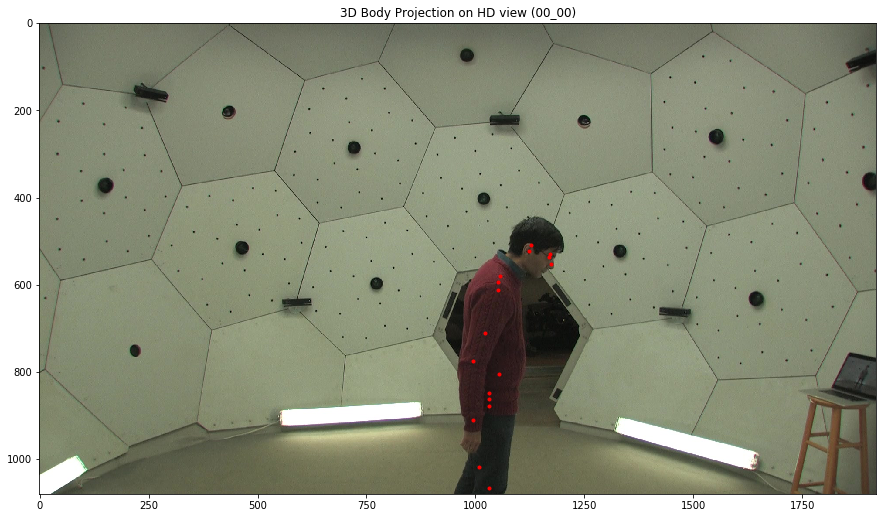

In [19]:
#ploting dataset images with groundtruth(joints)
image_num=8594
im=plt.imread(dataset_paths[image_num])
colors = plt.cm.hsv(np.linspace(0, 1, 10)).tolist()
# Edges between joints in the body skeleton
#body_edges = np.array([[1,2],[43,42],[0,42],[2,3],[0,1],[43,44]])
plt.figure(figsize=(15,15))
plt.title('3D Body Projection on HD view ({0})'.format(cam['name']))
plt.imshow(im)
currentAxis = plt.gca()
currentAxis.set_autoscale_on(False)
#valid = (dataset_ground[image_num][3][:])>1
plt.plot(dataset_ground[image_num][0][:], dataset_ground[image_num][1][:] , '.', color=colors[body['id']])
#for edge in body_edges:
  #  if valid[edge[0]] or valid[edge[1]]:
   #     plt.plot(np.array(dataset_ground[image_num][0][edge]), np.array(dataset_ground[image_num][1][edge]), color=colors[body['id']])
plt.draw()

    # Show the joint numbers
#for ip in xrange(len(dataset_ground[image_num][0][:6])):
    #if pt[0,ip]>=0 and pt[0,ip]<im.shape[1] and pt[1,ip]>=0 and pt[1,ip]<im.shape[0]:
    #plt.text((dataset_ground[image_num][0][ip]), (dataset_ground[image_num][1][ip]), '{0}'.format(ip),color=colors[body['id']])


In [23]:
k=0
for i in range(len(dataset_ground2)):
    if np.all(dataset_ground2[i,:,:,:]<=1080):
        k +=1
        
print(k)
        
    

58378


'/home/antreas/panoptic-toolbox/scripts/171026_pose1/hdImgs/00_05/00_05_00020324.jpg'

In [25]:
#crop and resize the images that ground_truth is lower than 1080.
new_gr1 = []
datatest_paths = []
d=0
for j in range(20):
    for i in range(j*11021,(j+1)*11021):
        if np.all(dataset_ground2[i,:,:,:]<=1080):
            im=cv2.imread(dataset_paths[i])
            imcrop=im[0:1080,0:1080]
            res=cv2.resize(imcrop, (224,224), interpolation = cv2.INTER_CUBIC)
            temp=np.divide(dataset_ground2[i], 1080/224)
            new_gr1.append(temp)
            filename= "/home/antreas/Desktop/test_images2/file_%d.jpg"%d
            cv2.imwrite(filename,res)
            d +=1

In [26]:
np.save('/home/antreas/Desktop/arrays2/new_gr2',new_gr1) #y_test

In [29]:
ground = np.load('/home/antreas/Desktop/arrays2/new_gr2.npy')
data_ground=np.copy(ground)
data_ground.shape

(58378, 2, 1, 19)

In [30]:
np.save('/home/antreas/Desktop/arrays2/data_ground2',data_ground) #list to array,y_test

In [32]:
#saving dataset paths
datatest_paths = []
d=0

for j in range(20):
    for i in range(j*11021,(j+1)*11021):
        if np.all(dataset_ground2[i,:,:,:]<=1080):
            filename= "/home/antreas/Desktop/test_images2/file_%d.jpg"%d
            datatest_paths.append(filename)
            d +=1
            

In [33]:
np.save('/home/antreas/Desktop/arrays2/datatest_paths2', datatest_paths)

In [34]:
data_path = np.load('/home/antreas/Desktop/arrays2/datatest_paths2.npy')
datatest_paths_new2 = np.copy(data_path)
datatest_paths_new2.shape

(58378,)

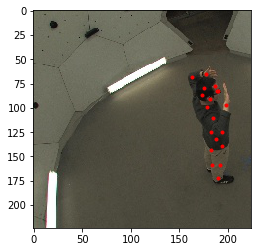

In [40]:
#ploting the resized images
image_num1 = 50000
im=plt.imread(datatest_paths_new2[image_num1])
plt.imshow(im)
colors = plt.cm.hsv(np.linspace(0, 1, 10)).tolist()
plt.plot(data_ground[image_num1][0][:], data_ground[image_num1][1][:] , '.', color=colors[body['id']])
plt.draw()
#ploting the new image with the groundtruth

In [2]:
data_path = np.load('/home/antreas/Desktop/arrays2/datatest_paths2.npy')

In [3]:
data_path.shape

(58378,)

In [4]:
datatest_paths1 = np.copy(data_path)
datatest_paths1.shape

(58378,)

In [5]:
len(datatest_paths1)

58378

In [6]:
j = int(len(datatest_paths1)/2)

In [7]:
j

29189

In [8]:
gr = np.load('/home/antreas/Desktop/arrays2/data_ground2.npy')

In [9]:
gr[1]

array([[[183.92080206, 177.15143998, 185.27159488, 170.88362906,
         149.76689197, 151.64519001, 178.02080197, 182.36451656,
         186.05347429, 195.94419378, 211.07339846, 206.35191728,
         192.40440916, 192.04852897, 194.32086884, 175.37238979,
         175.36015217, 179.84224281, 187.76310888]],

       [[ 85.62331404,  67.72355287, 120.31666044,  90.37794375,
          94.10479627,  73.60134566, 122.80962283, 145.50493752,
         167.33218516,  81.40313291,  76.03768429,  59.94005547,
         117.86438693, 141.14361006, 163.72777616,  66.40027943,
          72.03324263,  65.07076223,  68.53591186]]])

In [10]:
test_imarr = []
gr1=[]
for i in range(j,len(datatest_paths1)):
    img = Image.open(datatest_paths1[i]).convert("RGB")
    imgarr = np.array(img)
    test_imarr.append(imgarr)
    x=gr[i]
    gr1.append(x)

In [11]:
test_imarr2=np.copy(test_imarr)
test_imarr2.shape

(29189, 224, 224, 3)

In [12]:
test_gr2=np.copy(gr1)
test_gr2.shape

(29189, 2, 1, 19)

In [13]:
np.save('/home/antreas/Desktop/arrays2/half_im2_2', test_imarr)
np.save('/home/antreas/Desktop/arrays2/half_gr2_2',test_gr2)

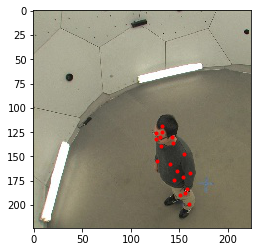

In [14]:
plt.imshow(test_imarr[1])
plt.plot(test_gr2[1][0][:], test_gr2[1][1][:] , '.', color='red')

In [5]:
x = np.load('/home/antreas/Desktop/arrays2/half_im2_1.npy')

In [6]:
y=np.load('/home/antreas/Desktop/arrays2/half_gr2_1.npy')

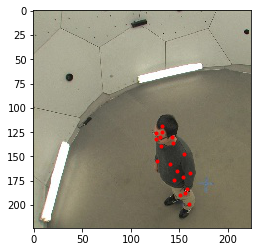

In [7]:
plt.imshow(x[1])
plt.plot(y[1][0][:], y[1][1][:] , '.', color='red')